In [2]:
import numpy as np
import pandas as pd

In [1]:
print("test")

test


In [ ]:
######## for removing packages
!pip uninstall -y XXXXXXpackage

In [1]:
import pandas as pd
metadata = pd.read_csv('./metadata_v6_rosmap.csv', index_col=0)

In [3]:
dataset_path = 'ROSMAP_counts_v7.csv'
X = pd.read_csv(dataset_path, index_col=0)

# RF on imbalanced data

## Datasets check

In [ ]:
import pandas as pd
from statsmodels.robust.scale import mad


# Load the dataset and metadata
dataset_path = '/home/vmottaqi/rnaseq_synapse/AMP_AD_datasets/ROSMAP_counts_v4.csv'
df_features = pd.read_csv(dataset_path, index_col=0)
df_features



# Calculate the Median Absolute Deviation (MAD) for each gene (column)
mad_values = df_features.apply(mad, axis=0)

# Rank the genes based on MAD values from most variable to least variable
ranked_genes = mad_values.sort_values(ascending=False).index.tolist()

least_variable_genes = ranked_genes[-13000:]
most_variable_genes = ranked_genes[:2000]

# Print the ranked list of genes
print("Ranked genes from most variable to least variable:" )
print(ranked_genes)
print("Least variable:")
print(least_variable_genes)
print('Most variable:')
print(most_variable_genes)

In [3]:
import pandas as pd

# Remove the columns corresponding to the genes in the list
df_filtered = df_features.drop(columns=least_variable_genes)

# Save the filtered DataFrame to a new CSV file
new_csv_file_path = 'ROSMAP_counts_v10_imbalance_4k.csv'
df_filtered.to_csv(new_csv_file_path, index=True)

In [4]:
dataset_path = 'ROSMAP_counts_v10_imbalance_4k.csv'
df_features = pd.read_csv(dataset_path, index_col=0)
df_features

ENSG00000000971  ENSG00000001617  ENSG00000001626  \
487_120515           5.089801         4.342717        -3.111810   
182_120424           3.071029         2.528274        -1.033960   
193_120424           3.485700         2.515583        -0.808607   
694_120605           4.746188         2.998472         0.956454   
366_120502           5.039985         2.967016        -0.657477   
...                       ...              ...              ...   
RISK_81              5.550509         3.659221        -1.595415   
RISK_9_rerun         3.559018         3.617887        -1.589891   
RISK_93              4.098086         2.137602        -0.871927   
RISK_94              4.041678         3.105495        -0.419694   
RISK_97              4.440045         2.956054        -0.603532   

              ENSG00000001630  ENSG00000002587  ENSG00000002745  \
487_120515           0.166975         3.086104         0.310888   
182_120424           1.181832         3.830174         1.021351   
193_120424          -0.587615         3.816948         0.945104   
694_120605           0.818442         2.616238        -2.226673   
366_120502           0.360927         2.866296        -0.892768   
...                       ...              ...              ...   
RISK_81              1.208007         3.871698         1.162374   
RISK_9_rerun         0.602893         3.556849        -1.463051   
RISK_93             -0.736334         4.126750         1.412901   
RISK_94             -0.109778         4.166972         0.992736   
RISK_97              0.838868         3.341711         0.977212   

              ENSG00000002746  ENSG00000002933  ENSG00000003096  \
487_120515           7.080505         4.229403         2.638568   
182_120424           7.951007         2.420574         3.218771   
193_120424           7.521900         3.117431         3.289947   
694_120605           6.410101         4.475845         1.919275   
366_120502           7.108505         3.365625         2.951688   
...                       ...              ...              ...   
RISK_81              7.162704         3.427154         3.714658   
RISK_9_rerun         7.374943         4.058607         2.372803   
RISK_93              6.960133         3.829547         3.791386   
RISK_94              6.995056         2.807515         3.219758   
RISK_97              7.089638         3.394773         3.128308   

              ENSG00000003137  ...  ENSG00000287815  ENSG00000287900  \
487_120515           3.534228  ...         1.210753         2.973423   
182_120424           4.973148  ...         0.778337         2.835971   
193_120424           5.129640  ...         0.287449         2.706385   
694_120605           4.004138  ...        -0.966774         1.204182   
366_120502           4.270925  ...         0.139377         0.833608   
...                       ...  ...              ...              ...   
RISK_81              4.620029  ...        -0.416202         2.694560   
RISK_9_rerun         4.910392  ...         1.141505         1.465807   
RISK_93              4.497030  ...         0.485881         2.477677   
RISK_94              3.635901  ...         0.273251         2.206163   
RISK_97              4.705456  ...         0.033261         2.251191   

              ENSG00000287925  ENSG00000287978  ENSG00000287985  \
487_120515           2.145368         1.892324         0.680168   
182_120424           2.417855         1.396146         1.114917   
193_120424           2.325123         1.281214         1.294638   
694_120605           1.351418        -2.986291        -0.357597   
366_120502           1.092943         1.707821         1.329693   
...                       ...              ...              ...   
RISK_81              1.821171         2.346634         0.917420   
RISK_9_rerun         1.618501         0.084201         0.165583   
RISK_93              1.926980         1.726131         1.341263   
RISK_94              1.937490         1.195124         0.974912 

In [4]:
metadata_path = '/home/vmottaqi/rnaseq_synapse/backup/metadata_v3.csv'
df_metadata = pd.read_csv(metadata_path, index_col=0)

# Filter the metadata for the 'ROSMAP' study
df_metadata = df_metadata[df_metadata['study'] == 'ROSMAP']
df_metadata.drop(columns=['ethnicity', 'study'], inplace=True)
df_metadata.to_csv('metadata_v10_imbalance.csv')

In [2]:
metadata_path = 'metadata_v10_imbalance.csv'
df_metadata = pd.read_csv(metadata_path, index_col=0)

# Create three new columns for each unique value in 'tissue'
df_metadata = pd.get_dummies(df_metadata, columns=['tissue'], prefix='tissue')


df_metadata

individualID  diagnosis  race  spanish  apoe4_allele  sex  batch  \
specimenID                                                                      
487_120515       R9904978          0   1.0      2.0             0    0      4   
182_120424       R9818080          0   1.0      2.0             0    0      7   
193_120424       R9817161          1   1.0      2.0             0    1      4   
694_120605       R9817056          0   1.0      2.0             0    0      4   
366_120502       R9809661          1   1.0      2.0             1    1      7   
...                   ...        ...   ...      ...           ...  ...    ...   
RISK_81          R4703595          0   1.0      2.0             0    1     17   
RISK_9_rerun     R6776130          0   1.0      2.0             0    1     17   
RISK_93          R6162454          1   1.0      2.0             0    1     17   
RISK_94          R6162454          1   1.0      2.0             0    1     17   
RISK_97          R1787342          0   1.0      2.0             0    1     17   

                    pmi  RIN   RIN2  age_death  \
specimenID                                       
487_120515    12.433333  6.9  47.61  72.720055   
182_120424    16.000000  8.4  70.56  81.111567   
193_120424     1.750000  7.1  50.41  80.906229   
694_120605     6.416667  7.1  50.41  87.753593   
366_120502    17.416667  7.4  54.76  90.000000   
...                 ...  ...    ...        ...   
RISK_81       19.500000  7.3  53.29  88.796715   
RISK_9_rerun   6.500000  1.7   2.89  83.958932   
RISK_93        6.033333  7.2  51.84  90.000000   
RISK_94        6.033333  6.8  46.24  90.000000   
RISK_97        6.283333  6.3  39.69  90.000000   

              AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED  \
specimenID                                                   
487_120515                                        0.931411   
182_120424                                        0.944450   
193_120424                                        0.958718   
694_120605                                        0.960609   
366_120502                                        0.931962   
...                                                    ...   
RISK_81                                           0.980628   
RISK_9_rerun                                      0.932115   
RISK_93                                           0.949833   
RISK_94                                           0.958425   
RISK_97                                           0.964837   

              RnaSeqMetrics_PCT_INTRONIC_BASES  \
specimenID                                       
487_120515                            0.225013   
182_120424                            0.172408   
193_120424                            0.203963   
694_120605                            0.201002   
366_120502                            0.205742   
...                                        ...   
RISK_81                               0.434482   
RISK_9_rerun                          0.460919   
RISK_93                               0.420760   
RISK_94                               0.461341   
RISK_97                               0.401705   

              RnaSeqMetrics_PCT_INTERGENIC_BASES  \
specimenID                                         
487_120515                              0.058488   
182_120424                              0.041036   
193_120424                              0.048166   
694_120605                              0.045065   
366_120502                              0.048650   
...                                          ...   
RISK_81                                 0.059079   
RISK_9_rerun                            0.119986   
RISK_93                                 0.047032   
RISK_94                                 0.055424   
RISK_97                                 0.052819   

              RnaSeqMetrics_PCT_CODING_BASES  tissue_1  tissue_3  tissue_6  
specimenID                                                                  
487_120515         

### Individuals with multiple samples

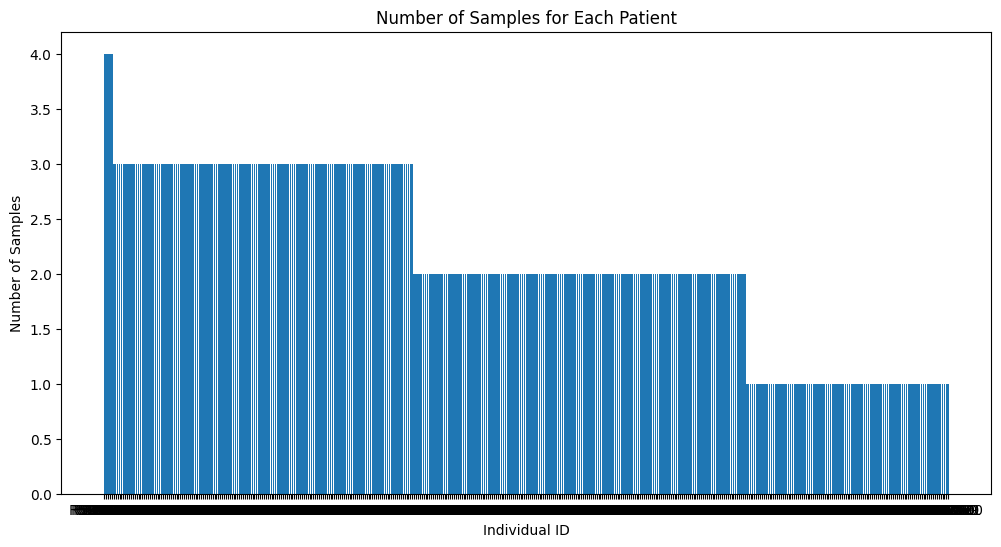

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the metadata file
metadata_path = 'metadata_v10_imbalance.csv'
df_metadata = pd.read_csv(metadata_path, index_col=0)

# Count the number of samples for each unique patient
sample_counts = df_metadata['individualID'].value_counts()

# Convert the series to a dataframe for easier plotting
sample_counts_df = sample_counts.reset_index()
sample_counts_df.columns = ['individualID', 'SampleCount']

# Visualize the number of samples for each patient
plt.figure(figsize=(12, 6))
plt.bar(sample_counts_df['individualID'], sample_counts_df['SampleCount'])
plt.xlabel('Individual ID')
plt.ylabel('Number of Samples')
plt.title('Number of Samples for Each Patient')
#plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()


In [8]:
import pandas as pd

# Load the metadata file
metadata_path = 'metadata_v10_imbalance.csv'
df_metadata = pd.read_csv(metadata_path)

# Group the data by individualID, tissue, and diagnosis, and count the number of samples in each group
grouped = df_metadata.groupby(['individualID', 'tissue', 'diagnosis']).size().reset_index(name='SampleCount')

# Filter the groups where the sample count is two or more
duplicates = grouped[grouped['SampleCount'] >= 2]

# Find the specimenIDs of the samples that are duplicates
duplicate_samples = df_metadata[df_metadata.duplicated(subset=['individualID', 'tissue', 'diagnosis'], keep=False)]

# Merge the duplicate sample info with the duplicates DataFrame
duplicates_with_specimenID = pd.merge(duplicates, duplicate_samples[['specimenID', 'individualID', 'tissue', 'diagnosis']], on=['individualID', 'tissue', 'diagnosis'], how='left')

# Print the information of individuals with two or more samples with the same tissue type and diagnosis, including specimenID
print("Individuals with two or more samples with the same tissue type and diagnosis (including specimenID):")
print(duplicates_with_specimenID)

Individuals with two or more samples with the same tissue type and diagnosis (including specimenID):
   individualID  tissue  diagnosis  SampleCount             specimenID
0      R1498848       3          0            2             1013-DLPFC
1      R1498848       3          0            2        Sample_SM-AYOSS
2      R1901673       3          0            2             1060-DLPFC
3      R1901673       3          0            2        Sample_SM-AYO4G
4      R2688135       3          1            2  Sample_R2688135-DLPFC
5      R2688135       3          1            2               RISK_369
6      R2732138       3          1            2  Sample_R2732138-DLPFC
7      R2732138       3          1            2               RISK_217
8      R3450006       3          1            2  Sample_R3450006-DLPFC
9      R3450006       3          1            2               RISK_218
10     R5009796       3          1            2             205_120424
11     R5009796       3          1            2

In [9]:
# Count the number of unique individuals
num_unique_individuals = df_metadata['individualID'].nunique()

# Print the result
print(f"Total number of unique individuals: {num_unique_individuals}")

Total number of unique individuals: 445


### distribution of gene expression

In [1]:
import pandas as pd
import numpy as np

# Loading the CSV file
df = pd.read_csv("ROSMAP_counts_v10_imbalance_12k.csv", index_col=0)  # Change "your_dataset.csv" to your actual file name

# Calculate mean and variance for each gene (assuming genes are columns)
mean_ex = df.mean(axis=0)
var_ex = df.var(axis=0, ddof=1)

# Creating a new DataFrame with gene names, means, and variances
gene_stats_df = pd.DataFrame({
    "gene_name": df.columns,
    "mean": mean_ex,
    "var": var_ex
})

# Save the new DataFrame to CSV
gene_stats_df.to_csv("gene_statistics.csv", index=False)


In [4]:
df = pd.read_csv('gene_statistics.csv')
df

gene_name      mean       var
0      ENSG00000000003  3.657952  0.276982
1      ENSG00000000457  3.739001  0.113988
2      ENSG00000000460  2.054945  0.118075
3      ENSG00000000938  3.035054  0.430635
4      ENSG00000000971  4.690103  0.669821
...                ...       ...       ...
11994  ENSG00000288048  0.899498  0.944988
11995  ENSG00000288049 -3.134527  7.401552
11996  ENSG00000288062  3.264750  0.426943
11997  ENSG00000288075  3.356025  0.218391
11998  ENSG00000288107  0.884350  1.476944

[11999 rows x 3 columns]

In [11]:
import pandas as pd
import numpy as np

# Loading the CSV file
df = pd.read_csv("ROSMAP_counts_v10_imbalance_12k.csv", index_col=0)

# Convert all columns to numeric, setting errors='coerce' will convert non-convertible types to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# You can choose to drop all columns that have any NaN values if they were supposed to be numeric
# df = df.dropna(axis=1)

# Calculate mean and variance for each sample (rows)
mean_ex = df.mean(axis=1)
var_ex = df.var(axis=1, ddof=1)

# Assuming the DataFrame's index is meaningful as the sample_id; if not, adjust accordingly.
sample_stats_df = pd.DataFrame({
    "sample_id": df.index,
    "mean": mean_ex,
    "variance": var_ex
})

# Save the new DataFrame to CSV
sample_stats_df.to_csv("sample_statistics.csv", index=False)


In [12]:
df = pd.read_csv('sample_statistics.csv')
df

sample_id      mean  variance
0      487_120515  3.581256  5.726919
1      182_120424  3.558590  5.765061
2      193_120424  3.560199  5.917456
3      694_120605  3.477775  5.936414
4      366_120502  3.525509  5.972701
..            ...       ...       ...
946       RISK_81  3.580699  5.345608
947  RISK_9_rerun  3.485657  6.454732
948       RISK_93  3.586005  5.109318
949       RISK_94  3.538337  5.501925
950       RISK_97  3.525927  5.654504

[951 rows x 3 columns]


Number of genes: 11999
Mean of gene expression means: 3.536
Standard Deviation of gene expression means: 2.307
Median of gene expression means: 3.445
Minimum of gene expression means: -3.61806
Maximum of gene expression means: 12.84
Skewness of gene expression means: 0.3
Kurtosis of gene expression means: -0.5

Number of genes: 11999
Mean of gene expression variances: 0.560
Standard Deviation of gene expression variances: 0.98
Median of gene expression variances: 0.322
Minimum of gene expression variances: 0.08424
Maximum of gene expression variances: 21.30
Skewness of gene expression variances: 9.1
Kurtosis of gene expression variances: 128.0



/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

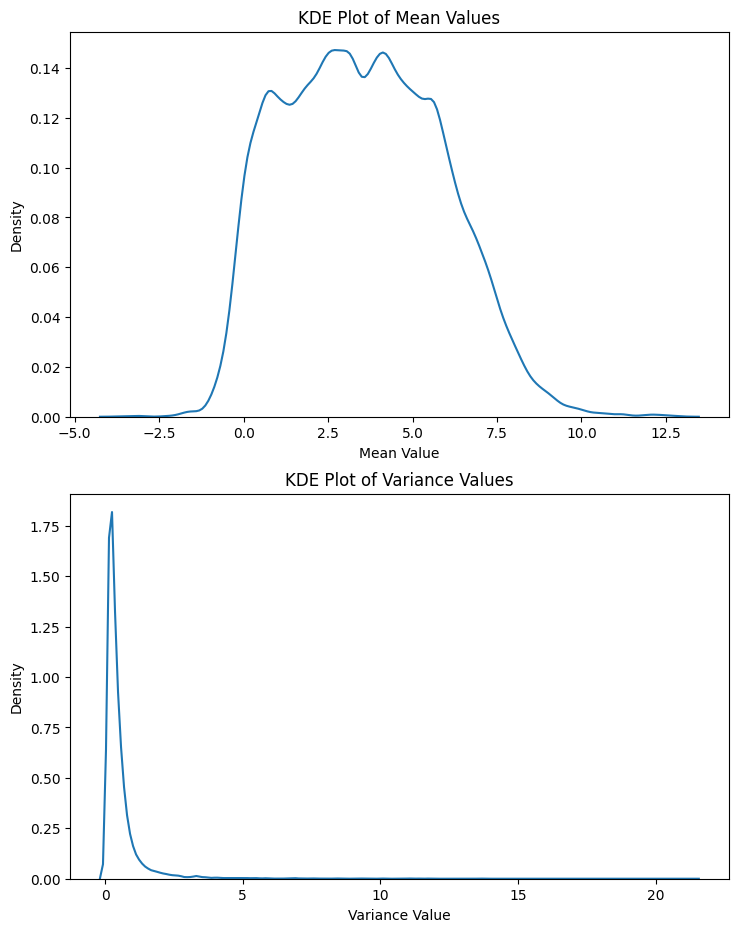

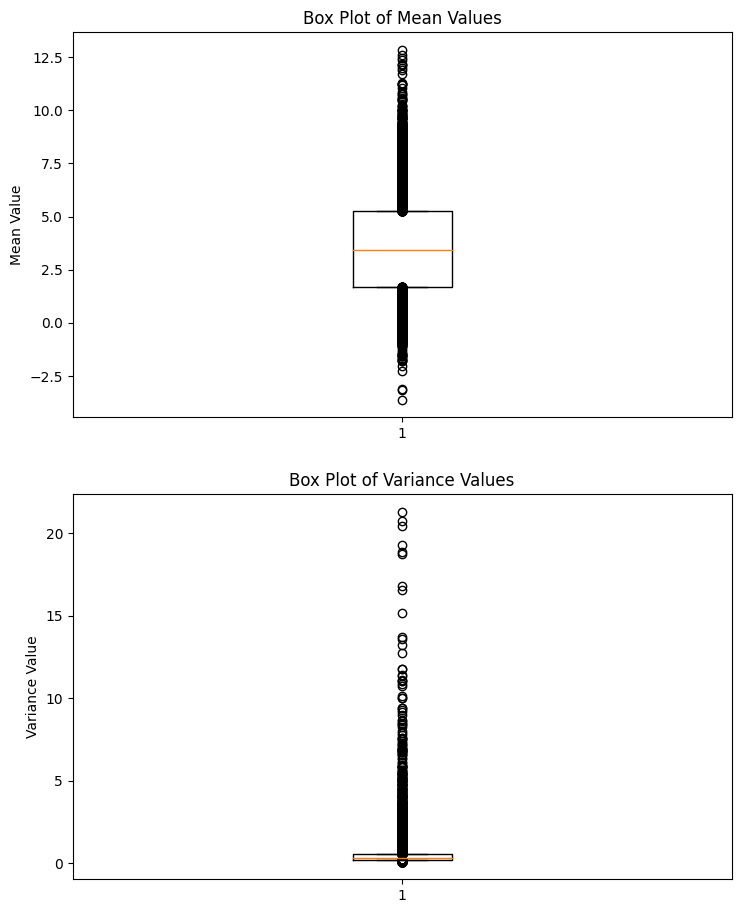

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# read csv file
df = pd.read_csv('gene_statistics.csv')

# compute statistics for mean column
mean_col = df['mean']
mean_num_rows = len(mean_col)
mean_mean = np.mean(mean_col)
mean_std = np.std(mean_col)
mean_median = np.median(mean_col)
mean_min = np.min(mean_col)
mean_max = np.max(mean_col)
mean_skew = skew(mean_col)
mean_kurtosis = kurtosis(mean_col)

# compute statistics for variance column
var_col = df['var']
var_num_rows = len(var_col)
var_mean = np.mean(var_col)
var_std = np.std(var_col)
var_median = np.median(var_col)
var_min = np.min(var_col)
var_max = np.max(var_col)
var_skew = skew(var_col)
var_kurtosis = kurtosis(var_col)

# print the statistics to console
print(f'''
Number of genes: {mean_num_rows}
Mean of gene expression means: {mean_mean:.3f}
Standard Deviation of gene expression means: {mean_std:.3f}
Median of gene expression means: {mean_median:.3f}
Minimum of gene expression means: {mean_min:.5f}
Maximum of gene expression means: {mean_max:.2f}
Skewness of gene expression means: {mean_skew:.1f}
Kurtosis of gene expression means: {mean_kurtosis:.1f}

Number of genes: {var_num_rows}
Mean of gene expression variances: {var_mean:.3f}
Standard Deviation of gene expression variances: {var_std:.2f}
Median of gene expression variances: {var_median:.3f}
Minimum of gene expression variances: {var_min:.5f}
Maximum of gene expression variances: {var_max:.2f}
Skewness of gene expression variances: {var_skew:.1f}
Kurtosis of gene expression variances: {var_kurtosis:.1f}
''')

# Visualize data with KDE plots of means and variances
fig, axs = plt.subplots(2, 1, figsize=(8.5, 11))
sns.kdeplot(mean_col, bw_adjust=0.6, ax=axs[0])
axs[0].set_title('KDE Plot of Mean Values')
axs[0].set_xlabel('Mean Value')
axs[0].set_ylabel('Density')

sns.kdeplot(var_col, bw_adjust=0.6, ax=axs[1])
axs[1].set_title('KDE Plot of Variance Values')
axs[1].set_xlabel('Variance Value')
axs[1].set_ylabel('Density')

plt.show()

# Visualize data with box plots of means and variances
fig, axs = plt.subplots(2, 1, figsize=(8.5, 11))
axs[0].boxplot(mean_col, whis=[25, 75])
axs[0].set_title('Box Plot of Mean Values')
axs[0].set_ylabel('Mean Value')

axs[1].boxplot(var_col, whis=[25, 75])
axs[1].set_title('Box Plot of Variance Values')
axs[1].set_ylabel('Variance Value')

plt.show()



Number of genes: 951
Mean of gene expression means: 3.536
Standard Deviation of gene expression means: 0.028
Median of gene expression means: 3.535
Minimum of gene expression means: 3.44258
Maximum of gene expression means: 3.71
Skewness of gene expression means: 0.7
Kurtosis of gene expression means: 3.3

Number of genes: 951
Mean of gene expression variances: 5.882
Standard Deviation of gene expression variances: 0.25
Median of gene expression variances: 5.906
Minimum of gene expression variances: 4.58857
Maximum of gene expression variances: 7.35
Skewness of gene expression variances: -0.4
Kurtosis of gene expression variances: 3.6



/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vmottaqi/.conda/envs/mcf7/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

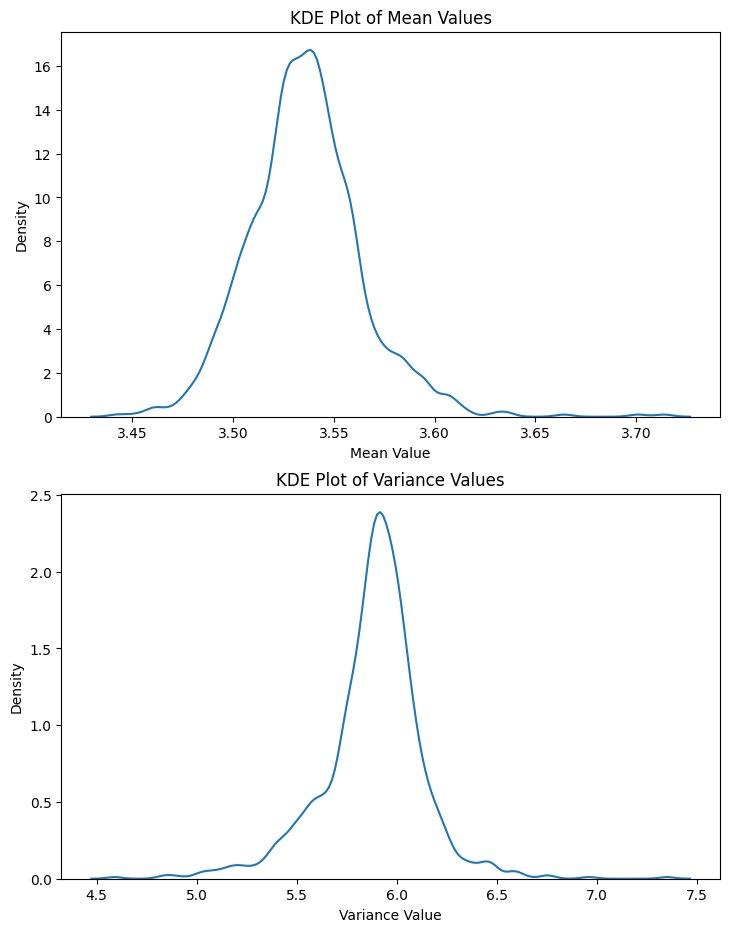

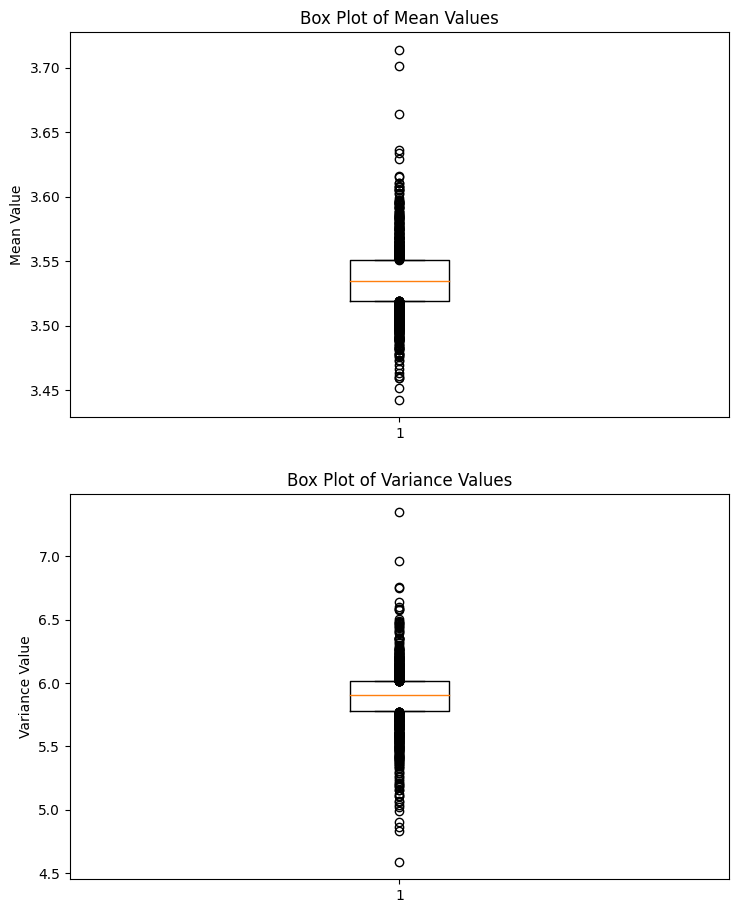

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# read csv file
df = pd.read_csv('sample_statistics.csv')

# compute statistics for mean column
mean_col = df['mean']
mean_num_rows = len(mean_col)
mean_mean = np.mean(mean_col)
mean_std = np.std(mean_col)
mean_median = np.median(mean_col)
mean_min = np.min(mean_col)
mean_max = np.max(mean_col)
mean_skew = skew(mean_col)
mean_kurtosis = kurtosis(mean_col)

# compute statistics for variance column
var_col = df['variance']
var_num_rows = len(var_col)
var_mean = np.mean(var_col)
var_std = np.std(var_col)
var_median = np.median(var_col)
var_min = np.min(var_col)
var_max = np.max(var_col)
var_skew = skew(var_col)
var_kurtosis = kurtosis(var_col)

# print the statistics to console
print(f'''
Number of genes: {mean_num_rows}
Mean of gene expression means: {mean_mean:.3f}
Standard Deviation of gene expression means: {mean_std:.3f}
Median of gene expression means: {mean_median:.3f}
Minimum of gene expression means: {mean_min:.5f}
Maximum of gene expression means: {mean_max:.2f}
Skewness of gene expression means: {mean_skew:.1f}
Kurtosis of gene expression means: {mean_kurtosis:.1f}

Number of genes: {var_num_rows}
Mean of gene expression variances: {var_mean:.3f}
Standard Deviation of gene expression variances: {var_std:.2f}
Median of gene expression variances: {var_median:.3f}
Minimum of gene expression variances: {var_min:.5f}
Maximum of gene expression variances: {var_max:.2f}
Skewness of gene expression variances: {var_skew:.1f}
Kurtosis of gene expression variances: {var_kurtosis:.1f}
''')

# Visualize data with KDE plots of means and variances
fig, axs = plt.subplots(2, 1, figsize=(8.5, 11))
sns.kdeplot(mean_col, bw_adjust=0.6, ax=axs[0])
axs[0].set_title('KDE Plot of Mean Values')
axs[0].set_xlabel('Mean Value')
axs[0].set_ylabel('Density')

sns.kdeplot(var_col, bw_adjust=0.6, ax=axs[1])
axs[1].set_title('KDE Plot of Variance Values')
axs[1].set_xlabel('Variance Value')
axs[1].set_ylabel('Density')

plt.show()

# Visualize data with box plots of means and variances
fig, axs = plt.subplots(2, 1, figsize=(8.5, 11))
axs[0].boxplot(mean_col, whis=[25, 75])
axs[0].set_title('Box Plot of Mean Values')
axs[0].set_ylabel('Mean Value')

axs[1].boxplot(var_col, whis=[25, 75])
axs[1].set_title('Box Plot of Variance Values')
axs[1].set_ylabel('Variance Value')

plt.show()


## RF code

### Test 1 RF as baseline

In [4]:
# complete code after 3 blocks

# Creating the modeling dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [5]:
### With clinical variables

import pandas as pd

# Load the gene expression data
dataset_path = 'ROSMAP_counts_v10_imbalance_12k.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Load the metadata file
metadata_path = 'metadata_v10_imbalance.csv'
df_metadata = pd.read_csv(metadata_path, index_col=0)


# Drop the 'xx' column from the metadata (if it exists)
df_metadata = df_metadata.drop(columns=['individualID', 'race', 'spanish', 'pmi', "RIN",'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED',
       'RnaSeqMetrics_PCT_INTRONIC_BASES',
       'RnaSeqMetrics_PCT_INTERGENIC_BASES', 'RnaSeqMetrics_PCT_CODING_BASES'], errors='ignore')

# Merge the metadata with the gene expression data based on the SpecimenID and index
df_merged = df_features.merge(df_metadata, left_on=df_features.index, right_on='specimenID', how='left')

# Select the 'diagnosis' column as the target variable 'y'
y = df_merged['diagnosis']

# Drop the target variable from the merged dataframe to get the features 'X'
X = df_merged.drop(columns=['diagnosis', 'specimenID'])

# Create a new dataframe combining features and target
df = pd.concat([X, y.rename('target')], axis=1)

# Check the target distribution
print(df['target'].value_counts(normalize=True))


target
1    0.646688
0    0.353312
Name: proportion, dtype: float64


In [ ]:
### With clinical variables

from sklearn.model_selection import cross_validate

# Initialize the random forest model
rf = RandomForestClassifier(random_state=42)

# Define the metrics to use
scoring_metrics = ['recall', 'f1', 'accuracy', 'precision', 'roc_auc']

# Perform 4-fold cross-validation with multiple metrics
cv_results = cross_validate(rf, X, y, cv=10, scoring=scoring_metrics)

# Print the cross-validation results for each metric
for metric in scoring_metrics:
    #print(f"10-fold CV {metric}: {cv_results['test_' + metric]}")
    print(f"Mean CV {metric}: {cv_results['test_' + metric].mean()}\n")

In [ ]:
# Complete code (2 sections)

In [8]:


import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

# Load the gene expression data
dataset_path = 'ROSMAP_counts_v10_imbalance_12k.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Load the metadata file
metadata_path = 'metadata_v10_imbalance.csv'
df_metadata = pd.read_csv(metadata_path, index_col=0)

# Merge the metadata with the gene expression data
df_merged = df_features.merge(df_metadata, left_index=True, right_on='specimenID', how='left')

# Select the 'diagnosis' column as the target variable 'y'
y = df_merged['diagnosis']

# Drop the target variable and other non-feature columns from the merged dataframe to get the features 'X'
X = df_merged.drop(columns=['batch', 'RIN2','diagnosis', 'individualID', 'race', 'spanish', 'pmi', "RIN",'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED', 'RnaSeqMetrics_PCT_INTRONIC_BASES', 'RnaSeqMetrics_PCT_INTERGENIC_BASES', 'RnaSeqMetrics_PCT_CODING_BASES'])

# Create three new columns for each unique value in 'tissue'
X = pd.get_dummies(X, columns=['tissue'], prefix='tissue')


In [12]:
X

ENSG00000000003  ENSG00000000457  ENSG00000000460  \
specimenID                                                        
487_120515           2.693056         3.843684         1.891460   
182_120424           2.952038         3.819310         1.672045   
193_120424           2.935881         4.399317         1.909150   
694_120605           3.970723         3.519447         1.613139   
366_120502           3.555162         3.737334         2.403238   
...                       ...              ...              ...   
RISK_81              3.480599         3.794995         2.044125   
RISK_9_rerun         3.033182         3.430243         1.701873   
RISK_93              4.234210         4.319146         2.264421   
RISK_94              4.074123         4.164492         2.307973   
RISK_97              3.805448         4.182196         1.922559   

              ENSG00000000938  ENSG00000000971  ENSG00000001036  \
specimenID                                                        
487_120515           2.131878         5.089801         2.564877   
182_120424           1.707203         3.071029         3.198746   
193_120424           1.711887         3.485700         3.305756   
694_120605           3.515993         4.746188         3.800684   
366_120502           4.053856         5.039985         3.336166   
...                       ...              ...              ...   
RISK_81              2.658725         5.550509         3.364785   
RISK_9_rerun         2.982793         3.559018         3.009816   
RISK_93              2.106420         4.098086         3.708144   
RISK_94              1.930466         4.041678         3.714398   
RISK_97              2.291532         4.440045         3.657504   

              ENSG00000001084  ENSG00000001460  ENSG00000001497  \
specimenID                                                        
487_120515           4.163159         4.275373         5.865258   
182_120424           5.275337         4.262465         5.460677   
193_120424           5.022003         4.688572         5.541020   
694_120605           5.696683         3.624694         5.717614   
366_120502           5.500272         4.143737         5.467284   
...                       ...              ...              ...   
RISK_81              4.804389         4.117583         4.911736   
RISK_9_rerun         5.052380         4.041375         5.597510   
RISK_93              5.490788         3.908534         4.570783   
RISK_94              5.463185         4.232183         4.945440   
RISK_97              5.298593         4.230607         4.803329   

              ENSG00000001617  ...  ENSG00000288033  ENSG00000288048  \
specimenID                     ...                                     
487_120515           4.342717  ...         0.617244         1.545664   
182_120424           2.528274  ...         0.277121         0.514422   
193_120424           2.515583  ...         0.219337        -0.596076   
694_120605           2.998472  ...        -0.455351         1.506439   
366_120502           2.967016  ...         0.960361         0.552581   
...                       ...  ...              ...              ...   
RISK_81              3.659221  ...         0.227905        -0.805499   
RISK_9_rerun         3.617887  ...         0.874431         1.085004   
RISK_93              2.137602  ...        -1.029335         0.544776   
RISK_94              3.105495  ...         0.340579         0.772254   
RISK_97              2.956054  ...         0.104856         0.567986   

              ENSG00000288049  ENSG00000288062  ENSG00000288075  \
specimenID                                                        
487_120515          -0.547594         3.269352         4.395686   
182_120424           0.597116         3.664030         3.934631   
193_120424          -5.247300         3.774892         3.034315   
694_120605          -0.391900         3.188582         3.419970   
366_120502          -5.109539         3.378009         3.62

In [6]:
# Initialize the random forest model
rf = RandomForestClassifier(random_state=42, class_weight={0: 1.5, 1: 1})

# Initialize Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Stratified K-Fold cross-validation
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    
    # Fit the model
    rf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf.predict(X_test)
    
    # Print classification report for each fold
    print(f"Fold {fold} Classification Report:\n{classification_report(y_test, y_pred)}\n")


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.40      0.48        68
           1       0.72      0.86      0.79       123

    accuracy                           0.70       191
   macro avg       0.67      0.63      0.63       191
weighted avg       0.68      0.70      0.68       191


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.42      0.50        67
           1       0.73      0.87      0.80       123

    accuracy                           0.71       190
   macro avg       0.68      0.64      0.65       190
weighted avg       0.70      0.71      0.69       190


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.51      0.63        67
           1       0.78      0.94      0.85       123

    accuracy                           0.79       190
   macro avg       0.80      0.73   

In [7]:
# Initialize the random forest model
rf = RandomForestClassifier(random_state=42)

# Initialize Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform Stratified K-Fold cross-validation
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    
    # Fit the model
    rf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf.predict(X_test)
    
    # Print classification report for each fold
    print(f"Fold {fold} Classification Report:\n{classification_report(y_test, y_pred)}\n")


Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.41      0.54        34
           1       0.74      0.94      0.83        62

    accuracy                           0.75        96
   macro avg       0.76      0.67      0.68        96
weighted avg       0.76      0.75      0.73        96


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.53      0.57        34
           1       0.76      0.82      0.79        61

    accuracy                           0.72        95
   macro avg       0.69      0.67      0.68        95
weighted avg       0.71      0.72      0.71        95


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.47      0.57        34
           1       0.75      0.90      0.82        61

    accuracy                           0.75        95
   macro avg       0.74      0.69   

### Hyperparameter tuning

In [14]:
# Complete code (2 sections)

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

# Load the gene expression data
dataset_path = 'ROSMAP_counts_v10_imbalance_12k.csv'
df_features = pd.read_csv(dataset_path, index_col=0)

# Load the metadata file
metadata_path = 'metadata_v10_imbalance.csv'
df_metadata = pd.read_csv(metadata_path, index_col=0)

# Merge the metadata with the gene expression data
df_merged = df_features.merge(df_metadata, left_index=True, right_on='specimenID', how='left')

# Select the 'diagnosis' column as the target variable 'y'
y = df_merged['diagnosis']

# Drop the target variable and other non-feature columns from the merged dataframe to get the features 'X'
X = df_merged.drop(columns=['batch', 'RIN2','diagnosis', 'individualID', 'race', 'spanish', 'pmi', "RIN",'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED', 'RnaSeqMetrics_PCT_INTRONIC_BASES', 'RnaSeqMetrics_PCT_INTERGENIC_BASES', 'RnaSeqMetrics_PCT_CODING_BASES'])






from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score

# Define the parameter distributions
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Create a RandomForestClassifier
model = RandomForestClassifier(random_state=1)

# Create scorers for multiple metrics
scorers = {
    'precision': make_scorer(precision_score, pos_label=1),
    'recall': make_scorer(recall_score, pos_label=1),
    'f1': make_scorer(f1_score, pos_label=1),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

# Set up the random search with 5-fold cross-validation and 100 iterations
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring=scorers, refit='precision', cv=5, n_iter=200, verbose=2, n_jobs=5, random_state=42)

# Fit the random search to the data
random_search.fit(X, y)

# Print the best parameters and the best scores for each metric
print("Best parameters:", random_search.best_params_)
for metric in scorers.keys():
    print(f"Best {metric} score:", random_search.cv_results_[f'mean_test_{metric}'][random_search.best_index_])

In [ ]:
# Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 50}
# Best precision score: 0.781912216518734
# Best recall score: 0.878048780487805
# Best f1 score: 0.8265381410256409
# Best roc_auc score: 0.8285830531703035

## Masking the dataset to check the RF model

In [2]:
import pandas as pd

# List of columns you want to keep
# columns_to_keep = ['APP', 'APOE', 'PSEN1', 'PSEN2', 'CLU', 'ABCA7', 'SORL1', 'CR1', 'CD33', 'MS4A', 'TREM2', 'PICALM', 'EPHA1', 'MEF2C', 'CASS4']
columns_to_keep = ['ENSG00000142192', 'ENSG00000081189', 'ENSG00000203710', 'ENSG00000143801', 'ENSG00000095970', 'ENSG00000064687', 'ENSG00000080815', 'ENSG00000120885', 'ENSG00000137642', 'ENSG00000087589', 'ENSG00000130203', 'ENSG00000146904', 'ENSG00000284816', 'ENSG00000105383', 'ENSG00000073921']
# grep -o 'ENSG00000142192' test.log | wc -l

# Load your dataset
df = pd.read_csv('ROSMAP_counts_v10_imbalance_12k.csv', index_col=0)

# Mask columns not in the list by setting their values to zero
for column in df.columns:
    if column not in columns_to_keep:
        df[column] = 0

# Save the modified dataset
df.to_csv('counts_masked_imbalance.csv')


In [ ]:
# Negative values for samples

import pickle

with open('shap_imbalance_v1_12k.pkl', 'rb') as f:
    shap_values_per_sample = pickle.load(f)

# Initialize a dictionary to store non-zero features for each sample
non_zero_features_per_sample = {}

# Iterate through each sample in the dictionary
for sample_id, sample_data in shap_values_per_sample.items():
    # Extract non-zero features for the current sample
    non_zero_features = [gene for gene, value in sample_data['shap_values'].items() if value < 0]
    
    # Store the non-zero features in the dictionary
    non_zero_features_per_sample[sample_id] = non_zero_features

# Print the non-zero features for each sample
for sample_id, non_zero_features in non_zero_features_per_sample.items():
    print(f"Sample {sample_id} has the following negative features:")
    print(non_zero_features)
    print()  # Print a newline for better readability


In [ ]:
# Positive values for samples

import pickle

with open('shap_imbalance_v1_12k.pkl', 'rb') as f:
    shap_values_per_sample = pickle.load(f)

# Initialize a dictionary to store non-zero features for each sample
non_zero_features_per_sample = {}

# Iterate through each sample in the dictionary
for sample_id, sample_data in shap_values_per_sample.items():
    # Extract non-zero features for the current sample
    non_zero_features = [gene for gene, value in sample_data['shap_values'].items() if value > 0]
    
    # Store the non-zero features in the dictionary
    non_zero_features_per_sample[sample_id] = non_zero_features

# Print the non-zero features for each sample
for sample_id, non_zero_features in non_zero_features_per_sample.items():
    print(f"Sample {sample_id} has the following Positive features:")
    print(non_zero_features)
    print()  # Print a newline for better readability


In [ ]:
import pickle
import numpy
import pandas

with open('shap_imbalance_v1_12k.pkl', 'rb') as f:
    shap_values_per_sample = pickle.load(f)

# Iterate through each sample in the dictionary
for sample_id, sample_data in shap_values_per_sample.items():
    # Check if the sample is from group 1 (AD patients) and is correctly classified
    if sample_data['label'] == 1 and sample_data['correct']:
        # Extract non-zero SHAP values for the current sample
        non_zero_shap_values = {gene: value for gene, value in sample_data['shap_values'].items() if value != 0}
        
        # Print the non-zero SHAP values for the sample
        print(f"Sample {sample_id} has the following non-zero SHAP values:")
        for gene, value in non_zero_shap_values.items():
            print(f"{gene}: {value}")
        print()  # Print a newline for better readability

## RF model and SHAP dict

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report, accuracy_score
import shap
import numpy as np
import pandas as pd
from joblib import Parallel, delayed
import pickle
from sklearn.preprocessing import PolynomialFeatures


def process_fold(train_ix, test_ix, X, y, metadata):
    test_individual_id = metadata.iloc[test_ix[0]]['individualID']
    train_individual_ids = metadata.iloc[train_ix]['individualID']

    # Find indices in the training set that have the same individualID as the test sample
    exclude_ix = train_individual_ids[train_individual_ids == test_individual_id].index

    # Remove these indices from the training set
    train_ix = [ix for ix in train_ix if ix not in exclude_ix]

    X_train, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

    model = RandomForestClassifier(
        n_estimators=100,
        min_samples_split=5,
        min_samples_leaf=1,
        max_depth=50,
        random_state=42)
    
    fit = model.fit(X_train, y_train.to_numpy())
    y_pred = fit.predict(X_test)
    y_proba = fit.predict_proba(X_test)[0][1]  # Extract probability of class 1 (AD)
    correct = y_pred[0] == y_test.iloc[0]

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)

    # Select the SHAP values for the predicted class
    relevant_shap_values = shap_values[y_pred[0]]

    specimen_id = metadata.index[test_ix[0]]
    
    print(f'Fold number {test_ix[0]} completed')
    return {
        'specimen_id': specimen_id,
        'correct': correct,
        'label': y_test.iloc[0],
        'shap_values': {X.columns[i]: relevant_shap_values[0][i] for i in range(len(X.columns))},
        'predictive_score': y_proba,  # Probability of being AD
        'predicted_label': y_pred[0]
    }





# Load data
dataset_path = 'ROSMAP_counts_v10_imbalance_12k.csv'
X = pd.read_csv(dataset_path, index_col=0)

metadata = pd.read_csv('metadata_v10_imbalance.csv', index_col=0)
y = metadata['diagnosis']

# Select the additional columns to add to X
additional_columns = metadata[['age_death', 'tissue', 'sex', 'apoe4_allele']]
X = pd.concat([X, additional_columns], axis=1)  # Concatenate the additional columns to X
X = pd.get_dummies(X, columns=['tissue'], prefix='tissue')

# Use Leave-One-Out Cross-Validation
loo = LeaveOneOut()
results = Parallel(n_jobs=2)(delayed(process_fold)(train_ix, test_ix, X, y, metadata) for train_ix, test_ix in loo.split(X))

# Calculate and print model performance
y_true = [result['label'] for result in results]
y_pred = [result['predicted_label'] for result in results]
accuracy = accuracy_score(y_true, y_pred)
print(f'Overall model accuracy: {accuracy:.2f}')

report = classification_report(y_true, y_pred, target_names=['Control', 'AD'])
print(report)

# Save SHAP values dictionary
shap_values_per_sample = {result['fold_num']: result for result in results}
with open('shap_imbalance_v1_12k.pkl', 'wb') as f:
    pickle.dump(shap_values_per_sample, f)
print('SHAP values dictionary saved to shap_imbalance_12k.pkl')


Fold number 1 completed


IndexError: index 2 is out of bounds for axis 0 with size 2

# Clustering via CTEC (to be applied later)

## CTEC replication

### h5ad Dataset stats

In [3]:
import scanpy as sc

# Load the dataset
adata = sc.read_h5ad("/home/vmottaqi/rnaseq_synapse/ctec/human_pbmc_GSE96583.h5ad")
print(adata)
print()
print("Shape:", adata.shape)
print()
print("Variables (var):")
print(adata.var)
print()
print("Observations (obs):")
print(adata.obs)

# List of columns to analyze
columns = ['batch', 'tsne1', 'tsne2', 'stim', 'cluster', 'cell', 'multiplets']

# Print statistics for each column
for col in columns:
    print(f"{col}:")
    print("Number of missing values:", adata.obs[col].isnull().sum())
    print("Unique value counts:")
    print(adata.obs[col].value_counts())
    print()


AnnData object with n_obs × n_vars = 29065 × 35635
    obs: 'batch', 'tsne1', 'tsne2', 'stim', 'cluster', 'cell', 'multiplets'
    var: 'gene_ids'

Shape: (29065, 35635)

Variables (var):
                     gene_ids
MIR1302-10    ENSG00000243485
FAM138A       ENSG00000237613
OR4F5         ENSG00000186092
RP11-34P13.7  ENSG00000238009
RP11-34P13.8  ENSG00000239945
...                       ...
MT-ND4L       ENSG00000212907
MT-ND4        ENSG00000198886
MT-ND5        ENSG00000198786
MT-ND6        ENSG00000198695
MT-CYB        ENSG00000198727

[35635 rows x 1 columns]

Observations (obs):
                   batch  tsne1  tsne2  stim cluster             cell  \
AAACATACAATGCC-1-0     0    NaN    NaN  ctrl       5      CD4 T cells   
AAACATACATTTCC-1-0     0    NaN    NaN  ctrl       9  CD14+ Monocytes   
AAACATACCAGAAA-1-0     0    NaN    NaN  ctrl       9  CD14+ Monocytes   
AAACATACCAGCTA-1-0     0    NaN    NaN  ctrl       9  CD14+ Monocytes   
AAACATACCATGCA-1-0     0    NaN    NaN  

# Filtering shap values

## Filter and export dict

In [1]:
import pickle
with open('shap_imbalance_v4_4k.pkl', 'rb') as f:
    shap_values_per_sample = pickle.load(f)

In [ ]:
shap_values_per_sample

In [4]:
# Check samples with specific prediction score for GSEA

# Define the score range
lower_bound = 0.97
upper_bound = 0.999

# Find and print the specimen IDs with predictive scores within the specified range
for key, value in shap_values_per_sample.items():
    predictive_score = value.get('predictive_score')
    if lower_bound <= predictive_score <= upper_bound:
        print(f"Specimen ID: {value['specimen_id']} with Predictive Score: {predictive_score}")



Specimen ID: 550_120517 with Predictive Score: 0.98
Specimen ID: 511_120515 with Predictive Score: 0.98
Specimen ID: 310_120430 with Predictive Score: 0.97
Specimen ID: 444_120507 with Predictive Score: 0.97
Specimen ID: 721_120531 with Predictive Score: 0.97
Specimen ID: 1082-AC with Predictive Score: 0.97
Specimen ID: Sample_SM-D3ERK with Predictive Score: 0.97
Specimen ID: RISK_229_redo with Predictive Score: 0.97


In [7]:
# Define the specimen_id you are looking for
specimen_id_to_find = '550_120517'

# Define the SHAP value threshold
shap_value_threshold = 0.00028

# Find the specimen in the dictionary
for sample_data in shap_values_per_sample.values():
    if sample_data['specimen_id'] == specimen_id_to_find:
        # Extract and print genes with SHAP value higher than the threshold
        genes_above_threshold = [gene for gene, value in sample_data['shap_values'].items() if value > shap_value_threshold]
        break
else:
    print(f"Specimen ID {specimen_id_to_find} not found in the dictionary.")
    
for i in genes_above_threshold:
    print(i)

ENSG00000003989
ENSG00000004838
ENSG00000005448
ENSG00000006047
ENSG00000006327
ENSG00000007171
ENSG00000010319
ENSG00000011426
ENSG00000012223
ENSG00000012817
ENSG00000018280
ENSG00000020577
ENSG00000026508
ENSG00000038945
ENSG00000042062
ENSG00000053702
ENSG00000056736
ENSG00000064886
ENSG00000066294
ENSG00000067057
ENSG00000067445
ENSG00000072163
ENSG00000074219
ENSG00000078098
ENSG00000078401
ENSG00000081479
ENSG00000086159
ENSG00000087116
ENSG00000087510
ENSG00000088827
ENSG00000088836
ENSG00000089169
ENSG00000091513
ENSG00000091986
ENSG00000095397
ENSG00000096060
ENSG00000099715
ENSG00000100583
ENSG00000101187
ENSG00000101203
ENSG00000101447
ENSG00000102317
ENSG00000104112
ENSG00000104722
ENSG00000105227
ENSG00000105419
ENSG00000105711
ENSG00000108786
ENSG00000108846
ENSG00000109072
ENSG00000110628
ENSG00000111087
ENSG00000111181
ENSG00000111907
ENSG00000112619
ENSG00000113739
ENSG00000114654
ENSG00000114737
ENSG00000115194
ENSG00000115594
ENSG00000116106
ENSG00000116717
ENSG0000

In [10]:
# Highest absolute values

import pickle

with open('shap_imbalance_v1_12k.pkl', 'rb') as f:
    shap_values_per_sample = pickle.load(f)

# Define the specimen_id you are looking for
specimen_id_to_find = '550_120517'

# Find the specimen in the dictionary and sort genes by absolute SHAP value
for sample_data in shap_values_per_sample.values():
    if sample_data['specimen_id'] == specimen_id_to_find:
        # Sort genes by absolute SHAP value in descending order
        sorted_genes = sorted(sample_data['shap_values'].items(), key=lambda x: abs(x[1]), reverse=True)
        
        # Extract the top 300 genes
        top_300_genes = sorted_genes[:300]
        break
else:
    print(f"Specimen ID {specimen_id_to_find} not found in the dictionary.")

# Print the top 300 genes with their SHAP values
for gene, value in top_300_genes:
    print(f"{gene}")


ENSG00000139410
ENSG00000170791
ENSG00000125772
ENSG00000072818
ENSG00000178104
ENSG00000163257
ENSG00000138036
ENSG00000158186
ENSG00000172922
ENSG00000088836
ENSG00000185414
ENSG00000133195
ENSG00000228058
ENSG00000166535
ENSG00000068745
ENSG00000167747
ENSG00000250486
ENSG00000124713
ENSG00000184117
ENSG00000198952
ENSG00000067057
ENSG00000125534
ENSG00000142731
ENSG00000129353
ENSG00000164104
ENSG00000154188
ENSG00000143772
ENSG00000073350
ENSG00000197044
ENSG00000159176
ENSG00000120594
ENSG00000171105
ENSG00000158169
ENSG00000234494
ENSG00000149922
ENSG00000281327
ENSG00000100246
ENSG00000196517
ENSG00000185532
ENSG00000012223
ENSG00000108932
ENSG00000111961
ENSG00000140688
ENSG00000163507
ENSG00000105643
ENSG00000168209
ENSG00000251867
ENSG00000169696
ENSG00000183196
ENSG00000251669
ENSG00000111328
ENSG00000186834
ENSG00000158201
ENSG00000286699
ENSG00000140105
ENSG00000171388
ENSG00000138792
ENSG00000253642
ENSG00000248275
ENSG00000158019
ENSG00000278266
ENSG00000164978
ENSG0000

In [31]:
# For enterez ID

import pandas as pd

# Load the DataFrame from the text file
df = pd.read_csv('/home/vmottaqi/rnaseq_synapse/enterez.txt', sep='\t', header=None)  # Adjust the separator if needed

# Select the second column (excluding the first row) and print each value on a new line
for value in df.iloc[1:, 1]:
    print(value)

GAREM2
TDH-AS1
RALY-AS1
HPR
FLRT2-AS1
SLC5A3
PPP1R1A
SLC6A9
PRELP
AQP6
EPCIP
PSTPIP1
NTNG1
PIRT
SLC16A6
CD163
PRX
LINC01088
FKBP5
MDH1B
LINC01736
VIM2P
SDSL
LINC01310
ISLR2
GMPR
RBM3
PCYOX1L
TRIP10
LINC01007
TRDN
PLK4
CD44
PHYHD1
SLC4A11
CHST6
EIF2AK3-DT
GCSIR
MT1G
A2ML1
ITPKB
RIPOR3
CEDORA
ALDH1A1
GINS2
LINC00926
LOC116435278
MRGPRF
LOC105376654
CCDC160
HK3
NWD1
DDIT4
LDB3
IL17RB
NRIP2
SFRP2


In [1]:
import pickle
import numpy as np
import pandas as pd
# Load the SHAP values dictionary from the file
with open('shap_imbalance_v4_4k.pkl', 'rb') as f:
    shap_values_per_sample = pickle.load(f)

# Count the number of correctly classified AD patients
correctly_classified_ad_patients = sum(
    1 for result in shap_values_per_sample.values() if result['correct'] and result['label'] == 1
)

print(f'Number of correctly classified AD patients: {correctly_classified_ad_patients}')


Number of correctly classified AD patients: 574


In [ ]:
shap_values_per_sample

In [3]:
# This contains samples with higher than average predcition score among correctly-classified AD samples

# Calculate the average predictive score among AD correctly classified samples
average_score_ad_correct = np.mean([value['predictive_score'] for value in shap_values_per_sample.values() if value['label'] == 1 and value['correct']])

# Filter the dictionary to include only the samples that are AD (1), correctly classified, and have a predictive score higher than the average among AD correctly classified samples
filtered_dict = {key: value for key, value in shap_values_per_sample.items()
                 if value['label'] == 1 and value['correct'] and value['predictive_score'] > average_score_ad_correct}

print(f"Number of samples in the filtered dictionary: {len(filtered_dict)}")


Number of samples in the filtered dictionary: 302


In [ ]:
filtered_dict

In [5]:
with open('shap_22_filtered_total.pkl', 'wb') as f:
    pickle.dump(filtered_dict, f)

In [5]:
with open('shap_22_filtered_total.pkl', 'rb') as f:
    filtered_dict = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'shap_22_filtered_total.pkl'

In [5]:
filtered_dict

AttributeError: 'dict' object has no attribute 'shape'

In [12]:
f_d = {
    result['specimen_id']: {
        gene: shap_value for gene, shap_value in result['shap_values'].items() if shap_value > 0.0006
    }
    for result in filtered_dict.values()
}

In [10]:
f_d

{'366_120502': {'ENSG00000003989': 0.0023666827559814816,
  'ENSG00000006047': 0.001071828837817059,
  'ENSG00000008517': 0.0005754512127842601,
  'ENSG00000012223': 0.004199135402181037,
  'ENSG00000012817': 0.0008775277280715478,
  'ENSG00000016602': 0.0005266116341654246,
  'ENSG00000019991': 0.0006063759501501985,
  'ENSG00000020577': 0.0007964220199361551,
  'ENSG00000023445': 0.0006065162307485879,
  'ENSG00000026508': 0.0010792414159021201,
  'ENSG00000038945': 0.0005978312828825482,
  'ENSG00000042062': 0.0037175165491977317,
  'ENSG00000053702': 0.0019404670917497824,
  'ENSG00000073756': 0.0008614139494359064,
  'ENSG00000074219': 0.0015259757835638427,
  'ENSG00000079101': 0.0007496504561344146,
  'ENSG00000081479': 0.000512735508885605,
  'ENSG00000086159': 0.0046173643812107215,
  'ENSG00000086289': 0.0010420856712412831,
  'ENSG00000087245': 0.0005323101960875861,
  'ENSG00000087494': 0.0028984543541643874,
  'ENSG00000096060': 0.0021006579844346715,
  'ENSG00000099715': 

In [ ]:
for i in f_d['560_120517'].keys():
    print(i)

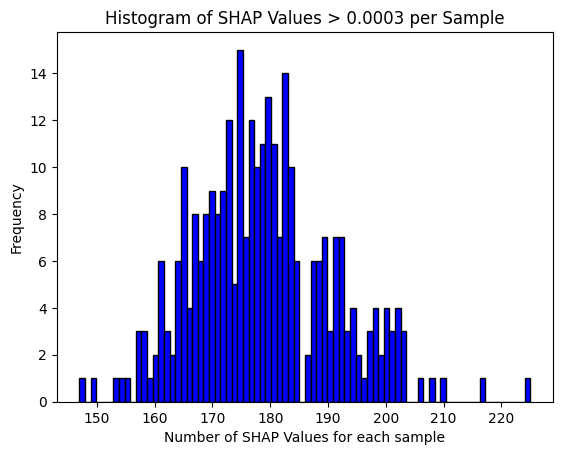

In [13]:
import matplotlib.pyplot as plt

# Using the filtered_dict from the previous step
num_shap_values_per_sample = [len(values) for values in f_d.values()]

# Draw a histogram
plt.hist(num_shap_values_per_sample, bins=80, color='blue', edgecolor='black')
plt.xlabel('Number of SHAP Values for each sample')
plt.ylabel('Frequency')
plt.title('Histogram of SHAP Values > 0.0003 per Sample')
plt.show()


In [35]:
with open('shap_21_filt_positive_g.pkl', 'wb') as f:
    pickle.dump(f_d, f)

In [8]:
with open('shap_22_filt_positive_g.pkl', 'rb') as f:
    f_d = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'shap_22_filt_positive_g.pkl'

In [ ]:
f_d

In [16]:
# List of names to remove
names_to_remove = ['age_death', 'tissue', 'sex', 'apoe4_allele']

# Create a dictionary with specimen ID as key and sorted list of genes (by SHAP values) as values
filtered_dict_genes_only = {
    specimen_id: sorted(
        (gene for gene in shap_values.keys() if gene not in names_to_remove),
        key=lambda gene: shap_values[gene],
        reverse=True
    )
    for specimen_id, shap_values in f_d.items()
}


In [39]:
filtered_dict_genes_only

{'366_120502': ['ENSG00000166535',
  'ENSG00000157833',
  'ENSG00000111087',
  'ENSG00000165092',
  'ENSG00000203952',
  'ENSG00000188269',
  'ENSG00000228058',
  'ENSG00000230537',
  'ENSG00000198417',
  'ENSG00000086159',
  'ENSG00000148482',
  'ENSG00000188039',
  'ENSG00000012223',
  'ENSG00000139410',
  'ENSG00000116717',
  'ENSG00000183963',
  'ENSG00000237422',
  'ENSG00000206113',
  'ENSG00000196517',
  'ENSG00000042062',
  'ENSG00000228252',
  'ENSG00000223478',
  'ENSG00000279727',
  'ENSG00000143772',
  'ENSG00000271714',
  'ENSG00000173068',
  'ENSG00000142731',
  'ENSG00000171388',
  'ENSG00000143382',
  'ENSG00000287134',
  'ENSG00000287689',
  'ENSG00000135926',
  'ENSG00000205562',
  'ENSG00000087494',
  'ENSG00000162975',
  'ENSG00000142449',
  'ENSG00000197635',
  'ENSG00000250786',
  'ENSG00000168209',
  'ENSG00000188779',
  'ENSG00000225449',
  'ENSG00000003989',
  'ENSG00000206159',
  'ENSG00000261701',
  'ENSG00000281501',
  'ENSG00000286215',
  'ENSG00000096060',

In [40]:
with open('shap_samp_genes_final_july_22.pkl', 'wb') as f:
    pickle.dump(filtered_dict_genes_only, f)

In [41]:
f_d = filtered_dict_genes_only

### Checking union of shap genes

In [52]:
import pickle
with open('shap_20_samp_genes_550_avg.pkl', 'rb') as f:
    f_d = pickle.load(f)

In [50]:
f_d

{'366_120502': ['ENSG00000166535',
  'ENSG00000157833',
  'ENSG00000111087',
  'ENSG00000165092',
  'ENSG00000203952',
  'ENSG00000188269',
  'ENSG00000228058',
  'ENSG00000230537',
  'ENSG00000198417',
  'ENSG00000086159',
  'ENSG00000148482',
  'ENSG00000188039',
  'ENSG00000012223',
  'ENSG00000139410',
  'ENSG00000116717',
  'ENSG00000183963',
  'ENSG00000237422',
  'ENSG00000206113',
  'ENSG00000196517',
  'ENSG00000042062',
  'ENSG00000228252',
  'ENSG00000223478',
  'ENSG00000279727',
  'ENSG00000143772',
  'ENSG00000271714',
  'ENSG00000173068',
  'ENSG00000142731',
  'ENSG00000171388',
  'ENSG00000143382',
  'ENSG00000287134',
  'ENSG00000287689',
  'ENSG00000135926',
  'ENSG00000205562',
  'ENSG00000087494',
  'ENSG00000162975',
  'ENSG00000142449',
  'ENSG00000197635',
  'ENSG00000250786',
  'ENSG00000168209',
  'ENSG00000188779',
  'ENSG00000225449',
  'ENSG00000003989',
  'ENSG00000206159',
  'ENSG00000261701',
  'ENSG00000281501',
  'ENSG00000286215',
  'ENSG00000096060',

In [42]:
# Assuming your dictionary is stored in a variable named 'filtered_dict_genes_only'
gene_union = set()
for genes in f_d.values():
    gene_union.update(genes)

print(f'Number of unique genes across all patients: {len(gene_union)}')


Number of unique genes across all patients: 3082


## Filter the rnaseq dataset for only the union of the genes

In [53]:
# Load the RNA-seq dataset
rna_seq_filepath = 'ROSMAP_shap_samples_v13_4k_july_22.csv'
df_rna_seq = pd.read_csv(rna_seq_filepath, index_col=0)
df_rna_seq.columns[:19]

Index(['individualID', 'diagnosis', 'tissue', 'race', 'spanish',
       'apoe4_allele', 'sex', 'batch', 'pmi', 'RIN', 'RIN2', 'age_death',
       'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED',
       'RnaSeqMetrics_PCT_INTRONIC_BASES',
       'RnaSeqMetrics_PCT_INTERGENIC_BASES', 'RnaSeqMetrics_PCT_CODING_BASES',
       'ethnicity', 'study', 'ENSG00000000971'],
      dtype='object')

In [56]:
# Get all gene expression columns from the 19th column onward that are in the gene union
filtered_gene_columns = [col for col in df_rna_seq.columns[18:] if col in gene_union]
len(filtered_gene_columns)
# Combine covariate columns with the filtered gene columns
final_columns = list(df_rna_seq.columns[:18]) + filtered_gene_columns

# Filter the DataFrame to include only the selected columns
filtered_rna_seq_df = df_rna_seq[final_columns]

In [57]:
filtered_rna_seq_df

individualID  diagnosis  tissue  race  spanish  apoe4_allele  \
366_120502        R9809661          1       3   1.0      2.0             1   
52_120416         R9809441          1       3   1.0      2.0             0   
493_120515        R9771008          1       3   1.0      2.0             0   
654_120529        R9254464          1       3   1.0      2.0             0   
76_120417         R9137173          1       3   1.0      2.0             1   
...                    ...        ...     ...   ...      ...           ...   
RISK_437          R9425423          1       3   1.0      2.0             0   
RISK_46_rerun     R6998518          1       6   1.0      2.0             1   
RISK_50_rerun     R1438115          1       6   1.0      2.0             0   
RISK_51_rerun     R1753622          1       3   1.0      2.0             2   
RISK_67_rerun     R6925335          1       3   1.0      2.0             0   

               sex  batch        pmi  RIN  ...  ENSG00000287737  \
366_120502       1      7  17.416667  7.4  ...         2.035297   
52_120416        1      6   4.450000  6.4  ...         1.808810   
493_120515       0      4   3.083333  6.9  ...         1.818391   
654_120529       1      5   7.500000  5.7  ...         1.898766   
76_120417        1      4   5.000000  6.7  ...         1.868394   
...            ...    ...        ...  ...  ...              ...   
RISK_437         1     17  16.516667  2.8  ...         1.857952   
RISK_46_rerun    1     17  15.666667  1.3  ...         2.185360   
RISK_50_rerun    1     17   6.750000  2.0  ...         2.206138   
RISK_51_rerun    1     17   7.266667  1.2  ...         1.960913   
RISK_67_rerun    0     17  38.333333  3.4  ...         1.815689   

               ENSG00000287750  ENSG00000287808  ENSG00000287815  \
366_120502           -1.427908        -0.370192         0.139377   
52_120416            -1.609487        -0.851214         0.635089   
493_120515           -1.335638        -0.746460         1.428795   
654_120529           -0.848693        -0.994251        -0.432613   
76_120417            -1.911002        -1.278122         0.326804   
...                        ...              ...              ...   
RISK_437             -1.029853        -0.312799         0.831489   
RISK_46_rerun        -1.182279        -1.883134         1.210712   
RISK_50_rerun        -1.628922        -0.353283         0.865323   
RISK_51_rerun        -1.960567        -1.542591         0.394446   
RISK_67_rerun        -1.041020        -0.567871         1.053959   

               ENSG00000287900  ENSG00000287925  ENSG00000287978  \
366_120502            0.833608         1.092943         1.707821   
52_120416             0.925383         0.934533         0.243795   
493_120515            1.639106         0.797550         1.391738   
654_120529            1.611975         0.995050         1.056309   
76_120417             1.561044        -0.693230         2.267006   
...                        ...              ...              ...   
RISK_437              1.606163         1.261024         0.970229   
RISK_46_rerun         1.852605         0.874080         1.637173   
RISK_50_rerun         1.656371         1.406023         1.376175   
RISK_51_rerun         1.370487         0.705370         0.248185   
RISK_67_rerun         1.893846         1.672508         2.134204   

              ENSG00000288033  ENSG00000288048  ENSG00000288049  
366_120502           0.960361         0.552581        -5.109539  
52_120416            0.441563         1.028262        -4.070924  
493_120515           1.636495         0.642124        -0.998250  
654_120529          -0.180843         1.239391        -5.325863  
76_120417            0.810119         0.634079        -4.042548  
...                       ...              ...              ...  
RISK_437             0.769497        -1.164219        -4.505437  
RISK_46_rerun        1.523786         0.782975        -5.904522  
RISK_50_rerun        1.533203        -0.6871

In [59]:
# Optionally, save the filtered DataFrame back to CSV or as a pickle for efficient future loading
filtered_rna_seq_df.to_csv('ROSMAP_shap_samples_v14_4k_july_22.csv')

## Filtering dataset and metadata -- export csv

### Checking all the datasets (inputs)

In [15]:
with open('shap_22_samp_genes.pkl', 'rb') as f:
    filtered_dict_genes_only = pickle.load(f)

In [ ]:
filtered_dict_genes_only

In [17]:
rnaseq_counts = pd.read_csv('ROSMAP_counts_v10_imbalance_4k.csv', index_col=0)

In [ ]:
rnaseq_counts

In [48]:
metadata = pd.read_csv('./metadata_v6_rosmap.csv', index_col=0)

In [ ]:
metadata

### Code for creating csv of interesting patients

In [35]:
import pandas as pd
import pickle

# Load the dictionary from the pickle file
with open('shap_samp_genes_final_july_22.pkl', 'rb') as f:
    filtered_dict_genes_only = pickle.load(f)

# Load the RNA-seq counts dataset
rnaseq_counts = pd.read_csv('ROSMAP_counts_v10_imbalance_4k.csv', index_col=0)

# Load the metadata
metadata = pd.read_csv('./backup/metadata_v6_rosmap.csv', index_col=0)

# Filter the metadata to keep only the samples that are keys in the dictionary
filtered_metadata = metadata.loc[filtered_dict_genes_only.keys()]

# Filter the RNA-seq counts dataset to keep only the samples that are keys in the dictionary
filtered_rnaseq_counts = rnaseq_counts.loc[filtered_dict_genes_only.keys()]

# Merge the filtered RNA-seq counts dataset with the corresponding filtered metadata
merged_dataset = pd.merge(filtered_metadata, filtered_rnaseq_counts, left_index=True, right_index=True)

# Save the merged dataset to a CSV file
output_path = 'ROSMAP_shap_samples_v13_4k_july_22.csv'
merged_dataset.to_csv(output_path)
print(f'Merged dataset saved to {output_path}')


Merged dataset saved to ROSMAP_shap_samples_v13_4k_july_22.csv


In [22]:
rnaseq_counts = pd.read_csv('ROSMAP_shap_samples_v13_4k_july_22.csv', index_col=0)

In [23]:
rnaseq_counts

individualID  diagnosis  tissue  race  spanish  apoe4_allele  \
366_120502        R9809661          1       3   1.0      2.0             1   
52_120416         R9809441          1       3   1.0      2.0             0   
493_120515        R9771008          1       3   1.0      2.0             0   
654_120529        R9254464          1       3   1.0      2.0             0   
76_120417         R9137173          1       3   1.0      2.0             1   
...                    ...        ...     ...   ...      ...           ...   
RISK_437          R9425423          1       3   1.0      2.0             0   
RISK_46_rerun     R6998518          1       6   1.0      2.0             1   
RISK_50_rerun     R1438115          1       6   1.0      2.0             0   
RISK_51_rerun     R1753622          1       3   1.0      2.0             2   
RISK_67_rerun     R6925335          1       3   1.0      2.0             0   

               sex  batch        pmi  RIN  ...  ENSG00000287815  \
366_120502       1      7  17.416667  7.4  ...         0.139377   
52_120416        1      6   4.450000  6.4  ...         0.635089   
493_120515       0      4   3.083333  6.9  ...         1.428795   
654_120529       1      5   7.500000  5.7  ...        -0.432613   
76_120417        1      4   5.000000  6.7  ...         0.326804   
...            ...    ...        ...  ...  ...              ...   
RISK_437         1     17  16.516667  2.8  ...         0.831489   
RISK_46_rerun    1     17  15.666667  1.3  ...         1.210712   
RISK_50_rerun    1     17   6.750000  2.0  ...         0.865323   
RISK_51_rerun    1     17   7.266667  1.2  ...         0.394446   
RISK_67_rerun    0     17  38.333333  3.4  ...         1.053959   

               ENSG00000287900  ENSG00000287925  ENSG00000287978  \
366_120502            0.833608         1.092943         1.707821   
52_120416             0.925383         0.934533         0.243795   
493_120515            1.639106         0.797550         1.391738   
654_120529            1.611975         0.995050         1.056309   
76_120417             1.561044        -0.693230         2.267006   
...                        ...              ...              ...   
RISK_437              1.606163         1.261024         0.970229   
RISK_46_rerun         1.852605         0.874080         1.637173   
RISK_50_rerun         1.656371         1.406023         1.376175   
RISK_51_rerun         1.370487         0.705370         0.248185   
RISK_67_rerun         1.893846         1.672508         2.134204   

               ENSG00000287985  ENSG00000288033  ENSG00000288048  \
366_120502            1.329693         0.960361         0.552581   
52_120416            -0.272757         0.441563         1.028262   
493_120515            1.096291         1.636495         0.642124   
654_120529            1.156011        -0.180843         1.239391   
76_120417             1.651049         0.810119         0.634079   
...                        ...              ...              ...   
RISK_437              0.885443         0.769497        -1.164219   
RISK_46_rerun        -0.111618         1.523786         0.782975   
RISK_50_rerun         0.480853         1.533203        -0.687184   
RISK_51_rerun        -0.039540         0.556972         0.763065   
RISK_67_rerun         0.823070         1.460374        -0.035521   

              ENSG00000288049  ENSG00000288062  ENSG00000288107  
366_120502          -5.109539         3.378009         1.674681  
52_120416           -4.070924         2.869645         1.041287  
493_120515          -0.998250         3.053631         1.721891  
654_120529          -5.325863         3.342447         2.135636  
76_120417           -4.042548         3.783358         1.414760  
...                       ...              ...              ...  
RISK_437            -4.505437         3.107846         1.777936  
RISK_46_rerun       -5.904522         1.779158         2.831715  
RISK_50_rerun       -5.655950         2.7959

In [24]:
rnaseq_counts.columns[:20]
# Study is 17

Index(['individualID', 'diagnosis', 'tissue', 'race', 'spanish',
       'apoe4_allele', 'sex', 'batch', 'pmi', 'RIN', 'RIN2', 'age_death',
       'AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED',
       'RnaSeqMetrics_PCT_INTRONIC_BASES',
       'RnaSeqMetrics_PCT_INTERGENIC_BASES', 'RnaSeqMetrics_PCT_CODING_BASES',
       'ethnicity', 'study', 'ENSG00000000971', 'ENSG00000001617'],
      dtype='object')

# Clustering samples

## PCA

In [25]:
df = pd.read_csv('ROSMAP_shap_samples_v13_4k_july_22.csv', index_col=0)
# df = df[df['tissue'] == 6]
df

individualID  diagnosis  tissue  race  spanish  apoe4_allele  \
366_120502        R9809661          1       3   1.0      2.0             1   
52_120416         R9809441          1       3   1.0      2.0             0   
493_120515        R9771008          1       3   1.0      2.0             0   
654_120529        R9254464          1       3   1.0      2.0             0   
76_120417         R9137173          1       3   1.0      2.0             1   
...                    ...        ...     ...   ...      ...           ...   
RISK_437          R9425423          1       3   1.0      2.0             0   
RISK_46_rerun     R6998518          1       6   1.0      2.0             1   
RISK_50_rerun     R1438115          1       6   1.0      2.0             0   
RISK_51_rerun     R1753622          1       3   1.0      2.0             2   
RISK_67_rerun     R6925335          1       3   1.0      2.0             0   

               sex  batch        pmi  RIN  ...  ENSG00000287815  \
366_120502       1      7  17.416667  7.4  ...         0.139377   
52_120416        1      6   4.450000  6.4  ...         0.635089   
493_120515       0      4   3.083333  6.9  ...         1.428795   
654_120529       1      5   7.500000  5.7  ...        -0.432613   
76_120417        1      4   5.000000  6.7  ...         0.326804   
...            ...    ...        ...  ...  ...              ...   
RISK_437         1     17  16.516667  2.8  ...         0.831489   
RISK_46_rerun    1     17  15.666667  1.3  ...         1.210712   
RISK_50_rerun    1     17   6.750000  2.0  ...         0.865323   
RISK_51_rerun    1     17   7.266667  1.2  ...         0.394446   
RISK_67_rerun    0     17  38.333333  3.4  ...         1.053959   

               ENSG00000287900  ENSG00000287925  ENSG00000287978  \
366_120502            0.833608         1.092943         1.707821   
52_120416             0.925383         0.934533         0.243795   
493_120515            1.639106         0.797550         1.391738   
654_120529            1.611975         0.995050         1.056309   
76_120417             1.561044        -0.693230         2.267006   
...                        ...              ...              ...   
RISK_437              1.606163         1.261024         0.970229   
RISK_46_rerun         1.852605         0.874080         1.637173   
RISK_50_rerun         1.656371         1.406023         1.376175   
RISK_51_rerun         1.370487         0.705370         0.248185   
RISK_67_rerun         1.893846         1.672508         2.134204   

               ENSG00000287985  ENSG00000288033  ENSG00000288048  \
366_120502            1.329693         0.960361         0.552581   
52_120416            -0.272757         0.441563         1.028262   
493_120515            1.096291         1.636495         0.642124   
654_120529            1.156011        -0.180843         1.239391   
76_120417             1.651049         0.810119         0.634079   
...                        ...              ...              ...   
RISK_437              0.885443         0.769497        -1.164219   
RISK_46_rerun        -0.111618         1.523786         0.782975   
RISK_50_rerun         0.480853         1.533203        -0.687184   
RISK_51_rerun        -0.039540         0.556972         0.763065   
RISK_67_rerun         0.823070         1.460374        -0.035521   

              ENSG00000288049  ENSG00000288062  ENSG00000288107  
366_120502          -5.109539         3.378009         1.674681  
52_120416           -4.070924         2.869645         1.041287  
493_120515          -0.998250         3.053631         1.721891  
654_120529          -5.325863         3.342447         2.135636  
76_120417           -4.042548         3.783358         1.414760  
...                       ...              ...              ...  
RISK_437            -4.505437         3.107846         1.777936  
RISK_46_rerun       -5.904522         1.779158         2.831715  
RISK_50_rerun       -5.655950         2.7959

In [ ]:
# Remove the outlier? (2 blocks go ahead!)

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('ROSMAP_shap_samples_v12_4k_with_clusters.csv', index_col=0)
# df = df[df['tissue'] == 6]
# df['tissue'] = df['tissue'].map({1: '2', 3: '1', 6: '3'})

# Separate the features and the target 'tissue' column
features = df.iloc[:, 19:]  # Features start from column 7 (0-based index)
target = df['clusters']

# Run PCA on the features
pca = PCA(n_components=2)  # Adjusted to 2 components for visualization
X_pca = pca.fit_transform(features)

# Encode the 'tissue' labels
le = LabelEncoder()
y_lan = le.fit_transform(target)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame({
    "PCA1": X_pca[:, 0],
    "PCA2": X_pca[:, 1],
    "Tissue": target,
    "label": y_lan
})

# Plot the PCA results
sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="Tissue", data=pca_df, palette="husl")
plt.legend(title="Tissue", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
# plt.savefig('pca_original_clusters.png', dpi=600)
plt.show()


In [ ]:
# Detect the outlier in the pca plot

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('ROSMAP_shap_samples_v14_4k_july_22.csv', index_col=0)

# Separate the features and the target 'tissue' column
features = df.iloc[:, 18:]  # Adjust features range if necessary
target = df['tissue']

# Run PCA on the features
pca = PCA(n_components=2)  # Using two components for visualization
X_pca = pca.fit_transform(features)

# Encode the 'tissue' labels
le = LabelEncoder()
y_lan = le.fit_transform(target)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame({
    "PCA1": X_pca[:, 0],
    "PCA2": X_pca[:, 1],
    "Tissue": target,
    "label": y_lan
})

# Plot the PCA results
sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="Tissue", data=pca_df, palette="colorblind")
plt.legend(title="Tissue", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

# Define the target point and tolerance
target_pca1 = 79
target_pca2 = -1
tolerance = 1  # Define how close points must be to be considered "around" the target

# Highlight points around the target values by adding annotations to the plot
for i in pca_df.index:
    pca1 = pca_df.loc[i, 'PCA1']
    pca2 = pca_df.loc[i, 'PCA2']
    if (target_pca1 - tolerance <= pca1 <= target_pca1 + tolerance) and \
       (target_pca2 - tolerance <= pca2 <= target_pca2 + tolerance):
        ax.text(pca1, pca2, i, color='red', fontsize=9)

# Save and show the plot
# plt.savefig('pca_target_point.png', dpi=500)
plt.show()


In [ ]:
# Sample_R9540861-PCC
# Sample_R1954385-PCC
# to remove as they are outliers
# because of the classificaiton of tissue 3: 1035-DLPFC
# tissue 3: 769_130523

In [170]:
import pandas as pd

# Load the dataset
df = pd.read_csv('ROSMAP_shap_samples_v14_4k_july_22.csv', index_col=0)

# Remove the sample with index 'Sample_R1954385-PCC'
df.drop('769_130523', inplace=True)

# 

# Save the dataframe back to csv
df.to_csv('ROSMAP_shap_samples_v14_4k_july_22.csv')

In [171]:
import pickle

# Specify the path to your pickle file
pkl_file_path = 'shap_samp_genes_final_july_22.pkl'

# Load your dictionary from the pickle file
with open(pkl_file_path, 'rb') as pkl_file:
    your_dict = pickle.load(pkl_file)

# Remove the specific sample from your dictionary
sample_to_remove = '769_130523'
if sample_to_remove in your_dict:
    del your_dict[sample_to_remove]

# Save the updated dictionary back to the pickle file
with open('shap_samp_genes_final_july_22.pkl', 'wb') as pkl_file:
    pickle.dump(your_dict, pkl_file)


In [ ]:
# To see the eigenvalues (explained variance) for the principal components (PCAs)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np

# Load the dataset
df = pd.read_csv('ROSMAP_shap_samples_v11_4k.csv', index_col=0)

# Separate the features (assuming features start from column 7)
features = df.iloc[:, 18:]

# Split the dataset into training and validation sets
X_train, X_valid = train_test_split(features, test_size=0.3, random_state=42)

# Initialize PCA with the desired number of components and a fixed random state
n_components = 7  # Adjust this to your desired number of components
pca = PCA(n_components=n_components, random_state=100)

# Fit PCA on the training data and transform both training and validation data
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)

# Get the explained variance (eigenvalues) for each principal component
pca_explained_variance = pca.explained_variance_

# Calculate the cumulative sum of eigenvalues (explained variance)
cumulative_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)

# Print or use the eigenvalues and cumulative sum of eigenvalues
print("Eigenvalues for each principal component:", pca_explained_variance)
print("Cumulative sum of eigenvalues:", cumulative_sum_eigenvalues)


Eigenvalues for each principal component: [1841.02458317  280.47168245  227.93787233  130.03985864  102.51552171
   67.30866386   58.5553901 ]
Cumulative sum of eigenvalues: [0.46582058 0.53678621 0.59445962 0.62736262 0.65330135 0.67033195
 0.68514778]


In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart of the eigenvalues (explained variance) for each principal component
plt.figure(figsize=(9, 6))
plt.bar(range(1, n_components + 1), pca_explained_variance, alpha=0.7, label='Individual Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue (Explained Variance)')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(1, n_components + 1))
plt.legend()
plt.savefig('pca_original_eigenvalues.png', dpi=450)
plt.show()

## K-means clustering

### 1. Perform K-means clustering and plot PCA

In [138]:
df = pd.read_csv('ROSMAP_shap_samples_v14_4k_july_22.csv', index_col=0)
df_filtered = df[df['tissue'] == 1]
df_filtered

individualID  diagnosis  tissue  race  spanish  \
1061-AC                R1528689          1       1   1.0      2.0   
Sample_2261-AC         R7583108          1       1   1.0      2.0   
Sample_2546-AC         R6939144          1       1   1.0      2.0   
Sample_R5989528-AC     R5989528          1       1   1.0      2.0   
Sample_2400-AC         R2346589          1       1   1.0      2.0   
...                         ...        ...     ...   ...      ...   
1082-AC                R3019567          1       1   1.0      2.0   
Sample_R6536134-AC     R6536134          1       1   1.0      2.0   
Sample_R5573393-AC     R5573393          1       1   1.0      2.0   
Sample_R1761902-AC     R1761902          1       1   1.0      2.0   
Sample_R6759986-AC     R6759986          1       1   1.0      2.0   

                    apoe4_allele  sex  batch        pmi       RIN  ...  \
1061-AC                        1    1     14   5.500000  7.410708  ...   
Sample_2261-AC                 1    0     12   4.300000  4.500000  ...   
Sample_2546-AC                 1    0     12   9.916667  5.000000  ...   
Sample_R5989528-AC             0    0     13  14.166667  4.400000  ...   
Sample_2400-AC                 0    0     12  13.666667  8.500000  ...   
...                          ...  ...    ...        ...       ...  ...   
1082-AC                        0    1     14   8.666667  6.406122  ...   
Sample_R6536134-AC             0    1     13   3.916667  6.900000  ...   
Sample_R5573393-AC             1    1     13   6.683333  6.400000  ...   
Sample_R1761902-AC             0    1     13   6.250000  7.300000  ...   
Sample_R6759986-AC             1    1     13   6.000000  7.700000  ...   

                    ENSG00000287737  ENSG00000287750  ENSG00000287808  \
1061-AC                    1.023474        -0.314332        -0.539682   
Sample_2261-AC             0.552822        -0.482016         0.288691   
Sample_2546-AC             0.681744        -0.322767         0.560726   
Sample_R5989528-AC        -0.025470        -0.336150         0.032461   
Sample_2400-AC             0.589666         0.449828         0.177003   
...                             ...              ...              ...   
1082-AC                    0.523665        -0.541274        -0.437212   
Sample_R6536134-AC         0.397459        -0.063379        -0.287356   
Sample_R5573393-AC        -0.466996        -0.348796        -0.678064   
Sample_R1761902-AC         0.336810         0.185656         0.272643   
Sample_R6759986-AC         0.234946         0.445736         0.499207   

                    ENSG00000287815  ENSG00000287900  ENSG00000287925  \
1061-AC                   -0.526481         0.233320        -0.823759   
Sample_2261-AC            -0.580844        -0.654721        -1.130390   
Sample_2546-AC             0.044540        -0.536921        -1.724034   
Sample_R5989528-AC        -1.113986        -0.901567        -0.723493   
Sample_2400-AC            -0.666136        -0.158222        -0.967237   
...                             ...              ...              ...   
1082-AC                   -0.586114         0.332885        -0.959619   
Sample_R6536134-AC        -0.499940        -0.330734        -2.085660   
Sample_R5573393-AC        -0.266485        -0.839549        -0.761862   
Sample_R1761902-AC        -1.248289        -0.363206        -1.537969   
Sample_R6759986-AC        -0.499939        -0.799621        -6.080796   

                    ENSG00000287978 ENSG00000288033  ENSG00000288048  \
1061-AC                    0.646124       -0.167258         1.610778   
Sample_2261-AC             1.238031        1.286840         2.377250   
Sample_2546-AC             2.159816        0.896377         2.080264   
Sample_R5989528-AC         1.130272        1.320949         1.695249   
Sample_2400-AC             3.457827       -0.217843         1.473252   
...                             ...             ...              ...   
1082-AC                    1.499858        

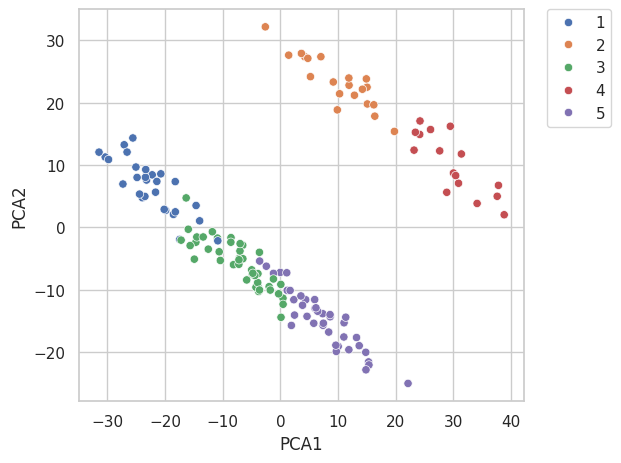

In [35]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_csv('ROSMAP_shap_samples_v14_4k_july_22.csv', index_col=0)
df = df[df['tissue'] == 3]


# Separate the features (assuming features start from column 7)
features = df.iloc[:, 18:]

# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(init="random", n_clusters=5, n_init=2000, max_iter=4000, random_state=42)
kmeans_labels = kmeans.fit_predict(features)



# Create a DataFrame for PCA results with K-means labels
pca_df = pd.DataFrame({
    "PCA1": X_pca[:, 0],
    "PCA2": X_pca[:, 1],
    "kmeans_labels": kmeans_labels+1
})

# Plot the PCA results with K-means clustering labels
sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="kmeans_labels", data=pca_df, palette="deep")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig('pca_tissue_6_clusters.png', dpi=700)
plt.show()


In [ ]:
# find the outlier

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('ROSMAP_shap_samples_v14_4k_july_22.csv', index_col=0)
df = df[df['tissue'] == 3]

# Separate the features (assuming features start from column 7)
features = df.iloc[:, 18:]

# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(init="random", n_clusters=4, n_init=1000, max_iter=3000, random_state=42)
kmeans_labels = kmeans.fit_predict(features)

# Create a DataFrame for PCA results with K-means labels
pca_df = pd.DataFrame({
    "SampleName": df.index,  # Ensure you have sample names in the index or adjust accordingly
    "PCA1": X_pca[:, 0],
    "PCA2": X_pca[:, 1],
    "kmeans_labels": kmeans_labels + 1
})

# Function to find nearest point
def find_nearest_sample(pca_df, target_x, target_y):
    distances = np.sqrt((pca_df['PCA1'] - target_x)**2 + (pca_df['PCA2'] - target_y)**2)
    min_index = distances.idxmin()
    return pca_df.loc[min_index]

# Specify your known coordinates here (+-1 error range)
target_x, target_y = 45, 20  # Example coordinates
nearest_sample = find_nearest_sample(pca_df, target_x, target_y)
print("Nearest sample information:")
print(nearest_sample)

# Plot the PCA results with K-means clustering labels
sns.set(style="whitegrid", palette="muted")
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="kmeans_labels", data=pca_df, palette="deep")
plt.scatter([target_x], [target_y], color='red')  # Mark the target position
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()


In [ ]:
# remove the sample in tissue 3: 1035-DLPFC
# it messes up the classification

In [64]:
kmeans_labels

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1,
       0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0], dtype=int32)

### 2. Verification of number of clusters

#### Elbow method

In [ ]:
# ELbow method for verification:

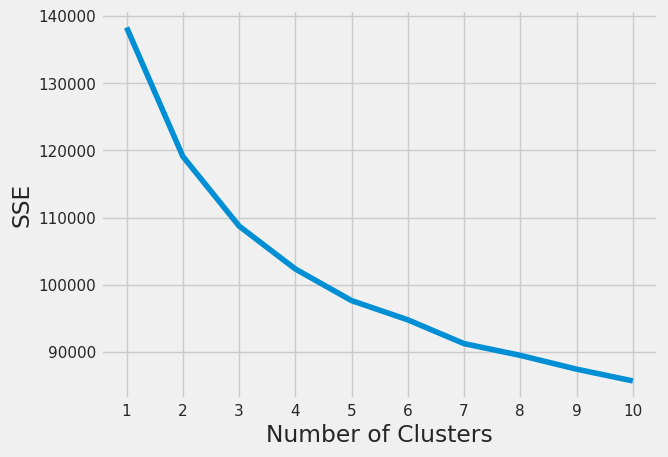

In [77]:
from sklearn.cluster import KMeans

# Define K-means parameters
kmeans_kwargs = {"init": "random", "n_init": 100, "max_iter": 800, "random_state": 42}

# List to hold the SSE values for each k
sse = []

# Loop over different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

# Plot the SSE values to find the elbow point
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


In [70]:
from kneed import KneeLocator

# Define K-means parameters
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

# List to hold the SSE values for each k
sse = []

# Loop over different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

# Find the elbow point using KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
elbow_point = kl.elbow

# Print the elbow point
print(f'Elbow point (optimal number of clusters): {elbow_point}')

Elbow point (optimal number of clusters): 3


#### silhouette coefficient

In [ ]:
# silhouette coefficient for each number of clusters (K) 

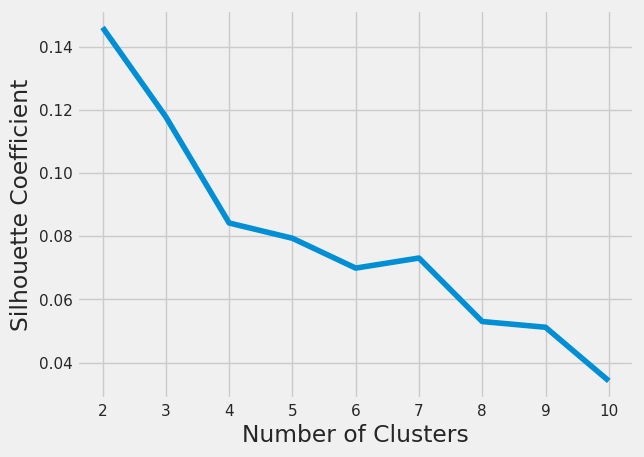

In [82]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset
#df = pd.read_csv('ROSMAP_shap_samples_v10.csv', index_col=0)

# Separate the features (assuming features start from column 19)
features = df.iloc[:, 18:]

# Define K-means parameters
kmeans_kwargs = {"init": "random", "n_init": 100, "max_iter": 1000, "random_state": 42}

# A list containing all the average silhouette coefficients for each K
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_coefficients.append(score)

# Plot the silhouette coefficients
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


### 3. Clustering each tissue and save a new csv file

In [36]:
import pandas as pd
df = pd.read_csv('ROSMAP_shap_samples_v14_4k_july_22.csv', index_col=0)
df

individualID  diagnosis  tissue  race  spanish  apoe4_allele  \
366_120502        R9809661          1       3   1.0      2.0             1   
52_120416         R9809441          1       3   1.0      2.0             0   
493_120515        R9771008          1       3   1.0      2.0             0   
654_120529        R9254464          1       3   1.0      2.0             0   
76_120417         R9137173          1       3   1.0      2.0             1   
...                    ...        ...     ...   ...      ...           ...   
RISK_437          R9425423          1       3   1.0      2.0             0   
RISK_46_rerun     R6998518          1       6   1.0      2.0             1   
RISK_50_rerun     R1438115          1       6   1.0      2.0             0   
RISK_51_rerun     R1753622          1       3   1.0      2.0             2   
RISK_67_rerun     R6925335          1       3   1.0      2.0             0   

               sex  batch        pmi  RIN  ...  ENSG00000287737  \
366_120502       1      7  17.416667  7.4  ...         2.035297   
52_120416        1      6   4.450000  6.4  ...         1.808810   
493_120515       0      4   3.083333  6.9  ...         1.818391   
654_120529       1      5   7.500000  5.7  ...         1.898766   
76_120417        1      4   5.000000  6.7  ...         1.868394   
...            ...    ...        ...  ...  ...              ...   
RISK_437         1     17  16.516667  2.8  ...         1.857952   
RISK_46_rerun    1     17  15.666667  1.3  ...         2.185360   
RISK_50_rerun    1     17   6.750000  2.0  ...         2.206138   
RISK_51_rerun    1     17   7.266667  1.2  ...         1.960913   
RISK_67_rerun    0     17  38.333333  3.4  ...         1.815689   

               ENSG00000287750  ENSG00000287808  ENSG00000287815  \
366_120502           -1.427908        -0.370192         0.139377   
52_120416            -1.609487        -0.851214         0.635089   
493_120515           -1.335638        -0.746460         1.428795   
654_120529           -0.848693        -0.994251        -0.432613   
76_120417            -1.911002        -1.278122         0.326804   
...                        ...              ...              ...   
RISK_437             -1.029853        -0.312799         0.831489   
RISK_46_rerun        -1.182279        -1.883134         1.210712   
RISK_50_rerun        -1.628922        -0.353283         0.865323   
RISK_51_rerun        -1.960567        -1.542591         0.394446   
RISK_67_rerun        -1.041020        -0.567871         1.053959   

               ENSG00000287900  ENSG00000287925  ENSG00000287978  \
366_120502            0.833608         1.092943         1.707821   
52_120416             0.925383         0.934533         0.243795   
493_120515            1.639106         0.797550         1.391738   
654_120529            1.611975         0.995050         1.056309   
76_120417             1.561044        -0.693230         2.267006   
...                        ...              ...              ...   
RISK_437              1.606163         1.261024         0.970229   
RISK_46_rerun         1.852605         0.874080         1.637173   
RISK_50_rerun         1.656371         1.406023         1.376175   
RISK_51_rerun         1.370487         0.705370         0.248185   
RISK_67_rerun         1.893846         1.672508         2.134204   

              ENSG00000288033  ENSG00000288048  ENSG00000288049  
366_120502           0.960361         0.552581        -5.109539  
52_120416            0.441563         1.028262        -4.070924  
493_120515           1.636495         0.642124        -0.998250  
654_120529          -0.180843         1.239391        -5.325863  
76_120417            0.810119         0.634079        -4.042548  
...                       ...              ...              ...  
RISK_437             0.769497        -1.164219        -4.505437  
RISK_46_rerun        1.523786         0.782975        -5.904522  
RISK_50_rerun        1.533203        -0.6871

In [37]:
# Step 1, clustering and saving the labels

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Specify the tissue number here for each run
TISSUE_NUMBER = 3  # Change this to 3 and 6 for subsequent runs

# Load the dataset
df = pd.read_csv('ROSMAP_shap_samples_v14_4k_july_22.csv', index_col=0)
df = df[df['tissue'] == TISSUE_NUMBER]

# Separate the features
features = df.iloc[:, 18:]

# Perform K-means clustering
kmeans = KMeans(init="random", n_clusters=5, n_init=3000, max_iter=5000, random_state=42)
kmeans_labels = kmeans.fit_predict(features)

# Save the cluster labels to a file
label_df = pd.DataFrame({'specimen_id': df.index, 'cluster_label': kmeans_labels+1})
label_df['cluster_label'] = str(TISSUE_NUMBER) + '_' + label_df['cluster_label'].astype(str)
label_filename = f'cluster_labels_for_tissue_{TISSUE_NUMBER}.csv'
label_df.to_csv(label_filename, index=False)

In [38]:
# Step2, Assign_Labels_Script.py

import pandas as pd

# Specify the tissue number and corresponding cluster label file
TISSUE_NUMBER = 3  # Change this for each run (1, 3, 6)
CLUSTER_LABELS_FILE = f'cluster_labels_for_tissue_{TISSUE_NUMBER}.csv'

# Load the dataset and the cluster labels
df = pd.read_csv('ROSMAP_shap_samples_v14_4k_with_clusters.csv', index_col=0)
cluster_labels = pd.read_csv(CLUSTER_LABELS_FILE, index_col='specimen_id')

# Check if 'clusters' column exists, if not, create it and insert at the fourth position
if 'clusters' not in df.columns:
    # Create the column with default values
    df.insert(3, 'clusters', pd.NA)  # Use None or np.nan if preferred
    
# Assign the new cluster labels to the 'clusters' column based on the index
df.loc[cluster_labels.index, 'clusters'] = cluster_labels['cluster_label']

# Save the updated dataframe
df.to_csv('ROSMAP_shap_samples_v14_4k_with_clusters.csv')


In [39]:
df = pd.read_csv('ROSMAP_shap_samples_v14_4k_with_clusters.csv', index_col=0)
# df = df[df['tissue'] == 6]
df

individualID  diagnosis  tissue clusters  race  spanish  \
366_120502        R9809661          1       3      3_3   1.0      2.0   
52_120416         R9809441          1       3      3_1   1.0      2.0   
493_120515        R9771008          1       3      3_2   1.0      2.0   
654_120529        R9254464          1       3      3_3   1.0      2.0   
76_120417         R9137173          1       3      3_5   1.0      2.0   
...                    ...        ...     ...      ...   ...      ...   
RISK_437          R9425423          1       3      3_5   1.0      2.0   
RISK_46_rerun     R6998518          1       6      6_4   1.0      2.0   
RISK_50_rerun     R1438115          1       6      6_4   1.0      2.0   
RISK_51_rerun     R1753622          1       3      3_1   1.0      2.0   
RISK_67_rerun     R6925335          1       3      3_4   1.0      2.0   

               apoe4_allele  sex  batch        pmi  ...  ENSG00000287737  \
366_120502                1    1      7  17.416667  ...         2.035297   
52_120416                 0    1      6   4.450000  ...         1.808810   
493_120515                0    0      4   3.083333  ...         1.818391   
654_120529                0    1      5   7.500000  ...         1.898766   
76_120417                 1    1      4   5.000000  ...         1.868394   
...                     ...  ...    ...        ...  ...              ...   
RISK_437                  0    1     17  16.516667  ...         1.857952   
RISK_46_rerun             1    1     17  15.666667  ...         2.185360   
RISK_50_rerun             0    1     17   6.750000  ...         2.206138   
RISK_51_rerun             2    1     17   7.266667  ...         1.960913   
RISK_67_rerun             0    0     17  38.333333  ...         1.815689   

               ENSG00000287750  ENSG00000287808  ENSG00000287815  \
366_120502           -1.427908        -0.370192         0.139377   
52_120416            -1.609487        -0.851214         0.635089   
493_120515           -1.335638        -0.746460         1.428795   
654_120529           -0.848693        -0.994251        -0.432613   
76_120417            -1.911002        -1.278122         0.326804   
...                        ...              ...              ...   
RISK_437             -1.029853        -0.312799         0.831489   
RISK_46_rerun        -1.182279        -1.883134         1.210712   
RISK_50_rerun        -1.628922        -0.353283         0.865323   
RISK_51_rerun        -1.960567        -1.542591         0.394446   
RISK_67_rerun        -1.041020        -0.567871         1.053959   

               ENSG00000287900  ENSG00000287925  ENSG00000287978  \
366_120502            0.833608         1.092943         1.707821   
52_120416             0.925383         0.934533         0.243795   
493_120515            1.639106         0.797550         1.391738   
654_120529            1.611975         0.995050         1.056309   
76_120417             1.561044        -0.693230         2.267006   
...                        ...              ...              ...   
RISK_437              1.606163         1.261024         0.970229   
RISK_46_rerun         1.852605         0.874080         1.637173   
RISK_50_rerun         1.656371         1.406023         1.376175   
RISK_51_rerun         1.370487         0.705370         0.248185   
RISK_67_rerun         1.893846         1.672508         2.134204   

               ENSG00000288033 ENSG00000288048  ENSG00000288049  
366_120502            0.960361        0.552581        -5.109539  
52_120416             0.441563        1.028262        -4.070924  
493_120515            1.636495        0.642124        -0.998250  
654_120529           -0.180843        1.239391        -5.325863  
76_120417             0.810119        0.634079        -4.042548  
...                        ...             ...              ...  
RISK_437              0.769497       -1.164219        -4.505437  
RISK_46_rerun         1.523786        0.782975        -5.90452

# Common shap genes between clusters

## Common genes, 3 tissues and clusters

In [40]:
import pandas as pd
import pickle
from collections import defaultdict

# Load the metadata
metadata = pd.read_csv('ROSMAP_shap_samples_v14_4k_with_clusters.csv', index_col=0)

# Sort the specimen IDs based on their tissues and create a dictionary
tissue_specimen_dict = defaultdict(list)
for specimen_id, row in metadata.iterrows():
    tissue_specimen_dict[row['clusters']].append(specimen_id)

In [41]:
tissue_specimen_dict

defaultdict(list,
            {'3_3': ['366_120502',
              '654_120529',
              '663_120530',
              '34_120416',
              '425_120507',
              '715_120531',
              '292_120430',
              '550_120517',
              '494_120515',
              '526_120515',
              '511_120515',
              '280_120430',
              '720_120531',
              '251_120426',
              '497_120515',
              '459_120514',
              '23_120411',
              '444_120507',
              '406_120503',
              '509_120515',
              '560_120517',
              '532_120516',
              '704_120605',
              '936_131101',
              '945_131107',
              'Sample_R9540861-DLPFC',
              'Sample_R3279589-DLPFC',
              'Sample_R1954385-DLPFC',
              'Sample_R6103640-DLPFC',
              'Sample_2064-DLPFC',
              'Sample_R2732138-DLPFC',
              '1051-DLPFC',
              '1082

In [42]:
import pickle
# Load the filtered dictionary from the pickle file
with open('shap_samp_genes_final_july_22.pkl', 'rb') as f:
    filtered_dict_genes_only = pickle.load(f)

# Create a new dictionary to store the common genes for each tissue
common_genes_by_tissue = {}

# For each tissue, find the common genes among all specimen IDs
for tissue, specimen_ids in tissue_specimen_dict.items():
    # Get the list of genes for the first specimen ID as the starting point
    common_genes = set(filtered_dict_genes_only[specimen_ids[0]])
    
    # Intersect the gene sets of all other specimen IDs to find the common genes
    for specimen_id in specimen_ids[1:]:
        if specimen_id in filtered_dict_genes_only:  # Check if the specimen ID is in the filtered dictionary
            common_genes &= set(filtered_dict_genes_only[specimen_id])
    
    # Store the common genes in the new dictionary
    common_genes_by_tissue[tissue] = list(common_genes)


In [43]:
common_genes_by_tissue

{'3_3': [],
 '3_1': ['ENSG00000230537', 'ENSG00000140368', 'ENSG00000175287'],
 '3_2': ['ENSG00000188783',
  'ENSG00000166535',
  'ENSG00000205929',
  'ENSG00000205106',
  'ENSG00000175287',
  'ENSG00000271714',
  'ENSG00000088836',
  'ENSG00000196517',
  'ENSG00000281327',
  'ENSG00000139410'],
 '3_5': ['ENSG00000271714'],
 '3_4': ['ENSG00000165092', 'ENSG00000053702', 'ENSG00000271714'],
 '1_2': ['ENSG00000166535',
  'ENSG00000188269',
  'ENSG00000053702',
  'ENSG00000281327',
  'ENSG00000205562',
  'ENSG00000198743',
  'ENSG00000287689'],
 '1_3': ['ENSG00000166535',
  'ENSG00000188039',
  'ENSG00000205929',
  'ENSG00000249577',
  'ENSG00000196517',
  'ENSG00000281327',
  'ENSG00000205562',
  'ENSG00000287689'],
 '1_1': ['ENSG00000166535',
  'ENSG00000251442',
  'ENSG00000203952',
  'ENSG00000205929',
  'ENSG00000175287',
  'ENSG00000228058',
  'ENSG00000162631',
  'ENSG00000196517',
  'ENSG00000281327',
  'ENSG00000205562'],
 '1_4': ['ENSG00000166535',
  'ENSG00000102317',
  'ENSG00

In [44]:
l = []
for cluster, genes in common_genes_by_tissue.items():
    print(f"Cluster {cluster}:")
    if genes:  # Check if the list is not empty
        for gene in genes:
            l.append(str(gene))
            print(gene)
print()
print(len(l))

print(l)

Cluster 3_3:
Cluster 3_1:
ENSG00000230537
ENSG00000140368
ENSG00000175287
Cluster 3_2:
ENSG00000188783
ENSG00000166535
ENSG00000205929
ENSG00000205106
ENSG00000175287
ENSG00000271714
ENSG00000088836
ENSG00000196517
ENSG00000281327
ENSG00000139410
Cluster 3_5:
ENSG00000271714
Cluster 3_4:
ENSG00000165092
ENSG00000053702
ENSG00000271714
Cluster 1_2:
ENSG00000166535
ENSG00000188269
ENSG00000053702
ENSG00000281327
ENSG00000205562
ENSG00000198743
ENSG00000287689
Cluster 1_3:
ENSG00000166535
ENSG00000188039
ENSG00000205929
ENSG00000249577
ENSG00000196517
ENSG00000281327
ENSG00000205562
ENSG00000287689
Cluster 1_1:
ENSG00000166535
ENSG00000251442
ENSG00000203952
ENSG00000205929
ENSG00000175287
ENSG00000228058
ENSG00000162631
ENSG00000196517
ENSG00000281327
ENSG00000205562
Cluster 1_4:
ENSG00000166535
ENSG00000102317
ENSG00000203952
ENSG00000188039
ENSG00000230537
ENSG00000196517
ENSG00000281327
ENSG00000285230
ENSG00000287689
Cluster 6_3:
ENSG00000230537
ENSG00000139410
ENSG00000165092
Cluste

In [45]:
print(len(set(l)))

33


In [ ]:
# Find the most prevalent genes in each tissue's samples

In [46]:
import pandas as pd
import pickle
from collections import defaultdict, Counter

# Load the metadata
metadata = pd.read_csv('ROSMAP_shap_samples_v11_4k_no_weight.csv', index_col=0)

# Sort the specimen IDs based on their tissues and create a dictionary
tissue_specimen_dict = defaultdict(list)
for specimen_id, row in metadata.iterrows():
    tissue_specimen_dict[row['tissue']].append(specimen_id)

# Load the filtered dictionary from the pickle file
with open('shap_21_samp_genes.pkl', 'rb') as f:
    filtered_dict_genes_only = pickle.load(f)

# Create a new dictionary to store the top 20 prevalent genes for each tissue
top_genes_by_tissue = {}

# For each tissue, find the top 20 prevalent genes
for tissue, specimen_ids in tissue_specimen_dict.items():
    # Count the occurrence of each gene across all specimen IDs for the tissue
    gene_counter = Counter()
    for specimen_id in specimen_ids:
        if specimen_id in filtered_dict_genes_only:  # Check if the specimen ID is in the filtered dictionary
            gene_counter.update(filtered_dict_genes_only[specimen_id])
    
    # Find the top 20 genes based on their occurrence count
    top_genes = gene_counter.most_common(20)
    
    # Calculate the percentage of samples in which each gene is present
    top_genes_percentage = [(gene, count / len(specimen_ids) * 100) for gene, count in top_genes]
    
    # Store the top 20 genes with their percentages in the new dictionary
    top_genes_by_tissue[tissue] = top_genes_percentage

# Print the new dictionary to check the results
for tissue, genes in top_genes_by_tissue.items():
    print(f'Tissue {tissue}:')
    for gene, percentage in genes:
        print(f'{gene}: {percentage:.2f}%')
    print()


FileNotFoundError: [Errno 2] No such file or directory: 'ROSMAP_shap_samples_v11_4k_no_weight.csv'

## SHAP value figure for talk

### Finding sorted list of shap genes (Descending)

In [ ]:
import pickle
with open('shap_21_filt_positive_g.pkl', 'rb') as f:
    shap_values = pickle.load(f)
shap_values

In [53]:
shap_genes_total = ['ENSG00000175287', 'ENSG00000281327', 'ENSG00000175287', 'ENSG00000166535', 'ENSG00000271714', 'ENSG00000196517', 'ENSG00000205106', 'ENSG00000188783', 'ENSG00000261701', 'ENSG00000233396', 'ENSG00000139410', 'ENSG00000255020', 'ENSG00000026508', 'ENSG00000205929', 'ENSG00000088836', 'ENSG00000254746', 'ENSG00000271714', 'ENSG00000053702', 'ENSG00000122367', 'ENSG00000142731', 'ENSG00000165092', 'ENSG00000286215', 'ENSG00000234028', 'ENSG00000145423', 'ENSG00000281327', 'ENSG00000175287', 'ENSG00000166535', 'ENSG00000285230', 'ENSG00000232520', 'ENSG00000205562', 'ENSG00000249307', 'ENSG00000162631', 'ENSG00000140368', 'ENSG00000234028', 'ENSG00000026508', 'ENSG00000157833', 'ENSG00000271714', 'ENSG00000205562', 'ENSG00000228058', 'ENSG00000056736', 'ENSG00000188783', 'ENSG00000183196', 'ENSG00000249577', 'ENSG00000125144', 'ENSG00000188039', 'ENSG00000258768', 'ENSG00000287689', 'ENSG00000125733', 'ENSG00000255020', 'ENSG00000281327', 'ENSG00000166535', 'ENSG00000143772', 'ENSG00000108932', 'ENSG00000232520', 'ENSG00000233670', 'ENSG00000260788', 'ENSG00000203952', 'ENSG00000287527', 'ENSG00000186439', 'ENSG00000247982', 'ENSG00000196517', 'ENSG00000205929', 'ENSG00000257135', 'ENSG00000160883', 'ENSG00000281327', 'ENSG00000175287', 'ENSG00000166535', 'ENSG00000205929', 'ENSG00000053702', 'ENSG00000205562', 'ENSG00000188039', 'ENSG00000086159', 'ENSG00000135447', 'ENSG00000167178', 'ENSG00000287689', 'ENSG00000261701', 'ENSG00000183196', 'ENSG00000251442', 'ENSG00000196517', 'ENSG00000249577', 'ENSG00000281327', 'ENSG00000175287', 'ENSG00000166535', 'ENSG00000096060', 'ENSG00000285230', 'ENSG00000102317', 'ENSG00000188039', 'ENSG00000203952', 'ENSG00000140368', 'ENSG00000261701', 'ENSG00000287689', 'ENSG00000230537', 'ENSG00000196517', 'ENSG00000177575', 'ENSG00000138400', 'ENSG00000102317', 'ENSG00000165092', 'ENSG00000131153', 'ENSG00000230537', 'ENSG00000234028', 'ENSG00000139410', 'ENSG00000175287', 'ENSG00000166535', 'ENSG00000188783', 'ENSG00000281327', 'ENSG00000166535', 'ENSG00000271714', 'ENSG00000233670', 'ENSG00000165092', 'ENSG00000131153', 'ENSG00000026508', 'ENSG00000175287', 'ENSG00000145882', 'ENSG00000162631', 'ENSG00000140368', 'ENSG00000234028', 'ENSG00000233123', 'ENSG00000254561', 'ENSG00000188783', 'ENSG00000172935', 'ENSG00000205632', 'ENSG00000102317', 'ENSG00000258768', 'ENSG00000105227', 'ENSG00000142731', 'ENSG00000042062', 'ENSG00000168209', 'ENSG00000230537', 'ENSG00000255020', 'ENSG00000281327', 'ENSG00000143772', 'ENSG00000137198', 'ENSG00000286710', 'ENSG00000198743', 'ENSG00000205929']


genes_of_interest = ['ENSG00000088836', 'ENSG00000143772', 'ENSG00000135447', 'ENSG00000188783', 'ENSG00000162631', 'ENSG00000233123', 'ENSG00000260788', 'ENSG00000137198', 'ENSG00000053702', 'ENSG00000249307', 'ENSG00000177575', 'ENSG00000086159', 'ENSG00000281327', 'ENSG00000254746', 'ENSG00000186439', 'ENSG00000108932', 'ENSG00000142731', 'ENSG00000261701', 'ENSG00000105227', 'ENSG00000233396', 'ENSG00000166535', 'ENSG00000271714', 'ENSG00000205929', 'ENSG00000145882', 'ENSG00000257135', 'ENSG00000188039', 'ENSG00000145423', 'ENSG00000196517', 'ENSG00000254561', 'ENSG00000102317', 'ENSG00000249577', 'ENSG00000230537', 'ENSG00000205632', 'ENSG00000255020', 'ENSG00000228058', 'ENSG00000172935', 'ENSG00000165092', 'ENSG00000168209', 'ENSG00000285230', 'ENSG00000138400', 'ENSG00000198743', 'ENSG00000287527', 'ENSG00000258768', 'ENSG00000287689', 'ENSG00000286215', 'ENSG00000234028', 'ENSG00000183196', 'ENSG00000286710', 'ENSG00000233670', 'ENSG00000160883', 'ENSG00000096060', 'ENSG00000139410', 'ENSG00000247982', 'ENSG00000167178', 'ENSG00000122367', 'ENSG00000056736', 'ENSG00000131153', 'ENSG00000042062', 'ENSG00000205106', 'ENSG00000205562', 'ENSG00000175287', 'ENSG00000026508', 'ENSG00000157833', 'ENSG00000125733', 'ENSG00000203952', 'ENSG00000232520', 'ENSG00000125144', 'ENSG00000251442', 'ENSG00000140368']
# Set

In [54]:
import numpy as np
import pandas as pd

# Calculate the mean SHAP value for each gene among all samples
mean_shap_values = {gene: [] for gene in genes_of_interest}

for sample_id, gene_values in shap_values.items():
    for gene, value in gene_values.items():
        if gene in genes_of_interest:
            mean_shap_values[gene].append(value)

# Calculate the mean
mean_shap_values = {gene: np.mean(values) for gene, values in mean_shap_values.items()}

# Sort genes by their mean SHAP values in descending order
sorted_genes = sorted(mean_shap_values.items(), key=lambda x: x[1], reverse=True)

# Print the sorted list of genes and their mean SHAP values
for gene, mean_value in sorted_genes:
    print(f'{gene}: {mean_value}')

ENSG00000166535: 0.010247071947516515
ENSG00000228058: 0.0075163730811912185
ENSG00000139410: 0.006551705759569395
ENSG00000086159: 0.0056689677811057005
ENSG00000271714: 0.005405203032042055
ENSG00000203952: 0.005258553286462677
ENSG00000205929: 0.00464163503300683
ENSG00000281327: 0.004581128584962807
ENSG00000157833: 0.004554303736508542
ENSG00000254746: 0.004448334656550728
ENSG00000196517: 0.00432709058123411
ENSG00000230537: 0.004244705754862178
ENSG00000188039: 0.0041388468358307465
ENSG00000108932: 0.0038316956059240084
ENSG00000056736: 0.0037813120250020675
ENSG00000198743: 0.0036733819976395433
ENSG00000285230: 0.003587639560385854
ENSG00000145882: 0.0033799547955216417
ENSG00000251442: 0.003223115401797413
ENSG00000042062: 0.003073584214468908
ENSG00000088836: 0.0028648005597823856
ENSG00000188783: 0.0028017346374905492
ENSG00000287689: 0.002691123302784068
ENSG00000142731: 0.002435418927209442
ENSG00000125733: 0.002389806414426441
ENSG00000143772: 0.0023603285871864926
ENSG

In [22]:
sorted_genes = sorted(mean_shap_values, key=mean_shap_values.get, reverse=True)

# Print the sorted list of genes
print(sorted_genes)

['ENSG00000166535', 'ENSG00000228058', 'ENSG00000139410', 'ENSG00000086159', 'ENSG00000271714', 'ENSG00000203952', 'ENSG00000205929', 'ENSG00000281327', 'ENSG00000157833', 'ENSG00000254746', 'ENSG00000196517', 'ENSG00000230537', 'ENSG00000188039', 'ENSG00000108932', 'ENSG00000056736', 'ENSG00000198743', 'ENSG00000285230', 'ENSG00000145882', 'ENSG00000251442', 'ENSG00000042062', 'ENSG00000088836', 'ENSG00000188783', 'ENSG00000287689', 'ENSG00000142731', 'ENSG00000125733', 'ENSG00000143772', 'ENSG00000165092', 'ENSG00000096060', 'ENSG00000053702', 'ENSG00000175287', 'ENSG00000205632', 'ENSG00000254561', 'ENSG00000168209', 'ENSG00000167178', 'ENSG00000131153', 'ENSG00000205562', 'ENSG00000172935', 'ENSG00000286215', 'ENSG00000140368', 'ENSG00000102317', 'ENSG00000145423', 'ENSG00000160883', 'ENSG00000249577', 'ENSG00000233396', 'ENSG00000125144', 'ENSG00000138400', 'ENSG00000257135', 'ENSG00000261701', 'ENSG00000260788', 'ENSG00000205106', 'ENSG00000122367', 'ENSG00000258768', 'ENSG000002

In [55]:
for i in sorted_genes:
    print(i)

('ENSG00000166535', 0.010247071947516515)
('ENSG00000228058', 0.0075163730811912185)
('ENSG00000139410', 0.006551705759569395)
('ENSG00000086159', 0.0056689677811057005)
('ENSG00000271714', 0.005405203032042055)
('ENSG00000203952', 0.005258553286462677)
('ENSG00000205929', 0.00464163503300683)
('ENSG00000281327', 0.004581128584962807)
('ENSG00000157833', 0.004554303736508542)
('ENSG00000254746', 0.004448334656550728)
('ENSG00000196517', 0.00432709058123411)
('ENSG00000230537', 0.004244705754862178)
('ENSG00000188039', 0.0041388468358307465)
('ENSG00000108932', 0.0038316956059240084)
('ENSG00000056736', 0.0037813120250020675)
('ENSG00000198743', 0.0036733819976395433)
('ENSG00000285230', 0.003587639560385854)
('ENSG00000145882', 0.0033799547955216417)
('ENSG00000251442', 0.003223115401797413)
('ENSG00000042062', 0.003073584214468908)
('ENSG00000088836', 0.0028648005597823856)
('ENSG00000188783', 0.0028017346374905492)
('ENSG00000287689', 0.002691123302784068)
('ENSG00000142731', 0.00243

### Plot of shap values (density)

In [ ]:
# genes_of_interest = {'ENSG00000166535':'A2ML1', 'ENSG00000228058':'LINC01736', 'ENSG00000139410':'SDSL', 'ENSG00000086159':'AQP6', 'ENSG00000203952':'CCDC160', 'ENSG00000205929':'EPCIP', 'ENSG00000157833':'GAREM2', 'ENSG00000254746':'LOC105376654', 'ENSG00000196517':'SLC6A9', 'ENSG00000188039':'NWD1', 'ENSG00000108932':'SLC16A6', 'ENSG00000056736':'IL17RB'}

In [56]:
genes_of_interest = {'ENSG00000166535':'A2ML1', 'ENSG00000139410':'SDSL', 'ENSG00000086159':'AQP6', 'ENSG00000203952':'CCDC160', 'ENSG00000205929':'EPCIP', 'ENSG00000157833':'GAREM2', 'ENSG00000196517':'SLC6A9', 'ENSG00000125733':'TRIP10'}

In [57]:
with open('shap_21_filt_positive_g.pkl', 'rb') as f:
    shap_values = pickle.load(f)

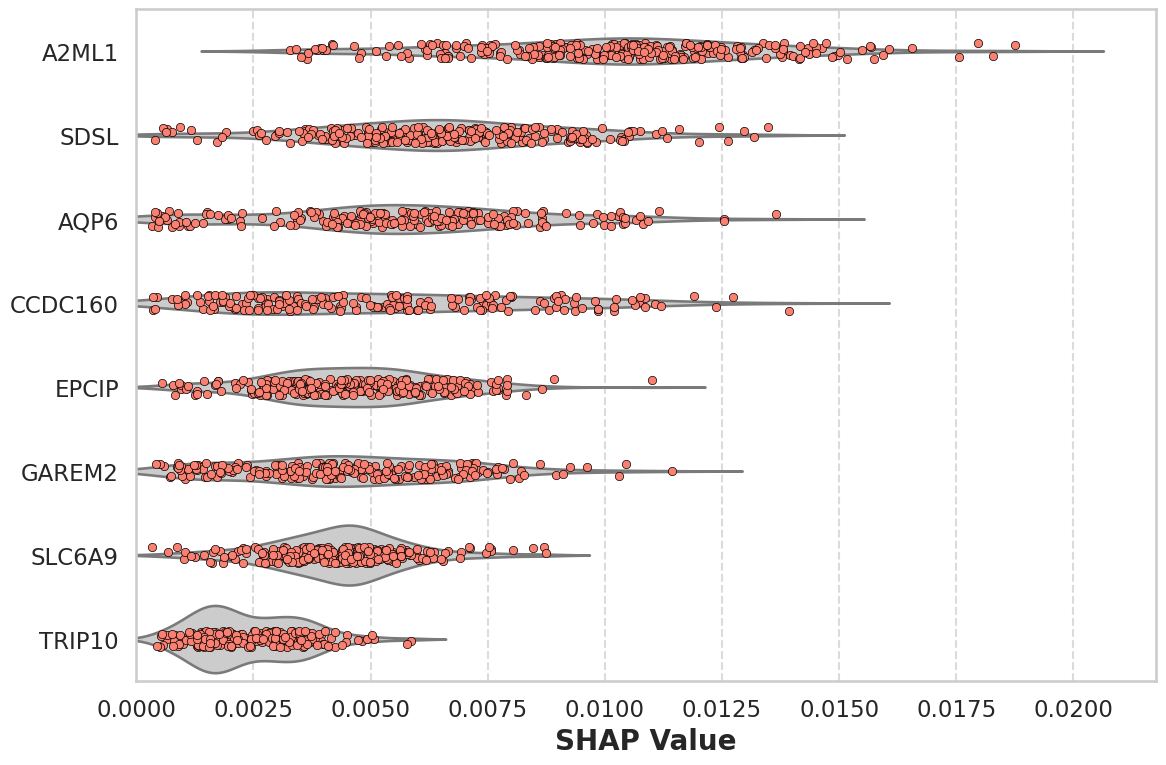

In [59]:
# Prepare the data for plotting
data = []
for sample_id, gene_values in shap_values.items():
    for gene, value in gene_values.items():
        if gene in genes_of_interest:
            data.append({'Sample': sample_id, 'Gene': genes_of_interest[gene], 'SHAP Value': value})

df = pd.DataFrame(data)

# Set the order of genes based on their names
gene_order = [genes_of_interest[gene] for gene in genes_of_interest]

# Set the style and context
sns.set(style="whitegrid", context="talk")

# Create the plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='SHAP Value', y='Gene', data=df, inner=None, color="0.8", order=gene_order)
sns.stripplot(x='SHAP Value', y='Gene', data=df, jitter=True, size=6, color='salmon', order=gene_order, edgecolor="black", linewidth=0.5)

# Customize the axes and title
plt.xlabel('SHAP Value', fontsize=20, weight='bold')
plt.ylabel('', fontsize=20, weight='bold')
# plt.title('SHAP Values for Genes of Interest', fontsize=22, weight='bold')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.xlim(left=0)  # Set x-axis to start from 0

# Improve the layout
plt.tight_layout()

# Save the plot with a higher DPI for better quality
plt.savefig('shap_values_plot_density.png', dpi=900)

# Show the plot
plt.show()

### Upsetplot of overlapping genes

/home/vmottaqi/.conda/envs/visual/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/vmottaqi/.conda/envs/visual/lib/python3.10/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

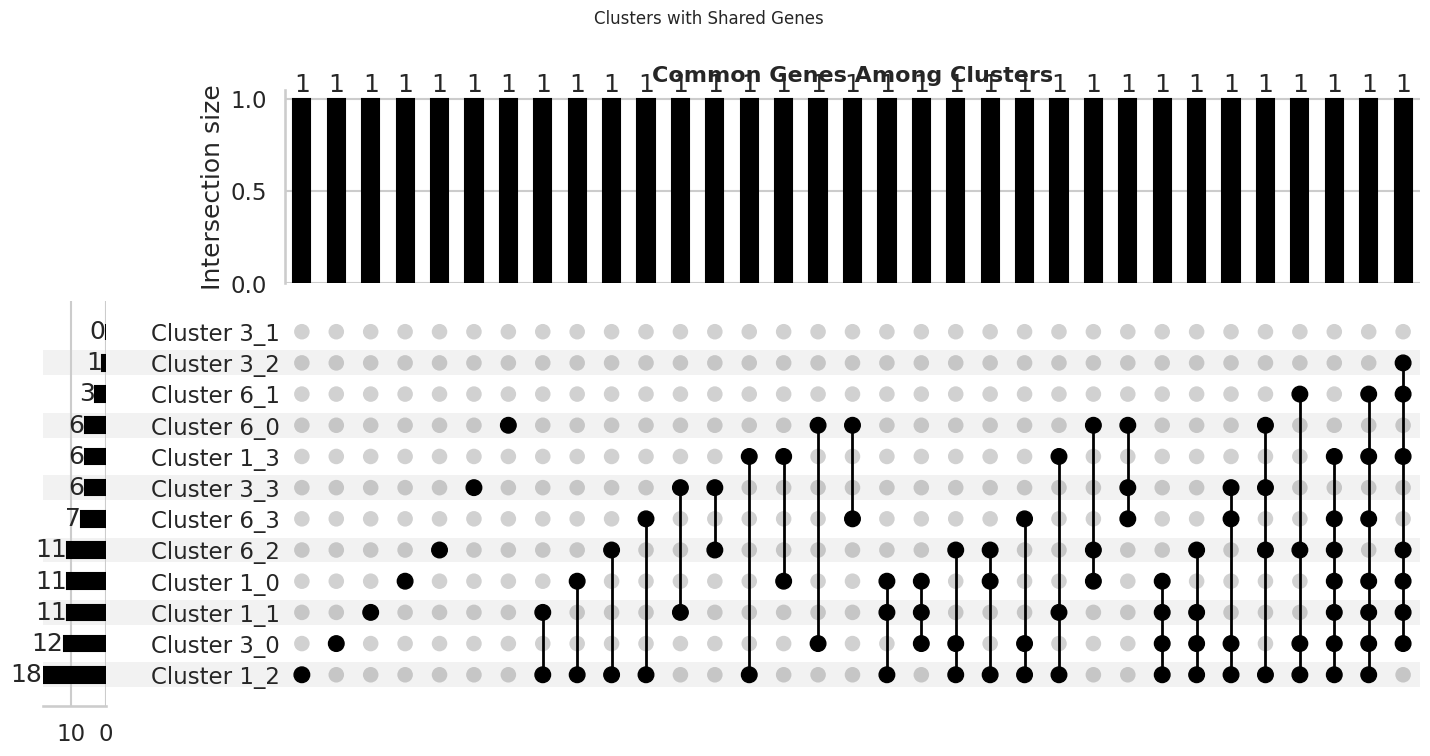

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
from upsetplot import UpSet

# Define the clusters
clusters = {
    'Cluster 3_1': [],
    'Cluster 3_2': ['ENSG00000175287'],
    'Cluster 3_0': ['ENSG00000281327', 'ENSG00000175287', 'ENSG00000166535', 'ENSG00000271714', 'ENSG00000196517', 
                    'ENSG00000205106', 'ENSG00000188783', 'ENSG00000261701', 'ENSG00000233396', 'ENSG00000139410', 
                    'ENSG00000255020', 'ENSG00000026508', 'ENSG00000205929', 'ENSG00000088836'],
    'Cluster 3_3': ['ENSG00000254746', 'ENSG00000271714', 'ENSG00000053702', 'ENSG00000122367', 'ENSG00000142731', 
                    'ENSG00000165092', 'ENSG00000286215', 'ENSG00000234028', 'ENSG00000145423'],
    'Cluster 1_3': ['ENSG00000281327', 'ENSG00000175287', 'ENSG00000166535', 'ENSG00000285230', 'ENSG00000232520', 
                    'ENSG00000205562'],
    'Cluster 1_2': ['ENSG00000249307', 'ENSG00000162631', 'ENSG00000140368', 'ENSG00000234028', 'ENSG00000026508', 
                    'ENSG00000157833', 'ENSG00000271714', 'ENSG00000205562', 'ENSG00000228058', 'ENSG00000056736', 
                    'ENSG00000188783', 'ENSG00000183196', 'ENSG00000249577', 'ENSG00000125144', 'ENSG00000188039', 
                    'ENSG00000258768', 'ENSG00000287689', 'ENSG00000125733', 'ENSG00000255020', 'ENSG00000281327', 
                    'ENSG00000166535', 'ENSG00000143772', 'ENSG00000108932', 'ENSG00000232520', 'ENSG00000233670', 
                    'ENSG00000260788', 'ENSG00000203952', 'ENSG00000287527', 'ENSG00000186439', 'ENSG00000247982', 
                    'ENSG00000196517', 'ENSG00000205929', 'ENSG00000257135'],
    'Cluster 1_1': ['ENSG00000160883', 'ENSG00000281327', 'ENSG00000175287', 'ENSG00000166535', 'ENSG00000205929', 
                    'ENSG00000053702', 'ENSG00000205562', 'ENSG00000188039', 'ENSG00000086159', 'ENSG00000135447', 
                    'ENSG00000167178', 'ENSG00000287689', 'ENSG00000261701', 'ENSG00000183196', 'ENSG00000251442', 
                    'ENSG00000196517', 'ENSG00000249577'],
    'Cluster 1_0': ['ENSG00000281327', 'ENSG00000175287', 'ENSG00000166535', 'ENSG00000096060', 'ENSG00000285230', 
                    'ENSG00000102317', 'ENSG00000188039', 'ENSG00000203952', 'ENSG00000140368', 'ENSG00000261701', 
                    'ENSG00000287689', 'ENSG00000230537', 'ENSG00000196517', 'ENSG00000177575'],
    'Cluster 6_0': ['ENSG00000138400', 'ENSG00000102317', 'ENSG00000165092', 'ENSG00000131153', 'ENSG00000230537', 
                    'ENSG00000234028', 'ENSG00000139410'],
    'Cluster 6_1': ['ENSG00000175287', 'ENSG00000166535', 'ENSG00000188783'],
    'Cluster 6_3': ['ENSG00000281327', 'ENSG00000166535', 'ENSG00000271714', 'ENSG00000233670', 'ENSG00000165092', 
                    'ENSG00000131153', 'ENSG00000026508'],
    'Cluster 6_2': ['ENSG00000175287', 'ENSG00000145882', 'ENSG00000162631', 'ENSG00000140368', 'ENSG00000234028', 
                    'ENSG00000233123', 'ENSG00000254561', 'ENSG00000188783', 'ENSG00000172935', 'ENSG00000205632', 
                    'ENSG00000102317', 'ENSG00000258768', 'ENSG00000105227', 'ENSG00000142731', 'ENSG00000042062', 
                    'ENSG00000168209', 'ENSG00000230537', 'ENSG00000255020', 'ENSG00000281327', 'ENSG00000143772', 
                    'ENSG00000137198', 'ENSG00000286710', 'ENSG00000198743', 'ENSG00000205929']
}

# Prepare the data for UpSet plot
genes_in_clusters = defaultdict(set)
for cluster, genes in clusters.items():
    for gene in genes:
        genes_in_clusters[gene].add(cluster)

# Create a DataFrame for the UpSet plot
data = defaultdict(int)
for gene, cluster_set in genes_in_clusters.items():
    data[frozenset(cluster_set)] += 1

# Create a DataFrame from the dictionary
df = pd.DataFrame(list(data.items()), columns=['clusters', 'count'])

# Expand the DataFrame to binary representation
binary_df = df['clusters'].apply(lambda x: pd.Series({cluster: (cluster in x) for cluster in clusters.keys()}))
binary_df['count'] = df['count']

# Create the UpSet plot
upset = UpSet(binary_df.set_index(list(clusters.keys())), subset_size='count', show_counts=True)
upset.plot()

# Customize the plot
plt.title('Common Genes Among Clusters', fontsize=16, weight='bold')
plt.suptitle('Clusters with Shared Genes', fontsize=12)

# Save the plot with a higher DPI for better quality
# plt.savefig('common_genes_upset_plot.png', dpi=300)

# Show the plot
plt.show()


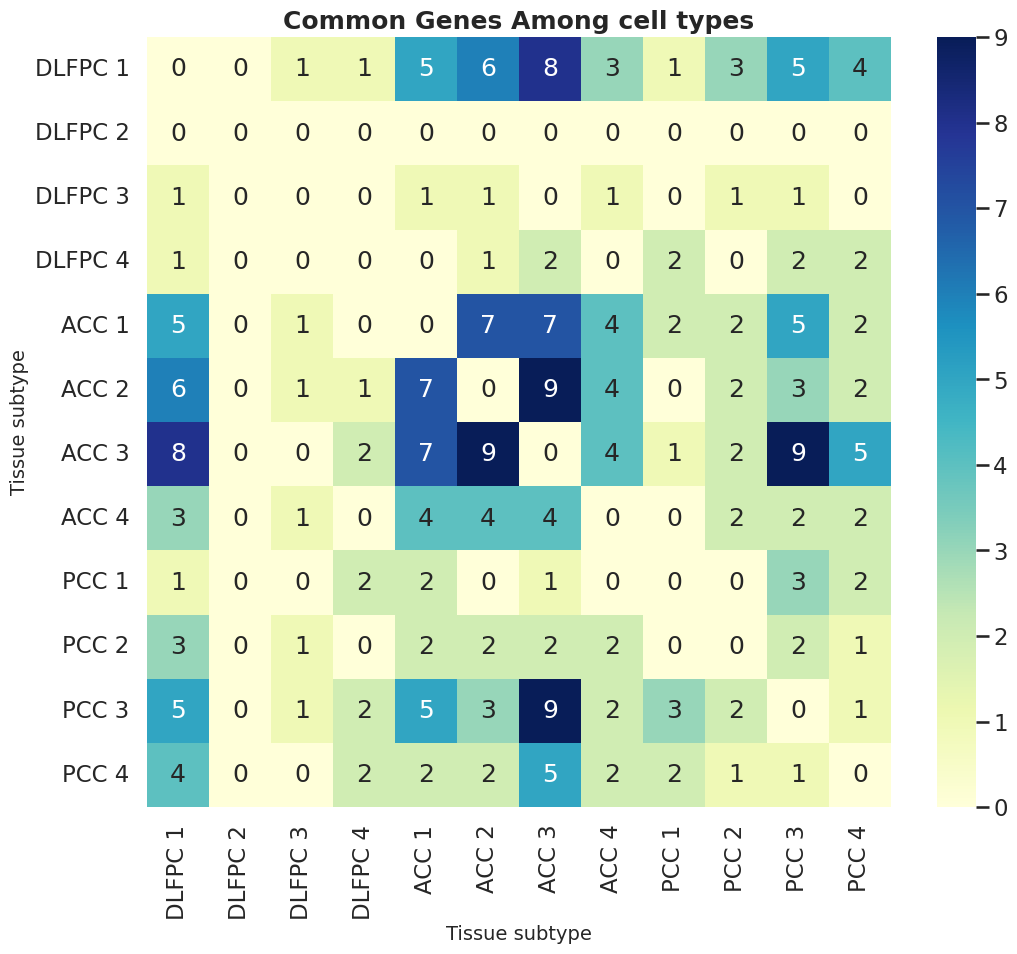

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

# Define the clusters
clusters = {
    
    
    'DLFPC 1': ['ENSG00000281327', 'ENSG00000175287', 'ENSG00000166535', 'ENSG00000271714', 'ENSG00000196517', 
                    'ENSG00000205106', 'ENSG00000188783', 'ENSG00000261701', 'ENSG00000233396', 'ENSG00000139410', 
                    'ENSG00000255020', 'ENSG00000026508', 'ENSG00000205929', 'ENSG00000088836'],
    'DLFPC 2': [],
    'DLFPC 3': ['ENSG00000175287'],
    'DLFPC 4': ['ENSG00000254746', 'ENSG00000271714', 'ENSG00000053702', 'ENSG00000122367', 'ENSG00000142731', 
                    'ENSG00000165092', 'ENSG00000286215', 'ENSG00000234028', 'ENSG00000145423'],
    'ACC 1': ['ENSG00000281327', 'ENSG00000175287', 'ENSG00000166535', 'ENSG00000096060', 'ENSG00000285230', 
                    'ENSG00000102317', 'ENSG00000188039', 'ENSG00000203952', 'ENSG00000140368', 'ENSG00000261701', 
                    'ENSG00000287689', 'ENSG00000230537', 'ENSG00000196517', 'ENSG00000177575'],
    'ACC 2': ['ENSG00000160883', 'ENSG00000281327', 'ENSG00000175287', 'ENSG00000166535', 'ENSG00000205929', 
                    'ENSG00000053702', 'ENSG00000205562', 'ENSG00000188039', 'ENSG00000086159', 'ENSG00000135447', 
                    'ENSG00000167178', 'ENSG00000287689', 'ENSG00000261701', 'ENSG00000183196', 'ENSG00000251442', 
                    'ENSG00000196517', 'ENSG00000249577'],
    
    'ACC 3': ['ENSG00000249307', 'ENSG00000162631', 'ENSG00000140368', 'ENSG00000234028', 'ENSG00000026508', 
                    'ENSG00000157833', 'ENSG00000271714', 'ENSG00000205562', 'ENSG00000228058', 'ENSG00000056736', 
                    'ENSG00000188783', 'ENSG00000183196', 'ENSG00000249577', 'ENSG00000125144', 'ENSG00000188039', 
                    'ENSG00000258768', 'ENSG00000287689', 'ENSG00000125733', 'ENSG00000255020', 'ENSG00000281327', 
                    'ENSG00000166535', 'ENSG00000143772', 'ENSG00000108932', 'ENSG00000232520', 'ENSG00000233670', 
                    'ENSG00000260788', 'ENSG00000203952', 'ENSG00000287527', 'ENSG00000186439', 'ENSG00000247982', 
                    'ENSG00000196517', 'ENSG00000205929', 'ENSG00000257135'],
    'ACC 4': ['ENSG00000281327', 'ENSG00000175287', 'ENSG00000166535', 'ENSG00000285230', 'ENSG00000232520', 
                    'ENSG00000205562'],
    
    
    'PCC 1': ['ENSG00000138400', 'ENSG00000102317', 'ENSG00000165092', 'ENSG00000131153', 'ENSG00000230537', 
                    'ENSG00000234028', 'ENSG00000139410'],
    'PCC 2': ['ENSG00000175287', 'ENSG00000166535', 'ENSG00000188783'],
    
    'PCC 3': ['ENSG00000175287', 'ENSG00000145882', 'ENSG00000162631', 'ENSG00000140368', 'ENSG00000234028', 
                    'ENSG00000233123', 'ENSG00000254561', 'ENSG00000188783', 'ENSG00000172935', 'ENSG00000205632', 
                    'ENSG00000102317', 'ENSG00000258768', 'ENSG00000105227', 'ENSG00000142731', 'ENSG00000042062', 
                    'ENSG00000168209', 'ENSG00000230537', 'ENSG00000255020', 'ENSG00000281327', 'ENSG00000143772', 
                    'ENSG00000137198', 'ENSG00000286710', 'ENSG00000198743', 'ENSG00000205929'],
    'PCC 4': ['ENSG00000281327', 'ENSG00000166535', 'ENSG00000271714', 'ENSG00000233670', 'ENSG00000165092', 
                    'ENSG00000131153', 'ENSG00000026508']
}

# Create a set for each cluster
cluster_sets = {cluster: set(genes) for cluster, genes in clusters.items()}

# Create a matrix for pairwise intersection sizes
clusters_list = list(cluster_sets.keys())
intersection_matrix = pd.DataFrame(index=clusters_list, columns=clusters_list, data=0)

for i in clusters_list:
    for j in clusters_list:
        if i != j:
            intersection_matrix.at[i, j] = len(cluster_sets[i].intersection(cluster_sets[j]))

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(intersection_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Common Genes Among cell types", fontsize=18, weight='bold')
plt.xlabel("Tissue subtype", fontsize=14)
plt.ylabel("Tissue subtype", fontsize=14)

# Save the plot with a higher DPI for better quality
plt.savefig('common_genes_clusters_heatmap.png', dpi=900)

# Show the plot
plt.show()


# Differntial gene expression analysis (R code)

In [ ]:
df = pd.read_csv("ROSMAP_counts_v10_imbalance_12k.csv", index_col=0)
df

In [ ]:
df_transposed = df.transpose()
df_transposed

In [6]:
df_transposed.to_csv("ROSMAP_v10_12K_transposed.csv")

In [9]:
df = pd.read_csv("RROSMAP_v10_12K_transposed.csv", index_col=0)
df

487_120515  182_120424  193_120424  694_120605  366_120502  \
ENSG00000000971    5.089801    3.071029    3.485700    4.746188    5.039985   
ENSG00000001617    4.342717    2.528274    2.515583    2.998472    2.967016   
ENSG00000001626   -3.111810   -1.033960   -0.808607    0.956454   -0.657477   
ENSG00000001630    0.166975    1.181832   -0.587615    0.818442    0.360927   
ENSG00000002587    3.086104    3.830174    3.816948    2.616238    2.866296   
...                     ...         ...         ...         ...         ...   
ENSG00000288033    0.617244    0.277121    0.219337   -0.455351    0.960361   
ENSG00000288048    1.545664    0.514422   -0.596076    1.506439    0.552581   
ENSG00000288049   -0.547594    0.597116   -5.247300   -0.391900   -5.109539   
ENSG00000288062    3.269352    3.664030    3.774892    3.188582    3.378009   
ENSG00000288107    2.913610    2.502630    1.800074    0.863133    1.674681   

                 52_120416  493_120515  602_120523  391_120503  188_120424  \
ENSG00000000971   6.171958    4.227721    4.735433    5.002133    3.779387   
ENSG00000001617   4.619148    3.815817    2.959653    3.752603    2.930907   
ENSG00000001626  -1.230426   -0.923760   -1.652505   -0.884199   -0.401967   
ENSG00000001630   0.300652    0.369355    0.424966    0.109062    0.016461   
ENSG00000002587   3.134017    3.068276    3.610824    3.328428    3.566589   
...                    ...         ...         ...         ...         ...   
ENSG00000288033   0.441563    1.636495    0.455403    1.896690    0.287371   
ENSG00000288048   1.028262    0.642124    0.506454    0.653549    0.269534   
ENSG00000288049  -4.070924   -0.998250   -5.140574   -5.326278    0.683973   
ENSG00000288062   2.869645    3.053631    3.667830    3.270492    4.018747   
ENSG00000288107   1.041287    1.721891    1.153163    3.045385    1.138482   

                 ...  RISK_45_rerun  RISK_46_rerun  RISK_50_rerun  \
ENSG00000000971  ...       3.749054       4.337811       4.870468   
ENSG00000001617  ...       3.661762       4.169144       3.379783   
ENSG00000001626  ...      -2.497969      -1.791506      -1.360521   
ENSG00000001630  ...       1.014853       0.318718      -0.109392   
ENSG00000002587  ...       3.323280       3.388069       3.659226   
...              ...            ...            ...            ...   
ENSG00000288033  ...       0.718532       1.523786       1.533203   
ENSG00000288048  ...      -0.470160       0.782975      -0.687184   
ENSG00000288049  ...      -6.096380      -5.904522      -5.655950   
ENSG00000288062  ...       2.773369       1.779158       2.795944   
ENSG00000288107  ...       2.186165       2.831715       1.290207   

                 RISK_51_rerun  RISK_67_rerun   RISK_81  RISK_9_rerun  \
ENSG00000000971       5.145577       3.937432  5.550509      3.559018   
ENSG00000001617       4.870652       3.174636  3.659221      3.617887   
ENSG00000001626      -2.182471      -2.217777 -1.595415     -1.589891   
ENSG00000001630      -0.078127      -0.164891  1.208007      0.602893   
ENSG00000002587       3.509164       3.346341  3.871698      3.556849   
...                        ...            ...       ...           ...   
ENSG00000288033       0.556972       1.460374  0.227905      0.874431   
ENSG00000288048       0.763065      -0.035521 -0.805499      1.085004   
ENSG00000288049      -6.118090       1.167405 -4.915610     -5.813749   
ENSG00000288062       2.972036       3.214965  4.155401      2.268562   
ENSG00000288107       1.743947       1.984574  2.047402      0.364139   

                  RISK_93   RISK_94   RISK_97  
ENSG00000000971  4.098086  4.041678  4.440045  
ENSG00000001617  2.137602  3.105495  2.956054  
ENSG00000001626 -0.871927 -0.419694 -0.603532  
ENSG00000001630 -0.736334 -0.109778  0.838868  
ENSG00000002587  4.126750  4.166972  3.341711  
...                   ...       ...       ...  
ENSG00000288033 -1.029335  0.340579  0.104856  
ENSG00000288048  0.544776  0.772254  0.56

In [10]:
df = pd.read_csv("metadata_v10_imbalance.csv", index_col=0)
df

individualID  diagnosis  tissue  race  spanish  apoe4_allele  \
specimenID                                                                  
487_120515       R9904978          0       3   1.0      2.0             0   
182_120424       R9818080          0       3   1.0      2.0             0   
193_120424       R9817161          1       3   1.0      2.0             0   
694_120605       R9817056          0       3   1.0      2.0             0   
366_120502       R9809661          1       3   1.0      2.0             1   
...                   ...        ...     ...   ...      ...           ...   
RISK_81          R4703595          0       3   1.0      2.0             0   
RISK_9_rerun     R6776130          0       3   1.0      2.0             0   
RISK_93          R6162454          1       3   1.0      2.0             0   
RISK_94          R6162454          1       6   1.0      2.0             0   
RISK_97          R1787342          0       3   1.0      2.0             0   

              sex  batch        pmi  RIN   RIN2  age_death  \
specimenID                                                   
487_120515      0      4  12.433333  6.9  47.61  72.720055   
182_120424      0      7  16.000000  8.4  70.56  81.111567   
193_120424      1      4   1.750000  7.1  50.41  80.906229   
694_120605      0      4   6.416667  7.1  50.41  87.753593   
366_120502      1      7  17.416667  7.4  54.76  90.000000   
...           ...    ...        ...  ...    ...        ...   
RISK_81         1     17  19.500000  7.3  53.29  88.796715   
RISK_9_rerun    1     17   6.500000  1.7   2.89  83.958932   
RISK_93         1     17   6.033333  7.2  51.84  90.000000   
RISK_94         1     17   6.033333  6.8  46.24  90.000000   
RISK_97         1     17   6.283333  6.3  39.69  90.000000   

              AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED  \
specimenID                                                   
487_120515                                        0.931411   
182_120424                                        0.944450   
193_120424                                        0.958718   
694_120605                                        0.960609   
366_120502                                        0.931962   
...                                                    ...   
RISK_81                                           0.980628   
RISK_9_rerun                                      0.932115   
RISK_93                                           0.949833   
RISK_94                                           0.958425   
RISK_97                                           0.964837   

              RnaSeqMetrics_PCT_INTRONIC_BASES  \
specimenID                                       
487_120515                            0.225013   
182_120424                            0.172408   
193_120424                            0.203963   
694_120605                            0.201002   
366_120502                            0.205742   
...                                        ...   
RISK_81                               0.434482   
RISK_9_rerun                          0.460919   
RISK_93                               0.420760   
RISK_94                               0.461341   
RISK_97                               0.401705   

              RnaSeqMetrics_PCT_INTERGENIC_BASES  \
specimenID                                         
487_120515                              0.058488   
182_120424                              0.041036   
193_120424                              0.048166   
694_120605                              0.045065   
366_120502                              0.048650   
...                                          ...   
RISK_81                                 0.059079   
RISK_9_rerun                            0.119986   
RISK_93                                 0.047032   
RISK_94                                 0.055424   
RISK_97                                 0.052819   

              RnaSeqMetrics_PCT_CODING_BASES  
specimenID            

## Plot (R)

In [ ]:
# Load necessary library
library(limma)

# Load the log2-transformed counts
counts_log2 <- read.csv("/workspace/ROSMAP_v10_12K_transposed.csv", row.names=1)

# Reverse the log2 transformation
counts <- 2^counts_log2


# Load metadata
metadata <- read.csv("/workspace/metadata_v10_imbalance.csv", row.names=1)

# Convert relevant metadata fields to factors
metadata$diagnosis <- factor(metadata$diagnosis, levels = c("0", "1"), labels = c("Control", "AD"))
metadata$tissue <- factor(metadata$tissue)
metadata$age_death <- as.numeric(metadata$age_death)

# Create the model matrix
mm <- model.matrix(~ diagnosis + tissue + age_death, data=metadata)


# Start the PNG device
png(filename="/workspace/mean_variance_12k.png", width=1600, height=1200, res=350)

# Use voom with plotting enabled within the png device context
v <- voom(counts, mm, plot=TRUE)

# Close the PNG device
dev.off()


## R codes using Limma-Voom

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("edgeR")

In [ ]:
### 1, only covariates

# Load necessary libraries
library(limma)
library(edgeR)

# Assume 'd' is your count data file, and 'metadata' contains covariates
# Load data
counts <- read.csv("/workspace/ROSMAP_v10_4K_transposed.csv", row.names=1)
metadata <- read.csv("/workspace/metadata_v10_imbalance.csv", row.names=1)

### Create a mean-varince figure!!

# Prepare the DGEList object
# d <- DGEList(counts=counts)

# Normalize counts (if not already normalized and log-transformed)
# d <- calcNormFactors(d)

# Include metadata factors
metadata$diagnosis <- as.numeric(metadata$diagnosis)
# metadata$diagnosis <- factor(metadata$diagnosis)
metadata$tissue <- factor(metadata$tissue)
metadata$age_death <- as.numeric(metadata$age_death)
# metadata$sex <- factor(metadata$sex)
metadata$RIN2 <- as.numeric(metadata$RIN2)

# Prepare model matrix
mm <- model.matrix(~ diagnosis + tissue + age_death + RIN2, data=metadata)

# Proceed with voom transformation and plot
# png("voom_transformation_plot.png", width = 1000, height = 800)
# v <- voom(d, mm, plot=TRUE)
# dev.off()

# Fit the linear model
fit <- lmFit(counts, mm)
head(coef(fit))

# Apply empirical Bayes statistics
fit <- eBayes(fit)

# Extract results for the specified contrast, here assuming 'diagnosis' is your main variable of interest
# Adjust the contrast according to your specific hypothesis
#contrast.matrix <- makeContrasts(ADvsControl = diagnosis, levels=mm)
contrast.matrix <- makeContrasts(ADvsControl = diagnosis, levels=colnames(coef(fit)))
contrast.matrix

fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)

print(coef(fit2))

# Save plot of the topTable results
# png("/workspace/top_genes.png", width = 1000, height = 800)
# topTable(fit2, adjust="BH", sort.by="P", number=Inf)
# dev.off()

# Save results to a CSV file
results <- topTable(fit2, adjust="BH", sort.by="P", number=Inf)
head(results, 10)

length(which(results$adj.P.Val < 0.05))

write.csv(results, "/workspace/differential_expression_results_1.csv")

# If you need to visualize results further, such as through an MA plot:
# png("/workspace/MA_plot.png", width = 1000, height = 800)
# plotMA(fit2, main="MA Plot", ylim=c(-5,5))
# dev.off()


In [ ]:
# 1
[1] "Average F-statistic: 10.5922069715699"
[1] "Average p-value for F-tests: 0.183239071147555"
# 1990 < 0.05

In [ ]:
# Extracting average F-statistic and corresponding p-value
average_f <- mean(fit2$F)
average_f_pvalue <- mean(fit2$F.p.value)

print(paste("Average F-statistic:", average_f))
print(paste("Average p-value for F-tests:", average_f_pvalue))


In [ ]:
### 2

# Load necessary libraries
library(limma)
library(edgeR)

# Assume 'd' is your count data file, and 'metadata' contains covariates
# Load data
counts <- read.csv("/workspace/ROSMAP_v10_4K_transposed.csv", row.names=1)
metadata <- read.csv("/workspace/metadata_v10_imbalance.csv", row.names=1)


# Include metadata factors
metadata$diagnosis <- as.numeric(metadata$diagnosis)
# metadata$diagnosis <- factor(metadata$diagnosis)
metadata$tissue <- factor(metadata$tissue)
metadata$age_death <- as.numeric(metadata$age_death)
metadata$sex <- factor(metadata$sex)
metadata$RIN2 <- as.numeric(metadata$RIN2)

# Prepare model matrix
mm <- model.matrix(~ diagnosis + tissue + age_death + RIN2, data=metadata)

# Fit the linear model
fit <- lmFit(counts, mm)
head(coef(fit))

# Apply empirical Bayes statistics
fit <- eBayes(fit)

#contrast.matrix <- makeContrasts(ADvsControl = diagnosis, levels=mm)
contrast.matrix <- makeContrasts(ADvsControl = diagnosis, levels=colnames(coef(fit)))
contrast.matrix

fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)

print(coef(fit2))

# Save results to a CSV file
results <- topTable(fit2, adjust="BH", sort.by="P", number=Inf)
head(results, 10)

length(which(results$adj.P.Val < 0.05))

write.csv(results, "/workspace/differential_expression_results_2.csv")



In [ ]:
[1] "Average F-statistic: 10.5922069715699"
[1] "Average p-value for F-tests: 0.183239071147555"
# 1990 < 0.05

In [ ]:
### 3

# Load necessary libraries
library(limma)
library(edgeR)

# Assume 'd' is your count data file, and 'metadata' contains covariates
# Load data
counts <- read.csv("/workspace/ROSMAP_v10_4K_transposed.csv", row.names=1)
metadata <- read.csv("/workspace/metadata_v10_imbalance.csv", row.names=1)


# Include metadata factors
metadata$diagnosis <- as.numeric(metadata$diagnosis)
#metadata$diagnosis <- factor(metadata$diagnosis, levels = c("0", "1"), labels = c("Control", "AD"))
# metadata$diagnosis <- factor(metadata$diagnosis)
metadata$tissue <- factor(metadata$tissue)

# Prepare model matrix
mm <- model.matrix(~ diagnosis + tissue, data=metadata)

# Fit the linear model
fit <- lmFit(counts, mm)
head(coef(fit))

# Apply empirical Bayes statistics
fit <- eBayes(fit)

#contrast.matrix <- makeContrasts(ADvsControl = diagnosis, levels=mm)
contrast.matrix <- makeContrasts(ADvsControl = diagnosis, levels=colnames(coef(fit)))
#contrast.matrix <- makeContrasts(ADvsControl = diagnosisAD, levels = mm)
contrast.matrix

fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)

print(coef(fit2))

# Save results to a CSV file
results <- topTable(fit2, adjust="BH", sort.by="P", number=Inf)
head(results, 10)

length(which(results$adj.P.Val < 0.05))

write.csv(results, "/workspace/differential_expression_results_3.csv")



In [ ]:
# 2476 < 0.05
[1] "Average F-statistic: 14.8403903206428"
[1] "Average p-value for F-tests: 0.141618546120562"

In [ ]:
### 4

# Load necessary libraries
library(limma)
library(edgeR)

# Assume 'd' is your count data file, and 'metadata' contains covariates
# Load data
counts <- read.csv("/workspace/ROSMAP_v10_4K_transposed.csv", row.names=1)
metadata <- read.csv("/workspace/metadata_v10_imbalance.csv", row.names=1)


# Include metadata factors
# Convert diagnosis to a factor and define the levels explicitly
metadata$diagnosis <- factor(metadata$diagnosis, levels = c("0", "1"), labels = c("Control", "AD"))



# Prepare model matrix
mm <- model.matrix(~ diagnosis, data=metadata)

# Fit the linear model
fit <- lmFit(counts, mm)
head(coef(fit))

# Apply empirical Bayes statistics
fit <- eBayes(fit)

#contrast.matrix <- makeContrasts(ADvsControl = diagnosis, levels=mm)
contrast.matrix <- makeContrasts(ADvsControl = diagnosis, levels=colnames(coef(fit)))
contrast.matrix

fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)

print(coef(fit2))

# Save results to a CSV file
results <- topTable(fit2, adjust="BH", sort.by="P", number=Inf)
head(results, 10)

length(which(results$adj.P.Val < 0.05))

write.csv(results, "/workspace/differential_expression_results_4.csv")



In [ ]:
# 1826
[1] "Average F-statistic: 10.2356878732432"
[1] "Average p-value for F-tests: 0.199660145628771"

In [ ]:
# 5 on 12k features

# Load necessary libraries
library(limma)
library(edgeR)

# Assume 'd' is your count data file, and 'metadata' contains covariates
# Load data
counts <- read.csv("/workspace/ROSMAP_v10_12K_transposed.csv", row.names=1)
metadata <- read.csv("/workspace/metadata_v10_imbalance.csv", row.names=1)


# Include metadata factors
metadata$diagnosis <- as.numeric(metadata$diagnosis)
#metadata$diagnosis <- factor(metadata$diagnosis, levels = c("0", "1"), labels = c("Control", "AD"))
# metadata$diagnosis <- factor(metadata$diagnosis)
metadata$tissue <- factor(metadata$tissue)

# Prepare model matrix
mm <- model.matrix(~ diagnosis + tissue, data=metadata)

# Fit the linear model
fit <- lmFit(counts, mm)
head(coef(fit))

# Apply empirical Bayes statistics
fit <- eBayes(fit)

#contrast.matrix <- makeContrasts(ADvsControl = diagnosis, levels=mm)
contrast.matrix <- makeContrasts(ADvsControl = diagnosis, levels=mm)
#contrast.matrix <- makeContrasts(ADvsControl = diagnosisAD, levels = mm)
contrast.matrix

fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)

print(coef(fit2))

# Save results to a CSV file
# results <- topTable(fit2, adjust="BH", sort.by="P", number=Inf)
results <- topTable(fit2, adjust="bonferroni", sort.by="P", number=Inf)
head(results, 10)

length(which(results$adj.P.Val < 0.05))

write.csv(results, "/workspace/differential_expression_results_5.csv")



# Start the PNG device
# png(filename="/workspace/volcano_plot.png", width=800, height=600)

# # Use voom with plotting enabled within the png device context
# volcanoplot(fit2)
# # Close the PNG device
# dev.off()



# Extracting average F-statistic and corresponding p-value
average_f <- mean(fit2$F)
average_f_pvalue <- mean(fit2$F.p.value)

print(paste("Average F-statistic:", average_f))
print(paste("Average p-value for F-tests:", average_f_pvalue))


In [ ]:
# 7000
[1] "Average F-statistic: 14.2615350176539"
[1] "Average p-value for F-tests: 0.143188128807352"

In [ ]:
# 6 on 4k features

# Load necessary libraries
library(limma)
library(edgeR)

# Assume 'd' is your count data file, and 'metadata' contains covariates
# Load data
counts <- read.csv("/workspace/ROSMAP_v10_4K_transposed.csv", row.names=1)
metadata <- read.csv("/workspace/metadata_v10_imbalance.csv", row.names=1)


# Include metadata factors
metadata$diagnosis <- as.numeric(metadata$diagnosis)
#metadata$diagnosis <- factor(metadata$diagnosis, levels = c("0", "1"), labels = c("Control", "AD"))
# metadata$diagnosis <- factor(metadata$diagnosis)
metadata$tissue <- factor(metadata$tissue)

# Prepare model matrix
mm <- model.matrix(~ diagnosis + tissue, data=metadata)

# Fit the linear model
fit <- lmFit(counts, mm)
head(coef(fit))

# Apply empirical Bayes statistics
fit <- eBayes(fit)

#contrast.matrix <- makeContrasts(ADvsControl = diagnosis, levels=mm)
contrast.matrix <- makeContrasts(ADvsControl = diagnosis, levels=mm)
#contrast.matrix <- makeContrasts(ADvsControl = diagnosisAD, levels = mm)
contrast.matrix

fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)

print(coef(fit2))

# Save results to a CSV file
# results <- topTable(fit2, adjust="BH", sort.by="P", number=Inf)
results <- topTable(fit2, adjust="bonferroni", sort.by="P", number=Inf)
head(results, 10)

length(which(results$adj.P.Val < 0.05))

write.csv(results, "/workspace/differential_expression_results_6.csv")



# Start the PNG device
png(filename="/workspace/volcano_plot_6_4k.png", width=2000, height=1600, res=500)

# Use voom with plotting enabled within the png device context
volcanoplot(fit2)
# Close the PNG device
dev.off()



# Extracting average F-statistic and corresponding p-value
average_f <- mean(fit2$F)
average_f_pvalue <- mean(fit2$F.p.value)

print(paste("Average F-statistic:", average_f))
print(paste("Average p-value for F-tests:", average_f_pvalue))


In [ ]:
# 1041
[1] "Average F-statistic: 14.8403903206428"
[1] "Average p-value for F-tests: 0.141618546120562"

## Pathway analysis using R

In [ ]:
# Install BiocManager if it's not already installed
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

# Install clusterProfiler and enrichplot from Bioconductor
BiocManager::install("clusterProfiler")
BiocManager::install("enrichplot")

# Load the libraries
library(clusterProfiler)
library(enrichplot)


In [ ]:
significant_genes_map <- read.table('/workspace/shap_genes_one_sample.txt', header = TRUE, sep = "\t", stringsAsFactors = FALSE)

# View the first few rows of the dataset
head(significant_genes_map)

In [ ]:
ego <- enrichGO(gene          = significant_genes_map$ENTREZID,
                OrgDb         = "org.Rn.eg.db",
                ont           = "CC",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05,
                qvalueCutoff  = 0.05,
                readable      = TRUE)

In [ ]:
head(ego)

In [ ]:
library(enrichplot)
barplot(ego, showCategory=5) 

In [ ]:
dotplot(ego)

In [ ]:
ego <- enrichGO(gene          = significant_genes_map$ENTREZID,
                universe      = background_genes_map$ENTREZID,
                OrgDb         = "org.Rn.eg.db",
                ont           = "MF",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05,
                qvalueCutoff  = 0.05,
                readable      = TRUE)
head(ego)

In [ ]:
png(filename = "enrichGO_barplot.png", width = 1920, height = 1080, res = 600)
barplot(ego, showCategory = 5)
dev.off()

In [ ]:
dotplot(ego)

In [ ]:
ego <- enrichGO(gene          = significant_genes_map$ENTREZID,
                universe      = background_genes_map$ENTREZID,
                OrgDb         = "org.Rn.eg.db",
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05,
                qvalueCutoff  = 0.05,
                readable      = TRUE)
head(ego)

In [ ]:
library(enrichplot)
barplot(ego, showCategory=5) 

## analysis of DEG genes

In [18]:
l = []
for cluster, genes in common_genes_by_tissue.items():
    print(f"Cluster {cluster}:")
    if genes:  # Check if the list is not empty
        for gene in genes:
            l.append(str(gene))
            print(gene)
print()
print(len(l))
print(l)

Cluster 3_1:
Cluster 3_2:
ENSG00000175287
Cluster 3_0:
ENSG00000281327
ENSG00000175287
ENSG00000166535
ENSG00000271714
ENSG00000196517
ENSG00000205106
ENSG00000188783
ENSG00000261701
ENSG00000233396
ENSG00000139410
ENSG00000255020
ENSG00000026508
ENSG00000205929
ENSG00000088836
Cluster 3_3:
ENSG00000254746
ENSG00000271714
ENSG00000053702
ENSG00000122367
ENSG00000142731
ENSG00000165092
ENSG00000286215
ENSG00000234028
ENSG00000145423
Cluster 1_3:
ENSG00000281327
ENSG00000175287
ENSG00000166535
ENSG00000285230
ENSG00000232520
ENSG00000205562
Cluster 1_2:
ENSG00000249307
ENSG00000162631
ENSG00000140368
ENSG00000234028
ENSG00000026508
ENSG00000157833
ENSG00000271714
ENSG00000205562
ENSG00000228058
ENSG00000056736
ENSG00000188783
ENSG00000183196
ENSG00000249577
ENSG00000125144
ENSG00000188039
ENSG00000258768
ENSG00000287689
ENSG00000125733
ENSG00000255020
ENSG00000281327
ENSG00000166535
ENSG00000143772
ENSG00000108932
ENSG00000232520
ENSG00000233670
ENSG00000260788
ENSG00000203952
ENSG000002

In [19]:
print(len(set(l)))
print(set(l))

69
{'ENSG00000175287', 'ENSG00000145882', 'ENSG00000249307', 'ENSG00000285230', 'ENSG00000162631', 'ENSG00000140368', 'ENSG00000286215', 'ENSG00000234028', 'ENSG00000139410', 'ENSG00000233123', 'ENSG00000026508', 'ENSG00000157833', 'ENSG00000177575', 'ENSG00000160883', 'ENSG00000271714', 'ENSG00000205562', 'ENSG00000228058', 'ENSG00000086159', 'ENSG00000254561', 'ENSG00000056736', 'ENSG00000188783', 'ENSG00000261701', 'ENSG00000183196', 'ENSG00000251442', 'ENSG00000172935', 'ENSG00000088836', 'ENSG00000145423', 'ENSG00000233396', 'ENSG00000249577', 'ENSG00000125144', 'ENSG00000205632', 'ENSG00000138400', 'ENSG00000102317', 'ENSG00000205106', 'ENSG00000188039', 'ENSG00000142731', 'ENSG00000165092', 'ENSG00000258768', 'ENSG00000287689', 'ENSG00000135447', 'ENSG00000105227', 'ENSG00000042062', 'ENSG00000131153', 'ENSG00000125733', 'ENSG00000230537', 'ENSG00000168209', 'ENSG00000255020', 'ENSG00000281327', 'ENSG00000254746', 'ENSG00000166535', 'ENSG00000143772', 'ENSG00000108932', 'ENSG000

In [10]:
l = ['ENSG00000175287', 'ENSG00000281327', 'ENSG00000175287', 'ENSG00000166535', 'ENSG00000271714', 'ENSG00000196517', 'ENSG00000205106', 'ENSG00000188783', 'ENSG00000261701', 'ENSG00000233396', 'ENSG00000139410', 'ENSG00000255020', 'ENSG00000026508', 'ENSG00000205929', 'ENSG00000088836', 'ENSG00000254746', 'ENSG00000271714', 'ENSG00000053702', 'ENSG00000122367', 'ENSG00000142731', 'ENSG00000165092', 'ENSG00000286215', 'ENSG00000234028', 'ENSG00000145423', 'ENSG00000281327', 'ENSG00000175287', 'ENSG00000166535', 'ENSG00000285230', 'ENSG00000232520', 'ENSG00000205562', 'ENSG00000249307', 'ENSG00000162631', 'ENSG00000140368', 'ENSG00000234028', 'ENSG00000026508', 'ENSG00000157833', 'ENSG00000271714', 'ENSG00000205562', 'ENSG00000228058', 'ENSG00000056736', 'ENSG00000188783', 'ENSG00000183196', 'ENSG00000249577', 'ENSG00000125144', 'ENSG00000188039', 'ENSG00000258768', 'ENSG00000287689', 'ENSG00000125733', 'ENSG00000255020', 'ENSG00000281327', 'ENSG00000166535', 'ENSG00000143772', 'ENSG00000108932', 'ENSG00000232520', 'ENSG00000233670', 'ENSG00000260788', 'ENSG00000203952', 'ENSG00000287527', 'ENSG00000186439', 'ENSG00000247982', 'ENSG00000196517', 'ENSG00000205929', 'ENSG00000257135', 'ENSG00000160883', 'ENSG00000281327', 'ENSG00000175287', 'ENSG00000166535', 'ENSG00000205929', 'ENSG00000053702', 'ENSG00000205562', 'ENSG00000188039', 'ENSG00000086159', 'ENSG00000135447', 'ENSG00000167178', 'ENSG00000287689', 'ENSG00000261701', 'ENSG00000183196', 'ENSG00000251442', 'ENSG00000196517', 'ENSG00000249577', 'ENSG00000281327', 'ENSG00000175287', 'ENSG00000166535', 'ENSG00000096060', 'ENSG00000285230', 'ENSG00000102317', 'ENSG00000188039', 'ENSG00000203952', 'ENSG00000140368', 'ENSG00000261701', 'ENSG00000287689', 'ENSG00000230537', 'ENSG00000196517', 'ENSG00000177575', 'ENSG00000138400', 'ENSG00000102317', 'ENSG00000165092', 'ENSG00000131153', 'ENSG00000230537', 'ENSG00000234028', 'ENSG00000139410', 'ENSG00000175287', 'ENSG00000166535', 'ENSG00000188783', 'ENSG00000281327', 'ENSG00000166535', 'ENSG00000271714', 'ENSG00000233670', 'ENSG00000165092', 'ENSG00000131153', 'ENSG00000026508', 'ENSG00000175287', 'ENSG00000145882', 'ENSG00000162631', 'ENSG00000140368', 'ENSG00000234028', 'ENSG00000233123', 'ENSG00000254561', 'ENSG00000188783', 'ENSG00000172935', 'ENSG00000205632', 'ENSG00000102317', 'ENSG00000258768', 'ENSG00000105227', 'ENSG00000142731', 'ENSG00000042062', 'ENSG00000168209', 'ENSG00000230537', 'ENSG00000255020', 'ENSG00000281327', 'ENSG00000143772', 'ENSG00000137198', 'ENSG00000286710', 'ENSG00000198743', 'ENSG00000205929']

In [12]:
df = pd.read_csv("./differential_expression_results_6.csv")
df

Gene_name     logFC   AveExpr          t       P.Value  \
0     ENSG00000166535  0.643080  3.555347  13.395957  1.268430e-37   
1     ENSG00000196517  0.451140  4.337574  13.115874  2.968892e-36   
2     ENSG00000228058  0.856561  1.383844  12.123336  1.453485e-31   
3     ENSG00000157833  0.596642  5.750073  12.103160  1.798981e-31   
4     ENSG00000188783  0.508738  5.499163  11.696316  1.254850e-29   
...               ...       ...       ...        ...           ...   
3994  ENSG00000263426 -0.000448  4.574855  -0.008308  9.933734e-01   
3995  ENSG00000214140 -0.000265  2.341244  -0.008266  9.934065e-01   
3996  ENSG00000154263 -0.000136  3.229344  -0.004491  9.964175e-01   
3997  ENSG00000272733 -0.000124  0.117919  -0.002797  9.977689e-01   
3998  ENSG00000075461  0.000081  4.796872   0.002228  9.982226e-01   

         adj.P.Val          B  
0     5.072452e-34  74.530818  
1     1.187260e-32  71.427092  
2     5.812488e-28  60.801535  
3     7.194123e-28  60.591780  
4     5.018146e-26  56.417286  
...            ...        ...  
3994  1.000000e+00  -6.927646  
3995  1.000000e+00  -6.927646  
3996  1.000000e+00  -6.927670  
3997  1.000000e+00  -6.927676  
3998  1.000000e+00  -6.927678  

[3999 rows x 7 columns]

In [13]:
filtered_df = df[df['adj.P.Val'] < 0.05]
filtered_df

Gene_name     logFC   AveExpr          t       P.Value  \
0     ENSG00000166535  0.643080  3.555347  13.395957  1.268430e-37   
1     ENSG00000196517  0.451140  4.337574  13.115874  2.968892e-36   
2     ENSG00000228058  0.856561  1.383844  12.123336  1.453485e-31   
3     ENSG00000157833  0.596642  5.750073  12.103160  1.798981e-31   
4     ENSG00000188783  0.508738  5.499163  11.696316  1.254850e-29   
...               ...       ...       ...        ...           ...   
1036  ENSG00000272597  0.229595  0.464622   4.397950  1.215645e-05   
1037  ENSG00000113389 -0.268093  0.331981  -4.397784  1.216555e-05   
1038  ENSG00000185267 -0.228872 -0.241825  -4.397482  1.218219e-05   
1039  ENSG00000136883 -0.230629  1.123750  -4.394608  1.234119e-05   
1040  ENSG00000176769 -0.179100  2.407645  -4.394150  1.236674e-05   

         adj.P.Val          B  
0     5.072452e-34  74.530818  
1     1.187260e-32  71.427092  
2     5.812488e-28  60.801535  
3     7.194123e-28  60.591780  
4     5.018146e-26  56.417286  
...            ...        ...  
1036  4.861364e-02   2.565465  
1037  4.865005e-02   2.564757  
1038  4.871657e-02   2.563463  
1039  4.935243e-02   2.551188  
1040  4.945460e-02   2.549230  

[1041 rows x 7 columns]

In [23]:
gene_list = ['ENSG00000175287', 'ENSG00000145882', 'ENSG00000249307', 'ENSG00000285230', 'ENSG00000162631', 'ENSG00000140368', 'ENSG00000286215', 'ENSG00000234028', 'ENSG00000139410', 'ENSG00000233123', 'ENSG00000026508', 'ENSG00000157833', 'ENSG00000177575', 'ENSG00000160883', 'ENSG00000271714', 'ENSG00000205562', 'ENSG00000228058', 'ENSG00000086159', 'ENSG00000254561', 'ENSG00000056736', 'ENSG00000188783', 'ENSG00000261701', 'ENSG00000183196', 'ENSG00000251442', 'ENSG00000172935', 'ENSG00000088836', 'ENSG00000145423', 'ENSG00000233396', 'ENSG00000249577', 'ENSG00000125144', 'ENSG00000205632', 'ENSG00000138400', 'ENSG00000102317', 'ENSG00000205106', 'ENSG00000188039', 'ENSG00000142731', 'ENSG00000165092', 'ENSG00000258768', 'ENSG00000287689', 'ENSG00000135447', 'ENSG00000105227', 'ENSG00000042062', 'ENSG00000131153', 'ENSG00000125733', 'ENSG00000230537', 'ENSG00000168209', 'ENSG00000255020', 'ENSG00000281327', 'ENSG00000254746', 'ENSG00000166535', 'ENSG00000143772', 'ENSG00000108932', 'ENSG00000232520', 'ENSG00000096060', 'ENSG00000137198', 'ENSG00000233670', 'ENSG00000053702', 'ENSG00000260788', 'ENSG00000122367', 'ENSG00000203952', 'ENSG00000167178', 'ENSG00000287527', 'ENSG00000286710', 'ENSG00000198743', 'ENSG00000186439', 'ENSG00000247982', 'ENSG00000196517', 'ENSG00000205929', 'ENSG00000257135']
# Check for presence of genes in the list within the filtered DataFrame
filtered_genes = filtered_df[filtered_df['Gene_name'].isin(gene_list)]
print(len(filtered_genes))
# Count how many genes have positive and negative logFC
positive_logFC_count = filtered_genes[filtered_genes['logFC'] > 0].shape[0]
negative_logFC_count = filtered_genes[filtered_genes['logFC'] < 0].shape[0]


print(f"Number of genes with positive logFC: {positive_logFC_count}")
print(f"Number of genes with negative logFC: {negative_logFC_count}")

64
Number of genes with positive logFC: 42
Number of genes with negative logFC: 22


In [22]:
print(len(gene_list))

69


## Volcano plot (Python)

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("differential_expression_results_6.csv")
df

Gene_name     logFC   AveExpr          t       P.Value  \
0     ENSG00000166535  0.643080  3.555347  13.395957  1.268430e-37   
1     ENSG00000196517  0.451140  4.337574  13.115874  2.968892e-36   
2     ENSG00000228058  0.856561  1.383844  12.123336  1.453485e-31   
3     ENSG00000157833  0.596642  5.750073  12.103160  1.798981e-31   
4     ENSG00000188783  0.508738  5.499163  11.696316  1.254850e-29   
...               ...       ...       ...        ...           ...   
3994  ENSG00000263426 -0.000448  4.574855  -0.008308  9.933734e-01   
3995  ENSG00000214140 -0.000265  2.341244  -0.008266  9.934065e-01   
3996  ENSG00000154263 -0.000136  3.229344  -0.004491  9.964175e-01   
3997  ENSG00000272733 -0.000124  0.117919  -0.002797  9.977689e-01   
3998  ENSG00000075461  0.000081  4.796872   0.002228  9.982226e-01   

         adj.P.Val          B  
0     5.072452e-34  74.530818  
1     1.187260e-32  71.427092  
2     5.812488e-28  60.801535  
3     7.194123e-28  60.591780  
4     5.018146e-26  56.417286  
...            ...        ...  
3994  1.000000e+00  -6.927646  
3995  1.000000e+00  -6.927646  
3996  1.000000e+00  -6.927670  
3997  1.000000e+00  -6.927676  
3998  1.000000e+00  -6.927678  

[3999 rows x 7 columns]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("differential_expression_results_6.csv")

# Calculate -log10 of p-values
df['neg_log10_p_value'] = -np.log10(df['adj.P.Val'])

# Define thresholds for significant logFC and p-values
logfc_threshold = 1.0
pvalue_threshold = 0.05

# Calculate the y-value for the horizontal line (p-value threshold)
pvalue_line = -np.log10(pvalue_threshold)

# Define significance based on thresholds
significant = (df['logFC'].abs() > logfc_threshold) & (df['adj.P.Val'] < pvalue_threshold)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['logFC'], df['neg_log10_p_value'], color='grey', label='Not Significant')
plt.scatter(df['logFC'][significant], df['neg_log10_p_value'][significant], color='red', label='Significant')

# Add a horizontal line at p-value = 0.05
plt.axhline(pvalue_line, color='blue', linestyle='--', linewidth=0.5, label=f'p-value = {pvalue_threshold}')

# Also, add vertical lines for log fold change threshold
plt.axvline(-logfc_threshold, color='green', linestyle='--', linewidth=0.5)
plt.axvline(logfc_threshold, color='green', linestyle='--', linewidth=0.5)

plt.title('Volcano Plot')
plt.xlabel('Log Fold Change')
plt.ylabel('-Log10(p-value)')
plt.legend()
plt.tight_layout()
plt.show()

plt.savefig('volcano_plot.png', dpi=500)  # Increase dpi for higher resolution


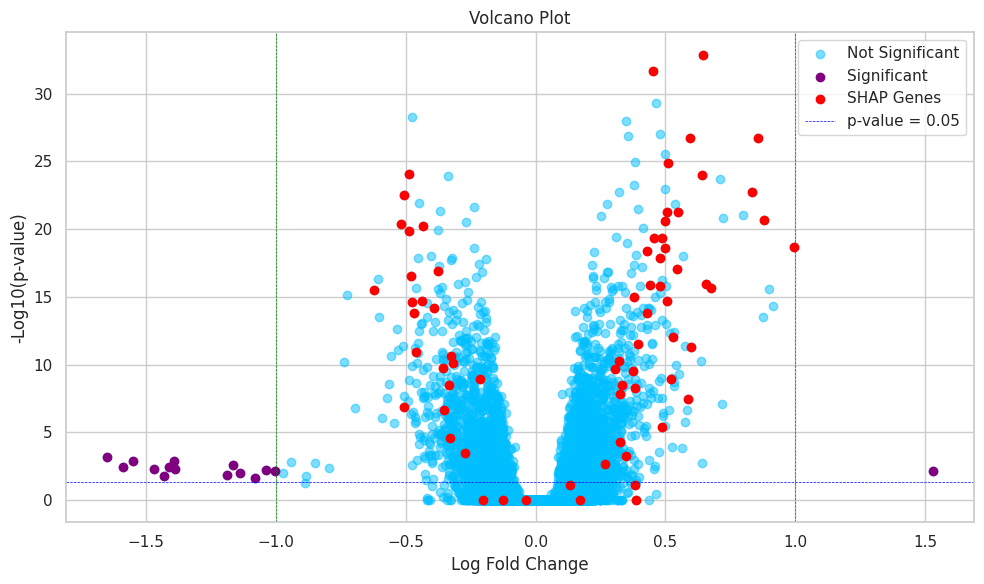

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("differential_expression_results_5.csv")


# Let's assume df has columns 'logFC', 'P.Value', 'Gene_name'
df['neg_log10_p_value'] = -np.log10(df['adj.P.Val'])

# Highlighted genes
highlight_genes = ['ENSG00000140368', 'ENSG00000251442', 'ENSG00000228058', 'ENSG00000108932', 'ENSG00000261701', 'ENSG00000143772', 'ENSG00000285230', 'ENSG00000162631', 'ENSG00000166535', 'ENSG00000142731', 'ENSG00000258768', 'ENSG00000286215', 'ENSG00000122367', 'ENSG00000287689', 'ENSG00000160883', 'ENSG00000205106', 'ENSG00000281327', 'ENSG00000247982', 'ENSG00000172935', 'ENSG00000026508', 'ENSG00000131153', 'ENSG00000145882', 'ENSG00000198743', 'ENSG00000137198', 'ENSG00000233396', 'ENSG00000232520', 'ENSG00000234028', 'ENSG00000145423', 'ENSG00000125733', 'ENSG00000230537', 'ENSG00000205929', 'ENSG00000233670', 'ENSG00000203952', 'ENSG00000168209', 'ENSG00000255020', 'ENSG00000249307', 'ENSG00000102317', 'ENSG00000205632', 'ENSG00000183196', 'ENSG00000167178', 'ENSG00000096060', 'ENSG00000254561', 'ENSG00000249577', 'ENSG00000254746', 'ENSG00000260788', 'ENSG00000165092', 'ENSG00000105227', 'ENSG00000138400', 'ENSG00000271714', 'ENSG00000257135', 'ENSG00000157833', 'ENSG00000125144', 'ENSG00000135447', 'ENSG00000175287', 'ENSG00000188039', 'ENSG00000186439', 'ENSG00000056736', 'ENSG00000188783', 'ENSG00000177575', 'ENSG00000042062', 'ENSG00000286710', 'ENSG00000196517', 'ENSG00000233123', 'ENSG00000086159', 'ENSG00000088836', 'ENSG00000053702', 'ENSG00000139410', 'ENSG00000205562', 'ENSG00000287527']

# Define thresholds for significant logFC and p-values
logfc_threshold = 1.0
pvalue_threshold = 0.05

# Calculate the y-value for the horizontal line (p-value threshold)
pvalue_line = -np.log10(pvalue_threshold)

# Define significance based on thresholds
significant = (df['logFC'].abs() > logfc_threshold) & (df['adj.P.Val'] < pvalue_threshold)

# Plotting
plt.figure(figsize=(10, 6))
# Plot all genes
# Plot all genes
plt.scatter(df['logFC'], df['neg_log10_p_value'], color='deepskyblue', label='Not Significant', alpha=0.5)  # Added alpha for better visibility

# Plot significant genes
plt.scatter(df['logFC'][significant], df['neg_log10_p_value'][significant], color='purple', label='Significant')

# Highlight specific genes
highlighted = df['Gene_name'].isin(highlight_genes)
plt.scatter(df['logFC'][highlighted], df['neg_log10_p_value'][highlighted], color='red', label='SHAP Genes')  # Increased size for visibility
# Add a horizontal line at p-value = 0.05
plt.axhline(pvalue_line, color='blue', linestyle='--', linewidth=0.5, label=f'p-value = {pvalue_threshold}')
plt.axvline(-logfc_threshold, color='green', linestyle='--', linewidth=0.5)
plt.axvline(logfc_threshold, color='green', linestyle='--', linewidth=0.5)

plt.title('Volcano Plot')
plt.xlabel('Log Fold Change')
plt.ylabel('-Log10(p-value)')
plt.legend()
plt.tight_layout()

# Save the plot as a high-quality image
plt.savefig('volcano_plot_12k_shap.png', dpi=600)  # Increase dpi for higher resolution

plt.show()

In [30]:
highlight_genes = ['ENSG00000140368', 'ENSG00000251442', 'ENSG00000228058', 'ENSG00000108932', 'ENSG00000261701', 'ENSG00000143772', 'ENSG00000285230', 'ENSG00000162631', 'ENSG00000166535', 'ENSG00000142731', 'ENSG00000258768', 'ENSG00000286215', 'ENSG00000122367', 'ENSG00000287689', 'ENSG00000160883', 'ENSG00000205106', 'ENSG00000281327', 'ENSG00000247982', 'ENSG00000172935', 'ENSG00000026508', 'ENSG00000131153', 'ENSG00000145882', 'ENSG00000198743', 'ENSG00000137198', 'ENSG00000233396', 'ENSG00000232520', 'ENSG00000234028', 'ENSG00000145423', 'ENSG00000125733', 'ENSG00000230537', 'ENSG00000205929', 'ENSG00000233670', 'ENSG00000203952', 'ENSG00000168209', 'ENSG00000255020', 'ENSG00000249307', 'ENSG00000102317', 'ENSG00000205632', 'ENSG00000183196', 'ENSG00000167178', 'ENSG00000096060', 'ENSG00000254561', 'ENSG00000249577', 'ENSG00000254746', 'ENSG00000260788', 'ENSG00000165092', 'ENSG00000105227', 'ENSG00000138400', 'ENSG00000271714', 'ENSG00000257135', 'ENSG00000157833', 'ENSG00000125144', 'ENSG00000135447', 'ENSG00000175287', 'ENSG00000188039', 'ENSG00000186439', 'ENSG00000056736', 'ENSG00000188783', 'ENSG00000177575', 'ENSG00000042062', 'ENSG00000286710', 'ENSG00000196517', 'ENSG00000233123', 'ENSG00000086159', 'ENSG00000088836', 'ENSG00000053702', 'ENSG00000139410', 'ENSG00000205562', 'ENSG00000287527']
for i in highlight_genes:
    print(i)

ENSG00000140368
ENSG00000251442
ENSG00000228058
ENSG00000108932
ENSG00000261701
ENSG00000143772
ENSG00000285230
ENSG00000162631
ENSG00000166535
ENSG00000142731
ENSG00000258768
ENSG00000286215
ENSG00000122367
ENSG00000287689
ENSG00000160883
ENSG00000205106
ENSG00000281327
ENSG00000247982
ENSG00000172935
ENSG00000026508
ENSG00000131153
ENSG00000145882
ENSG00000198743
ENSG00000137198
ENSG00000233396
ENSG00000232520
ENSG00000234028
ENSG00000145423
ENSG00000125733
ENSG00000230537
ENSG00000205929
ENSG00000233670
ENSG00000203952
ENSG00000168209
ENSG00000255020
ENSG00000249307
ENSG00000102317
ENSG00000205632
ENSG00000183196
ENSG00000167178
ENSG00000096060
ENSG00000254561
ENSG00000249577
ENSG00000254746
ENSG00000260788
ENSG00000165092
ENSG00000105227
ENSG00000138400
ENSG00000271714
ENSG00000257135
ENSG00000157833
ENSG00000125144
ENSG00000135447
ENSG00000175287
ENSG00000188039
ENSG00000186439
ENSG00000056736
ENSG00000188783
ENSG00000177575
ENSG00000042062
ENSG00000286710
ENSG00000196517
ENSG0000

## Pathway analysis charts (python)

In [39]:
import pandas as pd
file_path = 'shap_one_sample/gene_ontology.txt'  # Update this to the path of your .txt file
df = pd.read_csv(file_path, delimiter='\t')  # Assuming tab-delimited file
df_filtered = df[df['PValue'] < 0.05]
df_filtered

Category                                               Term  \
0   GOTERM_MF_DIRECT                        GO:0005178~integrin binding   
1   GOTERM_MF_DIRECT                     GO:0031720~haptoglobin binding   
2   GOTERM_MF_DIRECT                    GO:0043177~organic acid binding   
3   GOTERM_MF_DIRECT                     GO:0044325~ion channel binding   
4   GOTERM_MF_DIRECT                            GO:0020037~heme binding   
5   GOTERM_MF_DIRECT             GO:0005344~oxygen transporter activity   
6   GOTERM_MF_DIRECT                            GO:0050661~NADP binding   
7   GOTERM_MF_DIRECT      GO:0004794~L-threonine ammonia-lyase activity   
8   GOTERM_MF_DIRECT  GO:0015166~polyol transmembrane transporter ac...   
9   GOTERM_MF_DIRECT                         GO:0008201~heparin binding   
10  GOTERM_MF_DIRECT             GO:0030215~semaphorin receptor binding   
11  GOTERM_MF_DIRECT  GO:0005365~myo-inositol transmembrane transpor...   
12  GOTERM_MF_DIRECT            GO:0034632~retinol transporter activity   
13  GOTERM_MF_DIRECT         GO:0003941~L-serine ammonia-lyase activity   
14  GOTERM_MF_DIRECT           GO:0031708~endothelin B receptor binding   
15  GOTERM_MF_DIRECT          GO:0004517~nitric-oxide synthase activity   
16  GOTERM_MF_DIRECT               GO:0005539~glycosaminoglycan binding   
17  GOTERM_MF_DIRECT                      GO:0015293~symporter activity   
18  GOTERM_MF_DIRECT              GO:0031072~heat shock protein binding   

    Count         %    PValue  \
0       8  2.580645  0.004666   
1       3  0.967742  0.007156   
2       3  0.967742  0.008671   
3       7  2.258065  0.011035   
4       7  2.258065  0.016401   
5       3  0.967742  0.018123   
6       4  1.290323  0.018573   
7       2  0.645161  0.025991   
8       2  0.645161  0.025991   
9       7  2.258065  0.030246   
10      3  0.967742  0.035995   
11      2  0.645161  0.038733   
12      2  0.645161  0.038733   
13      2  0.645161  0.038733   
14      2  0.645161  0.038733   
15      2  0.645161  0.038733   
16      3  0.967742  0.041963   
17      4  1.290323  0.045707   
18      4  1.290323  0.045707   

                                                Genes  List Total  Pop Hits  \
0   ENSG00000143127, ENSG00000146648, ENSG00000125...         248       157   
1   ENSG00000206172, ENSG00000244734, ENSG00000188536         248        10   
2   ENSG00000206172, ENSG00000244734, ENSG00000188536         248        11   
3   ENSG00000105711, ENSG00000173991, ENSG00000183...         248       142   
4   ENSG00000206172, ENSG00000113739, ENSG00000244...         248       155   
5   ENSG00000206172, ENSG00000244734, ENSG00000188536         248        16   
6   ENSG00000117594, ENSG00000164867, ENSG00000007...         248        43   
7                    ENSG00000135094, ENSG00000139410         248         2   
8                    ENSG00000198743, ENSG00000158865         248         2   
9   ENSG00000188488, ENSG00000109072, ENSG00000188...         248       179   
10  ENSG00000153993, ENSG00000170381, ENSG00000010319         248        23   
11                   ENSG00000198743, ENSG00000158865         248         3   
12                   ENSG00000198691, ENSG00000138207         248         3   
13                   ENSG00000135094, ENSG00000139410         248         3   
14                   ENSG00000078401, ENSG00000124205         248         3   
15                   ENSG00000164867, ENSG00000007171         248         3   
16  ENSG00000188488, ENSG00000164318, ENSG00000260001         248        25   
17  ENSG00000162383, ENSG00000088836, ENSG00000111...         248        61   
18  ENSG00000204389, ENSG00000126803, ENSG00000096...         248        61   

    Pop Total  Fold Enrichment  Bonferroni  Benjamini  FDR  
0       18883         3.879803    0.918868        1.0  1.0  
1       18883        22.842339    0.978856        1.0  1.0  
2       18883        20.765762    0.990689        1.0  1.0  
3       18883         3.7

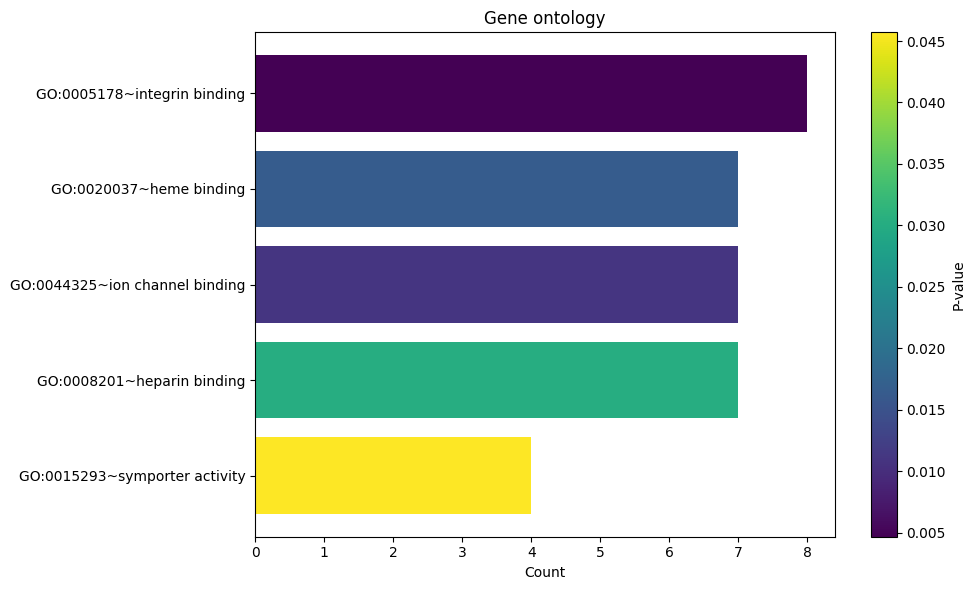

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Sort the dataframe by the 'Count' column in ascending order for visual appeal
df_sorted = df_filtered.sort_values(by='Count', ascending=True)

# Select the top 5 rows
top5 = df_sorted.tail(5)

# Normalize Fisher exact test values for color mapping
norm = mcolors.Normalize(vmin=top5['PValue'].min(), vmax=top5['PValue'].max())
cmap = plt.cm.viridis  # Using a different colormap for better visual differentiation
# plasma

# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top5['Term'], top5['Count'], color=cmap(norm(top5['PValue'])))

# Add color bar to indicate Fisher exact test values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('P-value')

# Set labels and title
ax.set_xlabel('Count')
# ax.set_ylabel('Pathways')
ax.set_title('Gene ontology')

# Adjust layout to ensure no label cutoff
plt.tight_layout()

# Save the figure with high resolution
plt.savefig('shap_one_sample/gene_ontology.png', dpi=600)

# Show plot
plt.show()


## Heatmap of shap genes

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
genes_of_interest = ['ENSG00000175287', 'ENSG00000145882', 'ENSG00000249307', 'ENSG00000285230', 'ENSG00000162631', 'ENSG00000140368', 'ENSG00000286215', 'ENSG00000234028', 'ENSG00000139410', 'ENSG00000233123', 'ENSG00000026508', 'ENSG00000157833', 'ENSG00000177575', 'ENSG00000160883', 'ENSG00000271714', 'ENSG00000205562', 'ENSG00000228058', 'ENSG00000086159', 'ENSG00000254561', 'ENSG00000056736', 'ENSG00000188783', 'ENSG00000261701', 'ENSG00000183196', 'ENSG00000251442', 'ENSG00000172935', 'ENSG00000088836', 'ENSG00000145423', 'ENSG00000233396', 'ENSG00000249577', 'ENSG00000125144', 'ENSG00000205632', 'ENSG00000138400', 'ENSG00000102317', 'ENSG00000205106', 'ENSG00000188039', 'ENSG00000142731', 'ENSG00000165092', 'ENSG00000258768', 'ENSG00000287689', 'ENSG00000135447', 'ENSG00000105227', 'ENSG00000042062', 'ENSG00000131153', 'ENSG00000125733', 'ENSG00000230537', 'ENSG00000168209', 'ENSG00000255020', 'ENSG00000281327', 'ENSG00000254746', 'ENSG00000166535', 'ENSG00000143772', 'ENSG00000108932', 'ENSG00000232520', 'ENSG00000096060', 'ENSG00000137198', 'ENSG00000233670', 'ENSG00000053702', 'ENSG00000260788', 'ENSG00000122367', 'ENSG00000203952', 'ENSG00000167178', 'ENSG00000287527', 'ENSG00000286710', 'ENSG00000198743', 'ENSG00000186439', 'ENSG00000247982', 'ENSG00000196517', 'ENSG00000205929', 'ENSG00000257135']

In [2]:
import pandas as pd
dataset_path = '/home/vmottaqi/rnaseq_synapse/ROSMAP_counts_v10_imbalance_4k.csv' # Replace with your actual dataset file path
metadata_path = '/home/vmottaqi/rnaseq_synapse/metadata_v10_imbalance.csv' # Replace with your actual metadata file path

dataset = pd.read_csv(dataset_path, index_col=0)

# Load the metadata
metadata = pd.read_csv(metadata_path, index_col=0)

In [4]:
# Group by tissue and diagnosis, then count the occurrences
tissue_diagnosis_counts = metadata.groupby('tissue')['diagnosis'].value_counts().unstack().fillna(0)

# Print the results
print(tissue_diagnosis_counts)

diagnosis    0    1
tissue             
1           94  171
3          143  293
6           99  151


In [114]:
# Check unique values in the 'tissue' column and count the number of rows for each value
tissue_counts = metadata['tissue'].value_counts()

# Print the results
print(tissue_counts)

tissue
3    436
1    265
6    250
Name: count, dtype: int64


In [87]:
dataset

ENSG00000000971  ENSG00000001617  ENSG00000001626  \
487_120515           5.089801         4.342717        -3.111810   
182_120424           3.071029         2.528274        -1.033960   
193_120424           3.485700         2.515583        -0.808607   
694_120605           4.746188         2.998472         0.956454   
366_120502           5.039985         2.967016        -0.657477   
...                       ...              ...              ...   
RISK_81              5.550509         3.659221        -1.595415   
RISK_9_rerun         3.559018         3.617887        -1.589891   
RISK_93              4.098086         2.137602        -0.871927   
RISK_94              4.041678         3.105495        -0.419694   
RISK_97              4.440045         2.956054        -0.603532   

              ENSG00000001630  ENSG00000002587  ENSG00000002745  \
487_120515           0.166975         3.086104         0.310888   
182_120424           1.181832         3.830174         1.021351   
193_120424          -0.587615         3.816948         0.945104   
694_120605           0.818442         2.616238        -2.226673   
366_120502           0.360927         2.866296        -0.892768   
...                       ...              ...              ...   
RISK_81              1.208007         3.871698         1.162374   
RISK_9_rerun         0.602893         3.556849        -1.463051   
RISK_93             -0.736334         4.126750         1.412901   
RISK_94             -0.109778         4.166972         0.992736   
RISK_97              0.838868         3.341711         0.977212   

              ENSG00000002746  ENSG00000002933  ENSG00000003096  \
487_120515           7.080505         4.229403         2.638568   
182_120424           7.951007         2.420574         3.218771   
193_120424           7.521900         3.117431         3.289947   
694_120605           6.410101         4.475845         1.919275   
366_120502           7.108505         3.365625         2.951688   
...                       ...              ...              ...   
RISK_81              7.162704         3.427154         3.714658   
RISK_9_rerun         7.374943         4.058607         2.372803   
RISK_93              6.960133         3.829547         3.791386   
RISK_94              6.995056         2.807515         3.219758   
RISK_97              7.089638         3.394773         3.128308   

              ENSG00000003137  ...  ENSG00000287815  ENSG00000287900  \
487_120515           3.534228  ...         1.210753         2.973423   
182_120424           4.973148  ...         0.778337         2.835971   
193_120424           5.129640  ...         0.287449         2.706385   
694_120605           4.004138  ...        -0.966774         1.204182   
366_120502           4.270925  ...         0.139377         0.833608   
...                       ...  ...              ...              ...   
RISK_81              4.620029  ...        -0.416202         2.694560   
RISK_9_rerun         4.910392  ...         1.141505         1.465807   
RISK_93              4.497030  ...         0.485881         2.477677   
RISK_94              3.635901  ...         0.273251         2.206163   
RISK_97              4.705456  ...         0.033261         2.251191   

              ENSG00000287925  ENSG00000287978  ENSG00000287985  \
487_120515           2.145368         1.892324         0.680168   
182_120424           2.417855         1.396146         1.114917   
193_120424           2.325123         1.281214         1.294638   
694_120605           1.351418        -2.986291        -0.357597   
366_120502           1.092943         1.707821         1.329693   
...                       ...              ...              ...   
RISK_81              1.821171         2.346634         0.917420   
RISK_9_rerun         1.618501         0.084201         0.165583   
RISK_93              1.926980         1.726131         1.341263   
RISK_94              1.937490         1.195124         0.974912 

In [88]:
metadata

individualID  diagnosis  tissue  race  spanish  apoe4_allele  \
specimenID                                                                  
487_120515       R9904978          0       3   1.0      2.0             0   
182_120424       R9818080          0       3   1.0      2.0             0   
193_120424       R9817161          1       3   1.0      2.0             0   
694_120605       R9817056          0       3   1.0      2.0             0   
366_120502       R9809661          1       3   1.0      2.0             1   
...                   ...        ...     ...   ...      ...           ...   
RISK_81          R4703595          0       3   1.0      2.0             0   
RISK_9_rerun     R6776130          0       3   1.0      2.0             0   
RISK_93          R6162454          1       3   1.0      2.0             0   
RISK_94          R6162454          1       6   1.0      2.0             0   
RISK_97          R1787342          0       3   1.0      2.0             0   

              sex  batch        pmi  RIN   RIN2  age_death  \
specimenID                                                   
487_120515      0      4  12.433333  6.9  47.61  72.720055   
182_120424      0      7  16.000000  8.4  70.56  81.111567   
193_120424      1      4   1.750000  7.1  50.41  80.906229   
694_120605      0      4   6.416667  7.1  50.41  87.753593   
366_120502      1      7  17.416667  7.4  54.76  90.000000   
...           ...    ...        ...  ...    ...        ...   
RISK_81         1     17  19.500000  7.3  53.29  88.796715   
RISK_9_rerun    1     17   6.500000  1.7   2.89  83.958932   
RISK_93         1     17   6.033333  7.2  51.84  90.000000   
RISK_94         1     17   6.033333  6.8  46.24  90.000000   
RISK_97         1     17   6.283333  6.3  39.69  90.000000   

              AlignmentSummaryMetrics_PCT_PF_READS_ALIGNED  \
specimenID                                                   
487_120515                                        0.931411   
182_120424                                        0.944450   
193_120424                                        0.958718   
694_120605                                        0.960609   
366_120502                                        0.931962   
...                                                    ...   
RISK_81                                           0.980628   
RISK_9_rerun                                      0.932115   
RISK_93                                           0.949833   
RISK_94                                           0.958425   
RISK_97                                           0.964837   

              RnaSeqMetrics_PCT_INTRONIC_BASES  \
specimenID                                       
487_120515                            0.225013   
182_120424                            0.172408   
193_120424                            0.203963   
694_120605                            0.201002   
366_120502                            0.205742   
...                                        ...   
RISK_81                               0.434482   
RISK_9_rerun                          0.460919   
RISK_93                               0.420760   
RISK_94                               0.461341   
RISK_97                               0.401705   

              RnaSeqMetrics_PCT_INTERGENIC_BASES  \
specimenID                                         
487_120515                              0.058488   
182_120424                              0.041036   
193_120424                              0.048166   
694_120605                              0.045065   
366_120502                              0.048650   
...                                          ...   
RISK_81                                 0.059079   
RISK_9_rerun                            0.119986   
RISK_93                                 0.047032   
RISK_94                                 0.055424   
RISK_97                                 0.052819   

              RnaSeqMetrics_PCT_CODING_BASES  
specimenID            

In [110]:
import numpy as np

# Filter the dataset to include only the genes of interest
filtered_data = dataset[genes_of_interest]

# Filter metadata for the three unique tissue types and diagnosis
selected_metadata = metadata[metadata['tissue'].isin([1, 3, 6])]

# Ensure the dataset includes only the samples present in the selected metadata
common_samples = selected_metadata.index.intersection(filtered_data.index)
filtered_data = filtered_data.loc[common_samples]

# Add the diagnosis and tissue information to the filtered data
selected_metadata = selected_metadata.loc[common_samples]  # Align the metadata with the filtered data
filtered_data['tissue'] = selected_metadata['tissue']
filtered_data['diagnosis'] = selected_metadata['diagnosis']

# Transform the dataset back to the regular non-log-transformed format
filtered_data[genes_of_interest] = np.exp(filtered_data[genes_of_interest])

# Group by tissue and diagnosis and calculate the mean expression levels for each gene
mean_expression = filtered_data.groupby(['tissue', 'diagnosis']).mean()

# Calculate the log ratio of AD to Control for each gene within each tissue group
log_ratio = pd.DataFrame()
for tissue in mean_expression.index.levels[0]:
    control = mean_expression.loc[(tissue, 0)]
    ad = mean_expression.loc[(tissue, 1)]
    ratio = np.log2(ad / control)
    log_ratio = pd.concat([log_ratio, ratio], axis=1)

log_ratio.columns = [f'Tissue{tissue}_Control_vs_AD' for tissue in mean_expression.index.levels[0]]

# Create a DataFrame for color annotations
col_colors = pd.DataFrame({
    'Tissue': ['lightblue', 'lightgreen', 'lightcoral'],
    'Diagnosis': ['orange', 'orange', 'orange']
}, index=log_ratio.columns)




In [106]:
mean_expression

tissue                    1                       3                       6  \
diagnosis                 0           1           0           1           0   
ENSG00000175287  117.087295  163.294589   81.497900  124.907724   64.113367   
ENSG00000145882   33.511387   25.354471   72.778554   50.955521   58.487117   
ENSG00000249307   14.908990   11.535574    4.539375    3.737651    3.338782   
ENSG00000285230    2.544199    1.865754    4.550439    3.187777    5.558116   
ENSG00000162631   25.708889   22.068716  151.349103  122.489295  158.707022   
...                     ...         ...         ...         ...         ...   
ENSG00000186439    8.576641   10.487937    1.829126    2.447363    2.085426   
ENSG00000247982    2.394246    2.965694    1.876898    2.874038    1.437774   
ENSG00000196517  110.741038  171.255815   56.391196   82.684457   56.746756   
ENSG00000205929    3.531234    5.929795    1.318082    2.389046    0.953815   
ENSG00000257135    2.832225    1.918808    4.925721    3.398516    4.870050   

tissue                       
diagnosis                 1  
ENSG00000175287  107.829981  
ENSG00000145882   41.783580  
ENSG00000249307    4.438231  
ENSG00000285230    3.101251  
ENSG00000162631  116.721104  
...                     ...  
ENSG00000186439    2.797530  
ENSG00000247982    2.526226  
ENSG00000196517   85.412923  
ENSG00000205929    2.410902  
ENSG00000257135    2.967535  

[69 rows x 6 columns]

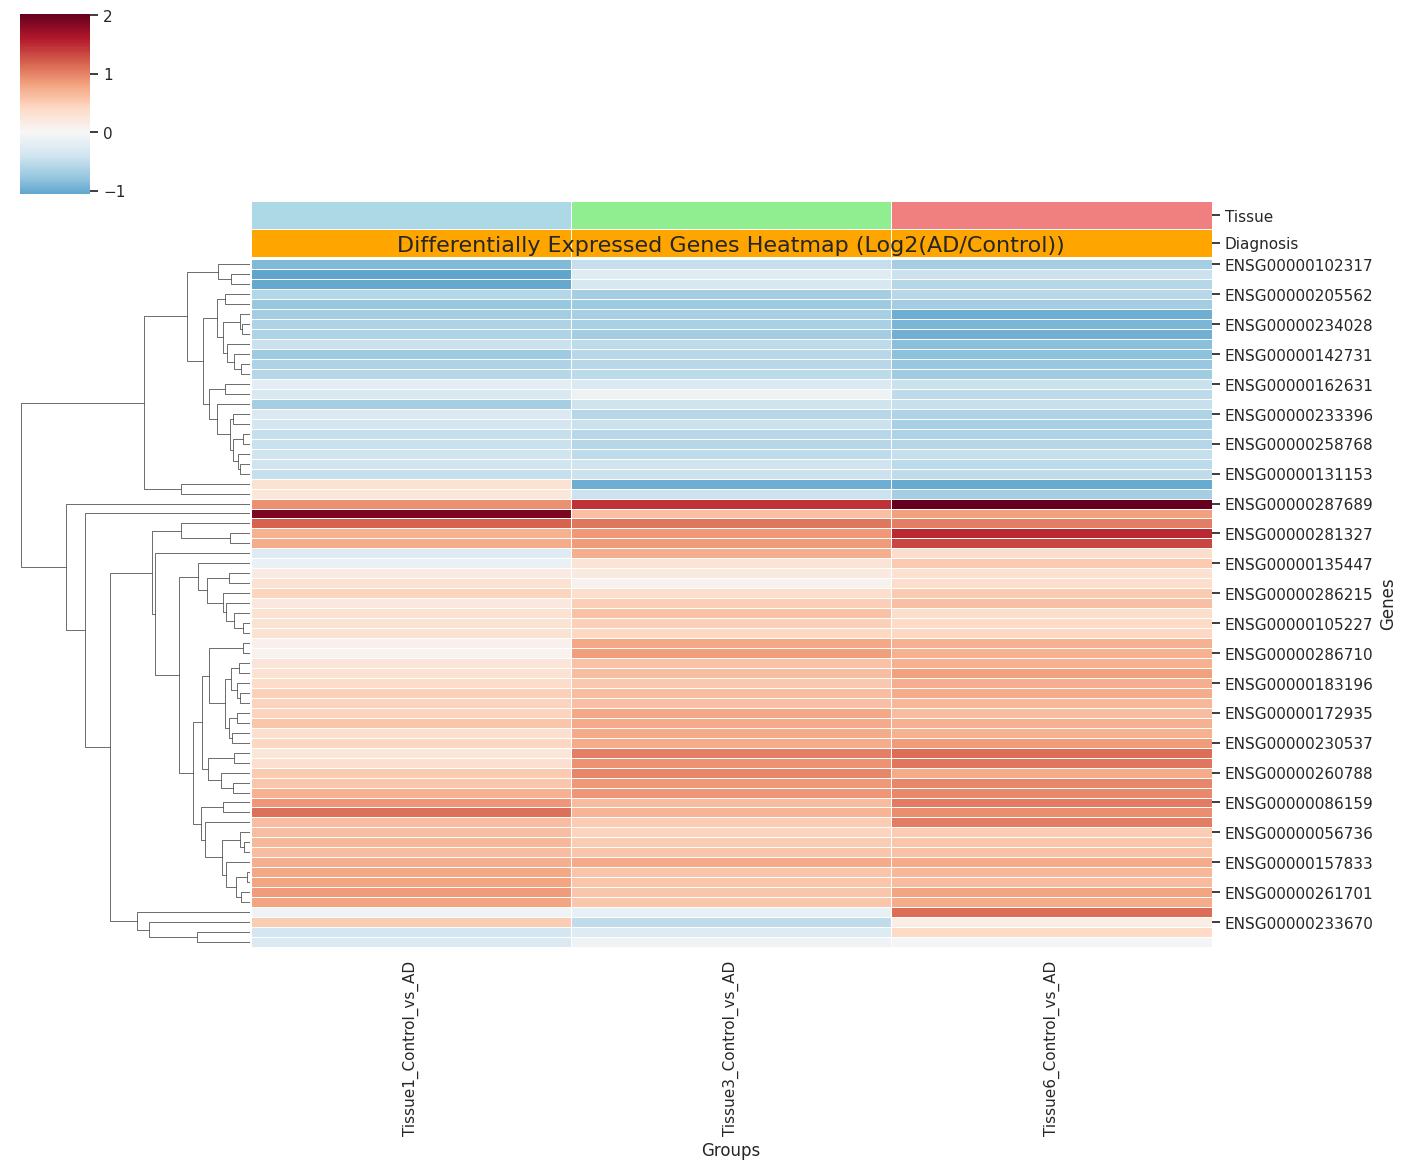

In [112]:
# Create a heatmap with hierarchical clustering
sns.set(style="whitegrid")
g = sns.clustermap(log_ratio, cmap='RdBu_r', center=0, row_cluster=True, col_cluster=False, linewidths=.5, figsize=(14, 10),
                   col_colors=col_colors)

# Customize the plot
g.ax_heatmap.set_title('Differentially Expressed Genes Heatmap (Log2(AD/Control))', fontsize=16)
g.ax_heatmap.set_xlabel('Groups', fontsize=12)
g.ax_heatmap.set_ylabel('Genes', fontsize=12)

# Rotate the x-axis labels for better readability
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)

# Save the heatmap to a file
# g.savefig('/mnt/data/differentially_expressed_genes_heatmap.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()